## Read in the appropriate packages

In [1]:
#conda install -c conda-forge frozendict
#conda install -c conda-forge yfinance

In [2]:
from pandas_datareader import data as pdr #read data from yahoo finance api
import yfinance as yf
import matplotlib.pyplot as plt #viz #GUI manager
import matplotlib.dates as mdates
import seaborn as sns #viz #plotly is another package
import datetime
import pandas as pd
import numpy as np
from pandas import Grouper #groupby
#statistical data exploration, conducting statistical tests, and estimation of different statistical models
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf #autocorrelation plot
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing
from pandas.plotting import autocorrelation_plot #autocorrelation plot
from statsmodels.graphics.gofplots import qqplot #residual diagnostics
from sklearn.metrics import mean_squared_error #accuracy metrics
from math import sqrt
from sklearn.metrics import mean_absolute_error #accuracy metrics

from random import gauss #create gaussian white noise
from random import seed
from pandas import Series


## 1. Download stock data - single and get it into the right format

A way of getting the historical stock data is to use the pandas_datareader library.
It uses Yahoo’s Finance API to load in the data.

### First, download SINGLE stock using pandas_datareader

In [3]:
# Define stock ticker and date range
stock_ticker = 'COST' #Costco stock ticker
stock_start_date = datetime.date(2013,12,29)
stock_end_date = datetime.date.today()

# Fetch the stock price from Yahoo Finance using yfinance
stock_df = yf.download(stock_ticker, start=stock_start_date, end=stock_end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
stock_df

Price,Close,High,Low,Open,Volume
Ticker,COST,COST,COST,COST,COST
Date,,,,,
2013-12-30,95.138153,95.618775,94.977950,95.282338,812800
2013-12-31,95.338402,95.891113,95.090085,95.474581,1181700
2014-01-02,94.369164,95.562700,94.313092,95.090090,1618400
2014-01-03,93.952621,94.809722,93.824454,94.689566,1293500
2014-01-06,93.239723,94.321111,92.831197,94.112841,2120200
...,...,...,...,...,...
2025-01-17,943.190002,943.799988,924.570007,930.000000,2375000
2025-01-21,947.729980,956.549988,943.500000,945.250000,2042400


In [5]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2785 entries, 2013-12-30 to 2025-01-24
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, COST)   2785 non-null   float64
 1   (High, COST)    2785 non-null   float64
 2   (Low, COST)     2785 non-null   float64
 3   (Open, COST)    2785 non-null   float64
 4   (Volume, COST)  2785 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 130.5 KB


In [6]:
stock_df.index

DatetimeIndex(['2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03',
               '2014-01-06', '2014-01-07', '2014-01-08', '2014-01-09',
               '2014-01-10', '2014-01-13',
               ...
               '2025-01-10', '2025-01-13', '2025-01-14', '2025-01-15',
               '2025-01-16', '2025-01-17', '2025-01-21', '2025-01-22',
               '2025-01-23', '2025-01-24'],
              dtype='datetime64[ns]', name='Date', length=2785, freq=None)

In [7]:
# delete 2013 values
stock_df=stock_df[(stock_df.index.year!=2013)]
stock_df

Price,Close,High,Low,Open,Volume
Ticker,COST,COST,COST,COST,COST
Date,,,,,
2014-01-02,94.369164,95.562700,94.313092,95.090090,1618400
2014-01-03,93.952621,94.809722,93.824454,94.689566,1293500
2014-01-06,93.239723,94.321111,92.831197,94.112841,2120200
2014-01-07,92.807175,93.367892,92.422678,93.231719,2292500
2014-01-08,91.357292,92.951337,91.253155,92.951337,4600000
...,...,...,...,...,...
2025-01-17,943.190002,943.799988,924.570007,930.000000,2375000
2025-01-21,947.729980,956.549988,943.500000,945.250000,2042400


## 2. Exploratory Data Analysis (EDA)


In [8]:
#delete year 2013
stock_df.index = pd.to_datetime(stock_df.index)
stock_df = stock_df[(stock_df.index.year!=2013)]
stock_df

Price,Close,High,Low,Open,Volume
Ticker,COST,COST,COST,COST,COST
Date,,,,,
2014-01-02,94.369164,95.562700,94.313092,95.090090,1618400
2014-01-03,93.952621,94.809722,93.824454,94.689566,1293500
2014-01-06,93.239723,94.321111,92.831197,94.112841,2120200
2014-01-07,92.807175,93.367892,92.422678,93.231719,2292500
2014-01-08,91.357292,92.951337,91.253155,92.951337,4600000
...,...,...,...,...,...
2025-01-17,943.190002,943.799988,924.570007,930.000000,2375000
2025-01-21,947.729980,956.549988,943.500000,945.250000,2042400


In [9]:
stock_df.columns #check column names

MultiIndex([( 'Close', 'COST'),
            (  'High', 'COST'),
            (   'Low', 'COST'),
            (  'Open', 'COST'),
            ('Volume', 'COST')],
           names=['Price', 'Ticker'])

In [10]:
# 1. Descriptive Statistics
stock_df.describe()

Price,Close,High,Low,Open,Volume
Ticker,COST,COST,COST,COST,COST
count,2783.000000,2783.000000,2783.000000,2783.000000,2.783000e+03
mean,318.586837,321.135665,315.710951,318.442833,2.300108e+06
std,221.975305,223.829765,219.871280,221.925721,1.259432e+06
min,88.257332,88.753944,87.712613,88.289346,4.910000e+05
25%,136.616684,137.534410,135.663750,136.771474,1.598750e+06
50%,248.252457,249.771346,245.672076,247.136116,1.984200e+06
75%,470.962372,475.314404,466.454182,470.869775,2.566250e+06
max,994.690002,1008.250000,993.590027,1001.679993,2.423300e+07


<Axes: >

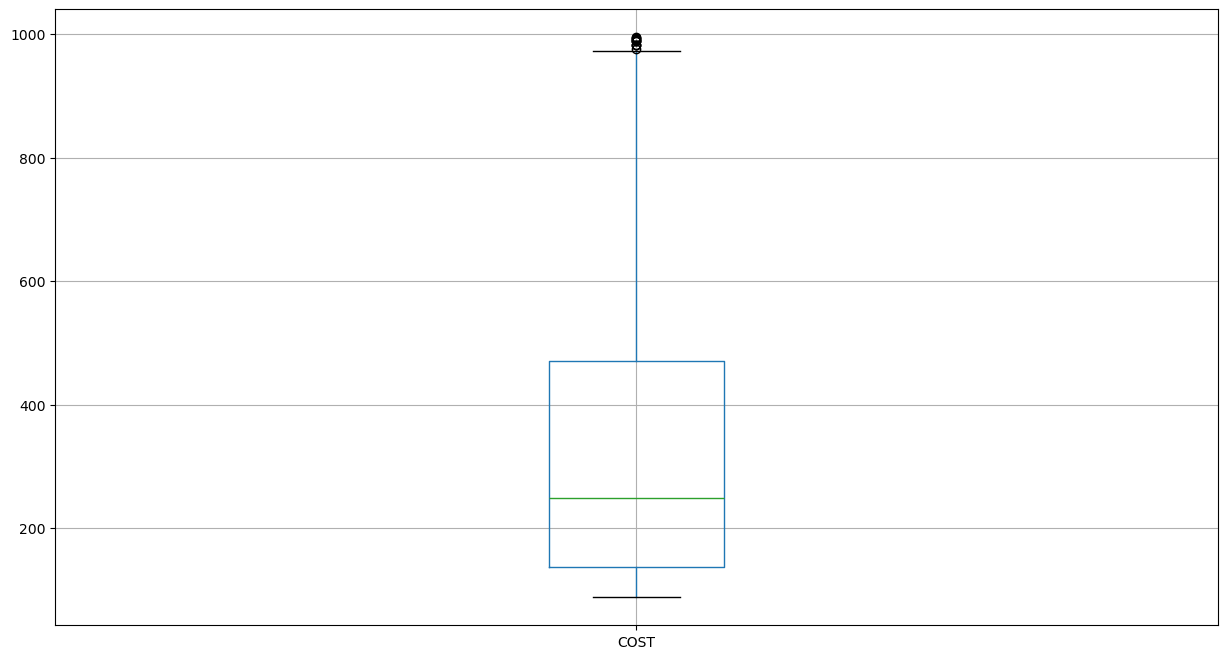

In [11]:
plt.figure(figsize=(15,8))
stock_df['Close'].boxplot() #we only want to plot closing prices

In [12]:
# 2. Check for missing values
stock_df.isnull().sum()

Price   Ticker
Close   COST      0
High    COST      0
Low     COST      0
Open    COST      0
Volume  COST      0
dtype: int64

In [13]:
# 3. Find the indexes that are missing
pd.date_range(start = '2014-01-01', end = stock_end_date).difference(stock_df.index)

DatetimeIndex(['2014-01-01', '2014-01-04', '2014-01-05', '2014-01-11',
               '2014-01-12', '2014-01-18', '2014-01-19', '2014-01-20',
               '2014-01-25', '2014-01-26',
               ...
               '2025-01-05', '2025-01-09', '2025-01-11', '2025-01-12',
               '2025-01-18', '2025-01-19', '2025-01-20', '2025-01-25',
               '2025-01-26', '2025-01-27'],
              dtype='datetime64[ns]', length=1262, freq=None)

<Figure size 2400x1200 with 0 Axes>

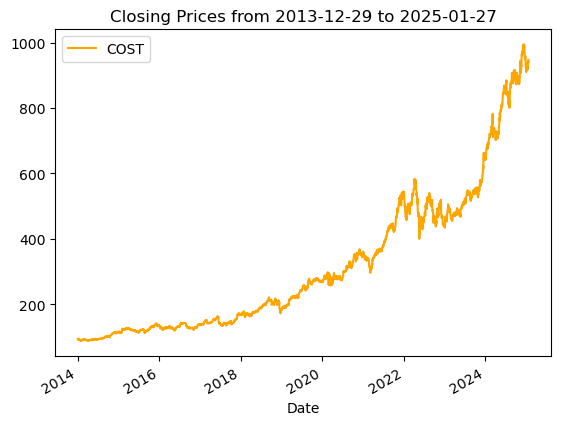

In [14]:
# Visualizing The Close Price of the stocks

# to set the plot size
plt.figure(figsize=(16, 8), dpi=150) #dpi = resolution. default 100.

# using plot method to plot close prices.
# in plot method we set the label and color of the curve.
stock_df['Close'].plot(label='COST Closing Price', color='orange')

# adding title to the plot
plt.title('Closing Prices from {} to {}'.format(stock_start_date, stock_end_date))

# adding Label to the x-axis
plt.xlabel('Date')

# adding legend to the curve
plt.legend()


In [15]:
# first, fill the misssing values with 'NaN'. Reindexing.
stock_df_NaN = stock_df['Close'].reindex(pd.date_range('2014-01-01', stock_end_date), fill_value= np.NaN)
stock_df_NaN

Ticker,COST
2014-01-01,NaN
2014-01-02,94.369164
2014-01-03,93.952621
2014-01-04,NaN
2014-01-05,NaN
...,...
2025-01-23,942.159973
2025-01-24,939.679993
2025-01-25,NaN
2025-01-26,NaN


In [16]:
#impute Costco closing prices with spline
stock_df_imputed = stock_df_NaN.copy()
stock_df_imputed['COST_Spline'] = stock_df_imputed['COST'].interpolate(method='spline', order=1, limit=10, limit_direction='both')
stock_df_imputed

Ticker,COST,COST_Spline
2014-01-01,NaN,94.033332
2014-01-02,94.369164,94.369164
2014-01-03,93.952621,93.952621
2014-01-04,NaN,93.745158
2014-01-05,NaN,93.649100
...,...,...
2025-01-23,942.159973,942.159973
2025-01-24,939.679993,939.679993
2025-01-25,NaN,937.117023
2025-01-26,NaN,934.576128


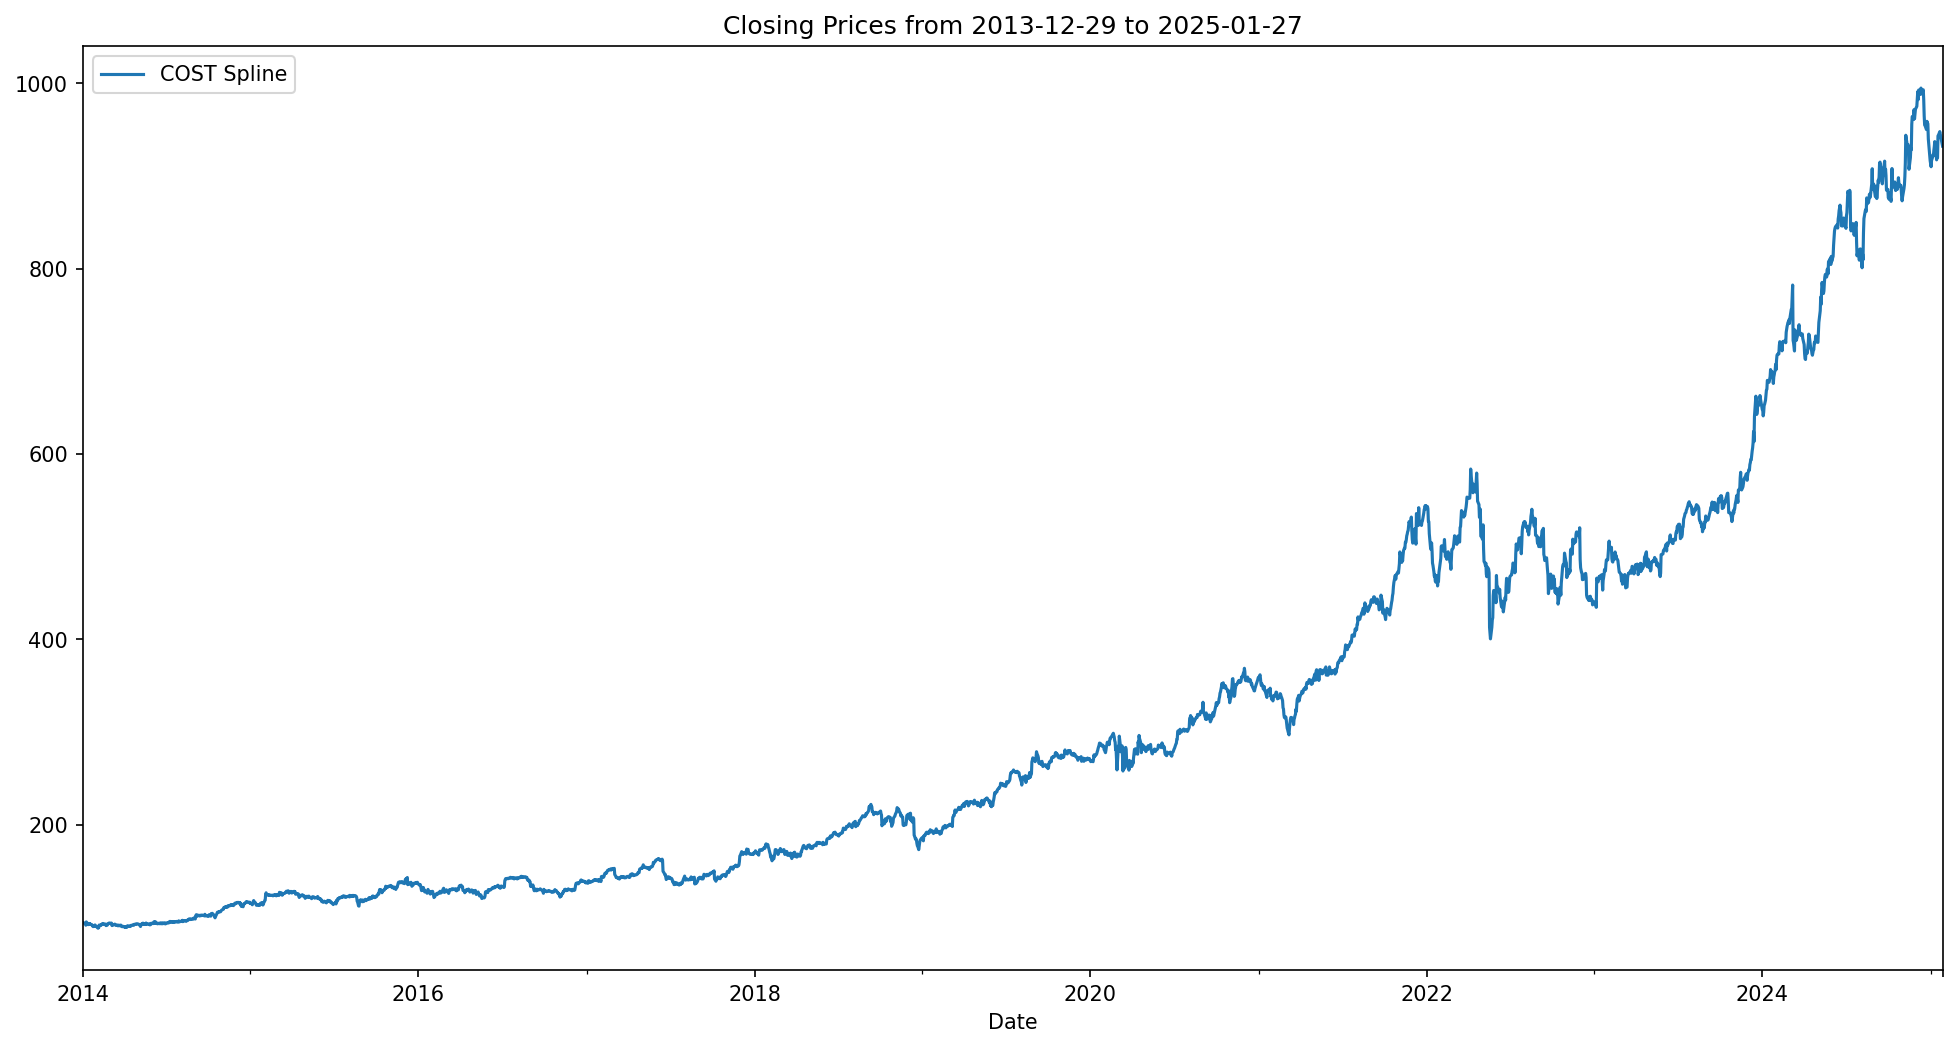

In [17]:
#Plot

# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)

# using plot method to plot close prices.
# in plot method we set the label and color of the curve.
stock_df_imputed['COST_Spline'].plot(label='COST Spline')


# adding title to the plot
plt.title('Closing Prices from {} to {}'.format(stock_start_date, stock_end_date))

# adding Label to the x-axis
plt.xlabel('Date')

# adding legend to the curve
plt.legend()


<Axes: xlabel='None', ylabel='COST_Spline'>

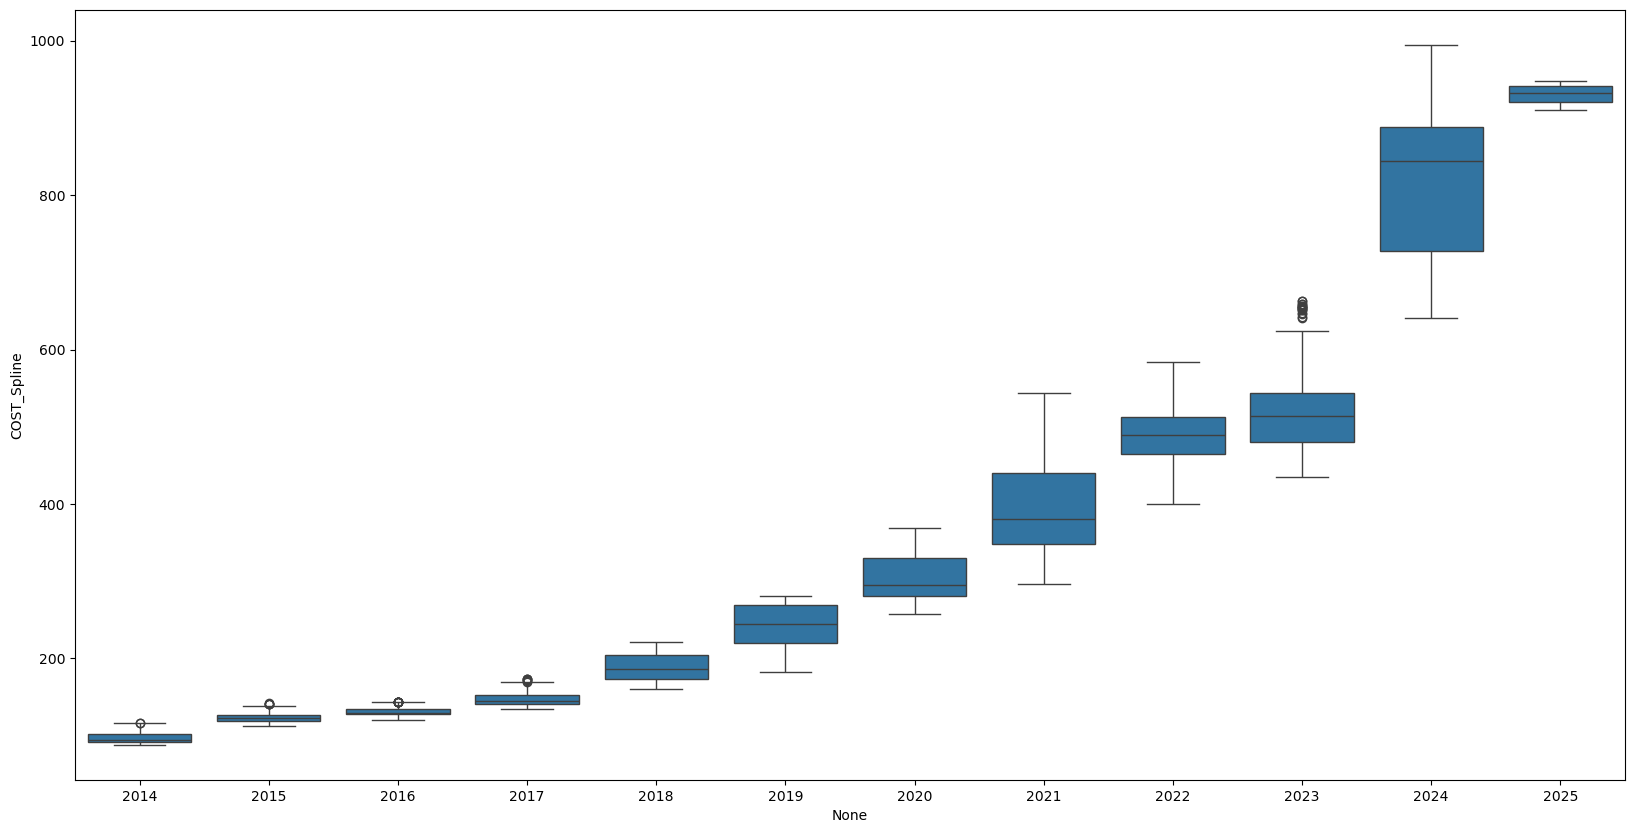

In [18]:
# price variation for each year

fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = stock_df_imputed.index.year,
                y = stock_df_imputed['COST_Spline'],
                ax = ax)

<Axes: xlabel='None', ylabel='COST_Spline'>

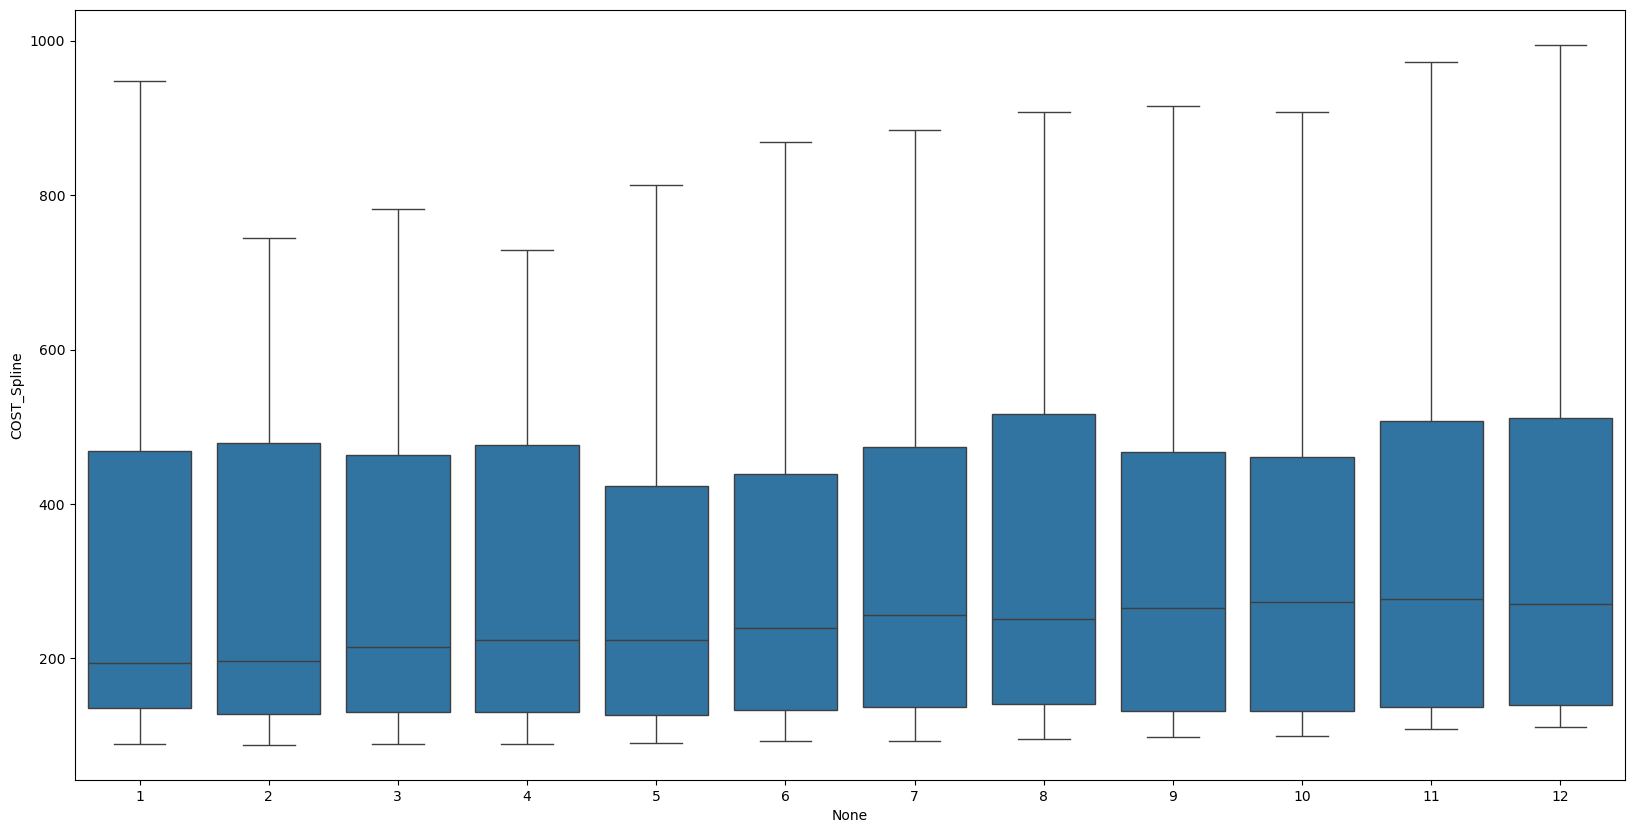

In [19]:
# price variation for each month

fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = stock_df_imputed.index.month,
                y = stock_df_imputed['COST_Spline'],
                ax = ax)

In [20]:
# 6. Resampling

In [21]:
df_resample = stock_df_imputed.copy()

# extract only the spline variables
df_resample = df_resample[['COST_Spline']].round(2)
df_resample

Ticker,COST_Spline
2014-01-01,94.03
2014-01-02,94.37
2014-01-03,93.95
2014-01-04,93.75
2014-01-05,93.65
...,...
2025-01-23,942.16
2025-01-24,939.68
2025-01-25,937.12
2025-01-26,934.58


In [22]:
# downsample the data from days to months to reduce variability in the data
# observe the stock prices on a monthly basis

df_resample_months = df_resample.groupby(pd.Grouper(freq='MS')).median()
#df_resample_months = df_resample.resample('M').median() #another way of resampling
df_resample_months

Ticker,COST_Spline
2014-01-01,92.300
2014-02-01,92.210
2014-03-01,91.360
2014-04-01,90.975
2014-05-01,92.470
...,...
2024-09-01,895.690
2024-10-01,887.850
2024-11-01,932.630
2024-12-01,975.000


<Figure size 2400x1200 with 0 Axes>

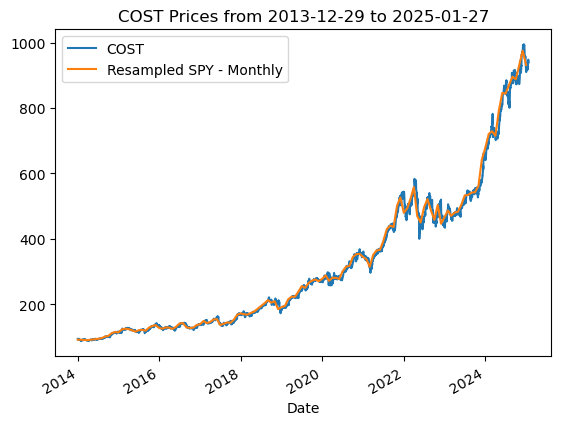

In [23]:
#Plot monthly data

# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)

# using plot method to plot close prices.
# in plot method we set the label and color of the curve.
#df_resample_months['MSFT_Spline'].plot(label='MSFT')
stock_df['Close'].plot(label='COST Closing Price - Daily')
df_resample_months['COST_Spline'].plot(label='Resampled SPY - Monthly')


# adding title to the plot
plt.title('COST Prices from {} to {}'.format(stock_start_date, stock_end_date))

# adding Label to the x-axis
plt.xlabel('Date')

# adding legend to the curve
plt.legend()

In [24]:
# 6. Autocorrelation or ACF plot


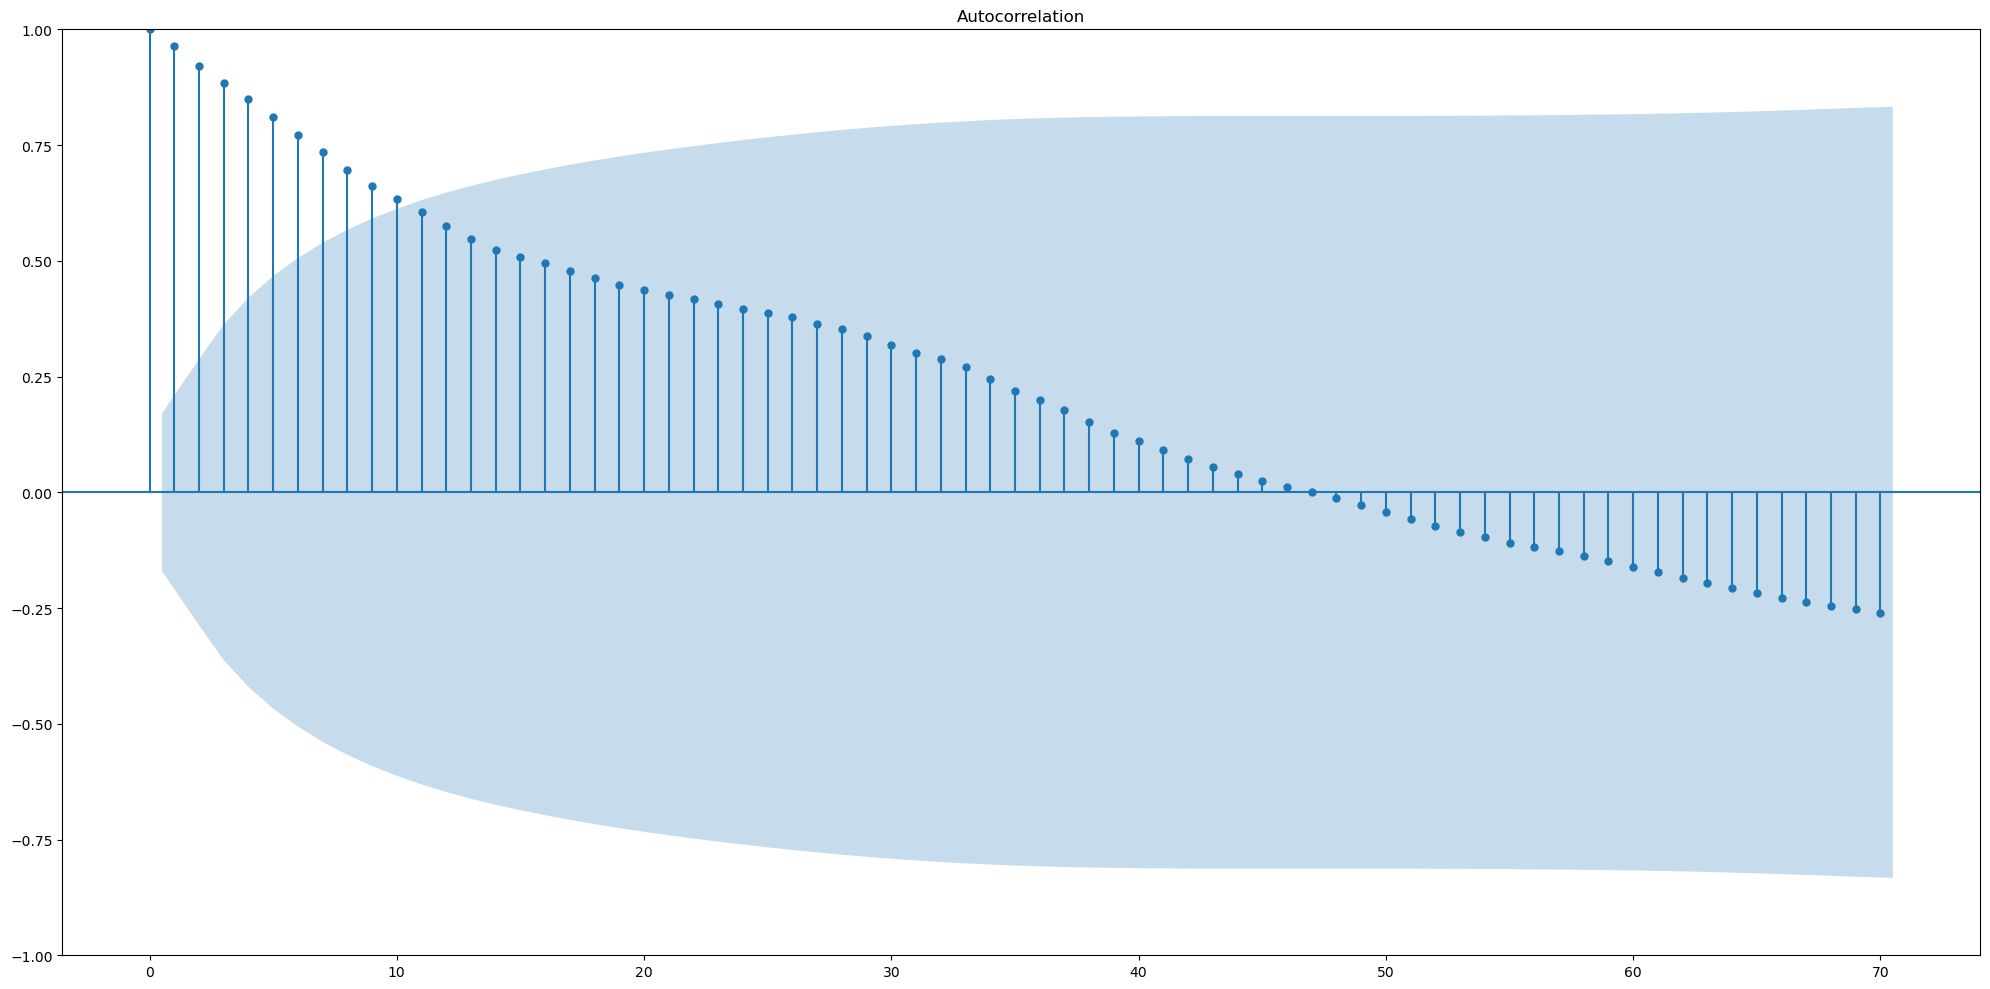

In [25]:
# Calculate the ACF (via statsmodel)
# Source: https://www.alpharithms.com/autocorrelation-time-series-python-432909/

fig = plot_acf(df_resample_months['COST_Spline'], lags=70)
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [26]:
# 7. Time Series Decomposition
# Source: https://stackoverflow.com/questions/20672236/time-series-decomposition-function-in-python

Time series decomposition is a process of deconstructing a time series into the following components:

1. Trend — general movement over time
2. Seasonal — behaviors captured in individual seasonal periods
3. Residual — everything not captured by trend and seasonal components


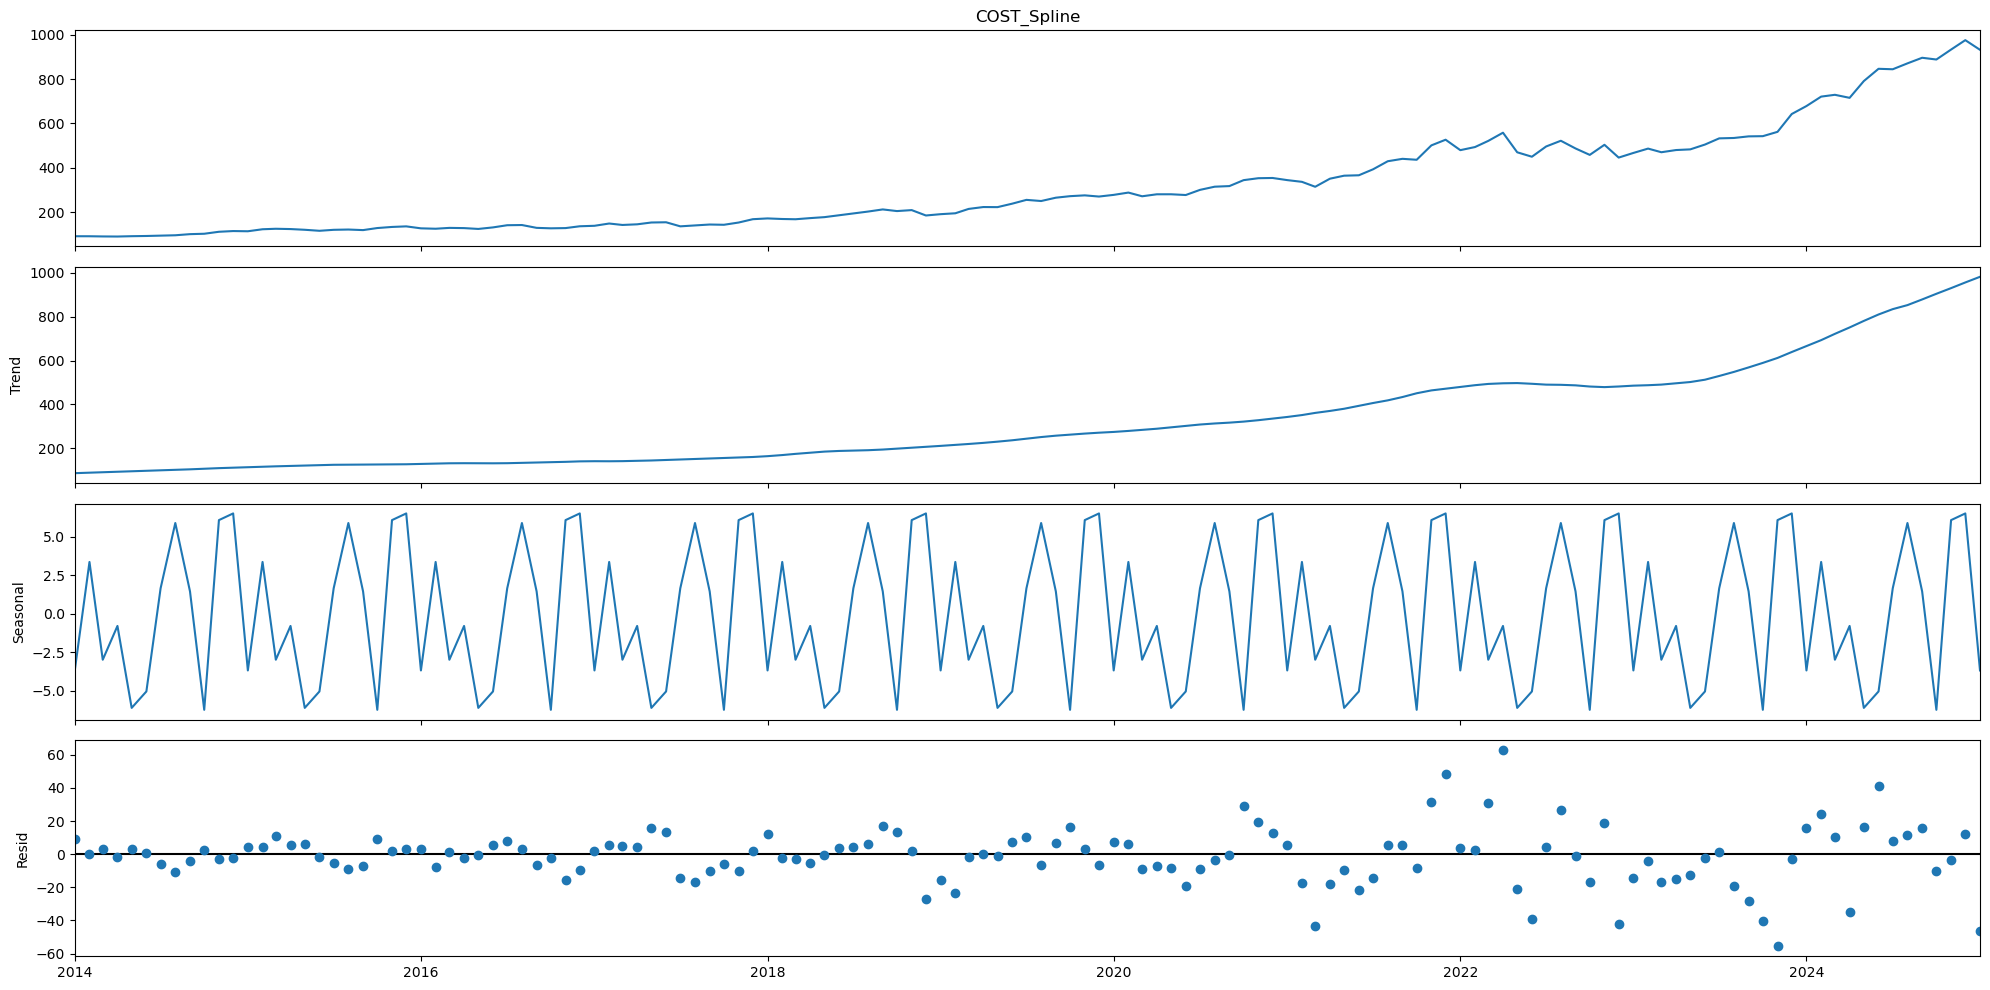

In [27]:
res = sm.tsa.seasonal_decompose(df_resample_months['COST_Spline'], period=12, extrapolate_trend='freq')
fig = res.plot()
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [28]:
# We can extract the trend, seasonality, and error terms
# going forward let us only concentrate on one time series - COST

In [29]:
cost_df = df_resample_months[['COST_Spline']]

# extract the decomposed terms
cost_df['trend'] = res.trend
cost_df['seasonal'] = res.seasonal
cost_df['error'] = res.resid
cost_df

Ticker,COST_Spline,trend,seasonal,error
2014-01-01,92.300,86.538011,-3.684653,9.446643
2014-02-01,92.210,88.754465,3.350376,0.105159
2014-03-01,91.360,90.970920,-2.990079,3.379159
2014-04-01,90.975,93.187375,-0.799397,-1.412978
2014-05-01,92.470,95.403829,-6.113544,3.179715
...,...,...,...,...
2024-09-01,895.690,878.558708,1.439460,15.691832
2024-10-01,887.850,904.378759,-6.238462,-10.290297
2024-11-01,932.630,930.198809,6.064981,-3.633790
2024-12-01,975.000,956.018859,6.497969,12.483172


In [30]:
86.538523 - 4.088041 + 9.789518

92.24

<Axes: >

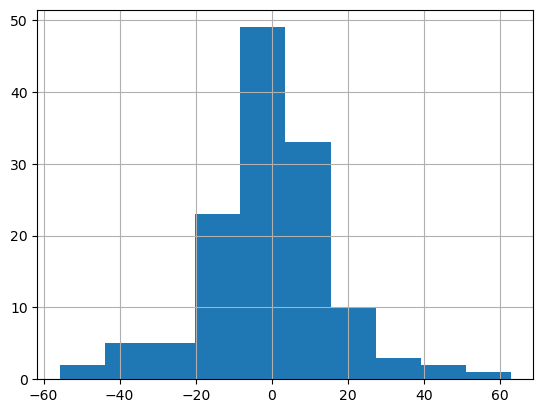

In [31]:
cost_df['error'].hist()

In [32]:
# 8 . Time Series Viz - pairplot
# Source: https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [33]:
df_resample_months

Ticker,COST_Spline
2014-01-01,92.300
2014-02-01,92.210
2014-03-01,91.360
2014-04-01,90.975
2014-05-01,92.470
...,...
2024-09-01,895.690
2024-10-01,887.850
2024-11-01,932.630
2024-12-01,975.000


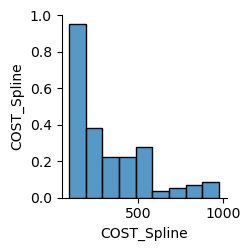

In [34]:
sns.pairplot(df_resample_months)


In [35]:
np.corrcoef(df_resample_months['COST_Spline'],df_resample_months['COST_Spline'])

array([[1., 1.],
       [1., 1.]])

<Figure size 3000x1200 with 0 Axes>

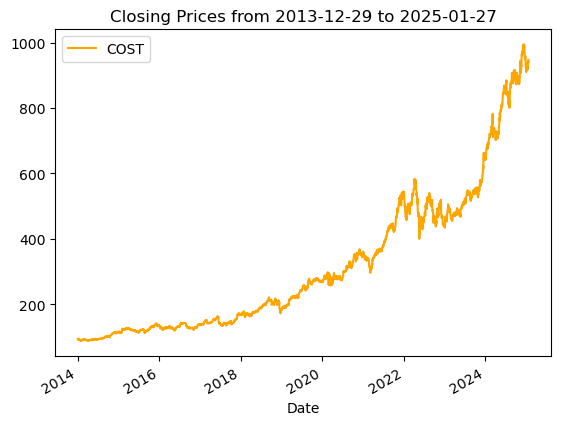

In [36]:
# Visualizing The Close Price of the stocks

# to set the plot size
plt.figure(figsize=(20, 8), dpi=150) #dpi = resolution. default 100.

# using plot method to plot close prices.
# in plot method we set the label and color of the curve.
stock_df['Close'].plot(label='COST Closing Price', color='orange')

# adding title to the plot
plt.title('Closing Prices from {} to {}'.format(stock_start_date, stock_end_date))

# adding Label to the x-axis
plt.xlabel('Date')

# adding legend to the curve
plt.legend()


In [37]:
# to escape the spurious correlation trap
# we should difference the time series to detrend it or make it stationary before we check for correlation.

In [38]:
differenced = df_resample_months.diff()

In [39]:
differenced

Ticker,COST_Spline
2014-01-01,NaN
2014-02-01,-0.090
2014-03-01,-0.850
2014-04-01,-0.385
2014-05-01,1.495
...,...
2024-09-01,25.180
2024-10-01,-7.840
2024-11-01,44.780
2024-12-01,42.370


<Axes: >

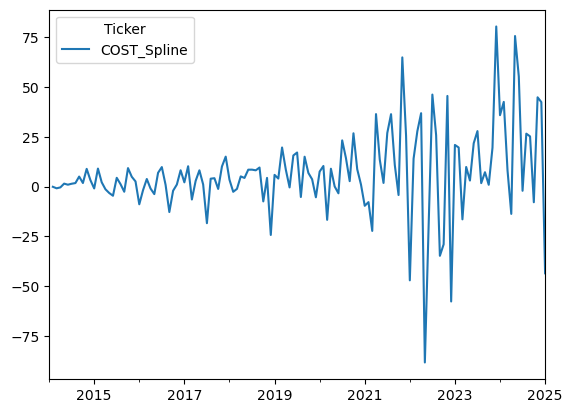

In [40]:
differenced.plot()

In [41]:
np.corrcoef(differenced['COST_Spline'].dropna(),differenced['COST_Spline'].dropna())

array([[1., 1.],
       [1., 1.]])

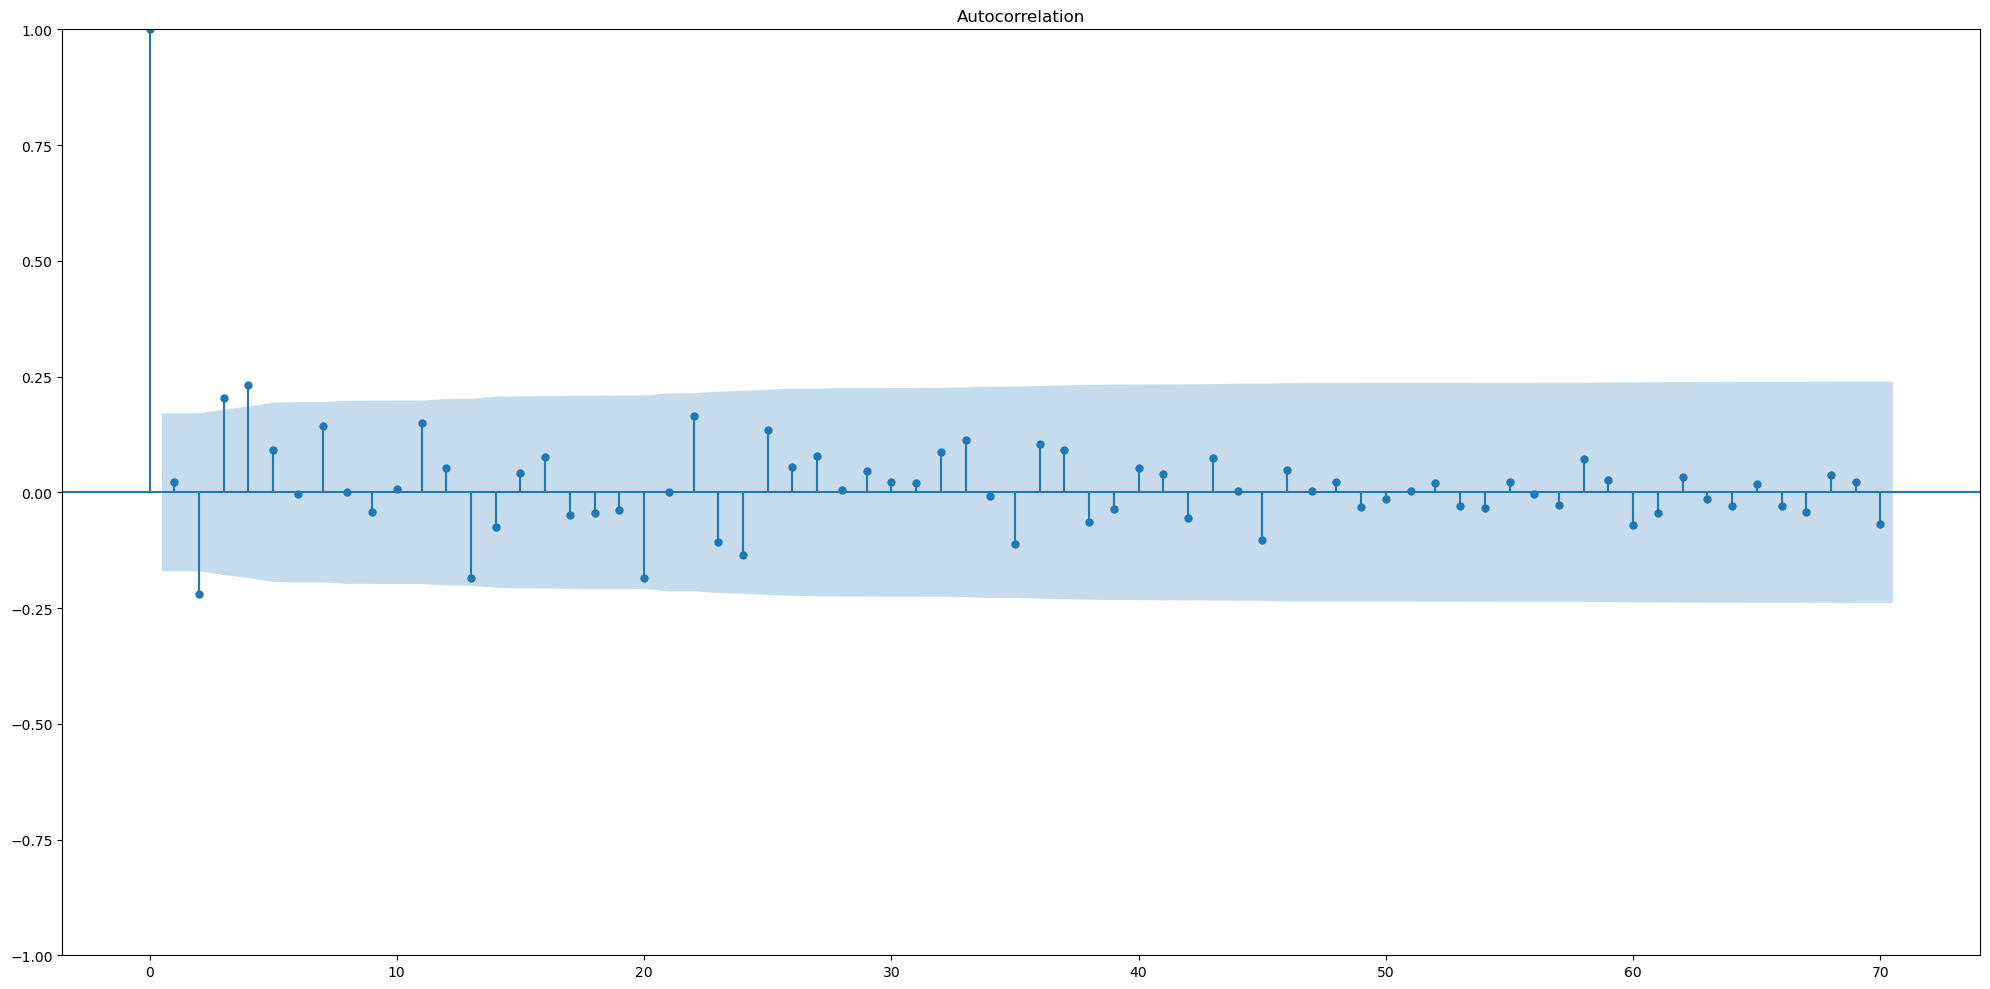

In [42]:
# Calculate the ACF (via statsmodel)
# Source: https://www.alpharithms.com/autocorrelation-time-series-python-432909/

fig = plot_acf(differenced['COST_Spline'].dropna(), lags=70)
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

# 3. Collect data around 3 US Economic Factors

1. Inflation Rate: overall increase in prices for goods and services in the economy; proxied by consumer price index (CPI) for urban consumers
- Hypothesis: I believe the inflation rate will have a moderately positive association with Costco’s closing prices. While inflation could increase costs, Costco’s value-driven model and reliance on membership fees—rather than product margins—may allow it to benefit from increased customer retention and revenue.
- Rising inflation can increase operating costs, such as transportation and labor, which may squeeze profit margins, particularly as Costco takes losses on essential low-priced goods to maintain customer loyalty.
- However, during periods of high inflation, consumers often prioritize value, and Costco’s bulk pricing and competitive deals make it an attractive option for budget-conscious shoppers.
- Data Source: U.S. Bureau of Labor Statistics (https://data.bls.gov/pdq/SurveyOutputServlet)

2. Unemployment Rate: percentage of the workforce that is unemployed but actively seeking work; a strong indicator of economic health and consumer spending capacity
- Hypothesis: I believe the unemployment rate will be weakly negatively associated with Costco’s closing prices. Periods of low unemployment signal stronger consumer spending and a potential increase in memberships, which are the primary driver of Costco’s profits. Conversely, while high unemployment may reduce overall spending, Costco’s focus on value can mitigate losses, resulting in a weaker negative impact compared to competitors.
- High unemployment can reduce overall consumer spending, but Costco’s low-priced essentials and bulk purchasing options may attract cost-sensitive customers during economic downturns.
- Conversely, low unemployment tends to boost disposable income, which may encourage more spending at Costco and result in higher membership renewals or upgrades to executive memberships.
- Data Source: U.S. Bureau of Labor Statistics (https://data.bls.gov/timeseries/LNS14000000)

3. Retail Sales Inde (RSI): changes in consumer spending on retail goods, offering a direct measure of demand within the retail sector; proxied by retail trade (RSXFS)
- Hypothesis: I believe the Retail Sales Index will be strongly positively associated with Costco’s closing prices. When retail sales rise, Costco benefits from increased traffic and higher sales volume. As a direct proxy for consumer spending trends, this index closely reflects Costco’s revenue potential.
- A rising Retail Sales Index suggests strong consumer spending, which can lead to higher sales for Costco, particularly on both essential and discretionary items.
- Conversely, a declining index may reflect weaker demand, potentially impacting Costco’s revenue. However, the company’s emphasis on essentials and bulk goods often makes it more resilient than competitors during economic slowdowns.
- Data Source: Federal Reserve Bank of St. Louis (https://fred.stlouisfed.org/series/RSXFS)

## Inflation

In [43]:
#read in CSV
inflation_df = pd.read_csv('Inflation.csv')
unemployment_df = pd.read_csv('Unemployment.csv')
rsi_df = pd.read_csv('Retail_Trade.csv')

In [44]:
inflation_df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2
0,2014,1.6,1.6,1.7,1.8,2.0,1.9,1.9,1.7,1.7,1.8,1.7,1.6,1.7,1.8,1.7
1,2015,1.6,1.7,1.8,1.8,1.7,1.8,1.8,1.8,1.9,1.9,2.0,2.1,1.8,1.7,1.9
2,2016,2.2,2.3,2.2,2.1,2.2,2.2,2.2,2.3,2.2,2.1,2.1,2.2,2.2,2.2,2.2
3,2017,2.3,2.2,2.0,1.9,1.7,1.7,1.7,1.7,1.7,1.8,1.7,1.8,1.8,2.0,1.7
4,2018,1.8,1.8,2.1,2.1,2.2,2.3,2.4,2.2,2.2,2.1,2.2,2.2,2.1,2.1,2.2
5,2019,2.2,2.1,2.0,2.1,2.0,2.1,2.2,2.4,2.4,2.3,2.3,2.3,2.2,2.1,2.3
6,2020,2.3,2.4,2.1,1.4,1.2,1.2,1.6,1.7,1.7,1.6,1.6,1.6,1.7,1.8,1.6
7,2021,1.4,1.3,1.6,3.0,3.8,4.5,4.3,4.0,4.0,4.6,4.9,5.5,3.6,2.6,4.5
8,2022,6.0,6.4,6.5,6.2,6.0,5.9,5.9,6.3,6.6,6.3,6.0,5.7,6.2,6.2,6.1
9,2023,5.6,5.5,5.6,5.5,5.3,4.8,4.7,4.3,4.1,4.0,4.0,3.9,4.8,5.4,4.2


In [45]:
unemployment_df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
1,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
2,2016,4.8,4.9,5.0,5.1,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
3,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.3,4.2,4.2,4.1
4,2018,4.0,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.8,3.9
5,2019,4.0,3.8,3.8,3.7,3.6,3.6,3.7,3.6,3.5,3.6,3.6,3.6
6,2020,3.6,3.5,4.4,14.8,13.2,11.0,10.2,8.4,7.8,6.9,6.7,6.7
7,2021,6.4,6.2,6.1,6.1,5.8,5.9,5.4,5.1,4.7,4.5,4.2,3.9
8,2022,4.0,3.8,3.7,3.7,3.6,3.6,3.5,3.6,3.5,3.6,3.6,3.5
9,2023,3.5,3.6,3.5,3.4,3.6,3.6,3.5,3.7,3.8,3.9,3.7,3.8


In [46]:
rsi_df

,observation_date,RSXFS
0,1992-01-01,146925
1,1992-02-01,147223
2,1992-03-01,146805
3,1992-04-01,148032
4,1992-05-01,149010
...,...,...
391,2024-08-01,614535
392,2024-09-01,620104
393,2024-10-01,623269
394,2024-11-01,628727


In [47]:
inflation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    11 non-null     int64  
 1   Jan     11 non-null     float64
 2   Feb     11 non-null     float64
 3   Mar     11 non-null     float64
 4   Apr     11 non-null     float64
 5   May     11 non-null     float64
 6   Jun     11 non-null     float64
 7   Jul     11 non-null     float64
 8   Aug     11 non-null     float64
 9   Sep     11 non-null     float64
 10  Oct     11 non-null     float64
 11  Nov     11 non-null     float64
 12  Dec     11 non-null     float64
 13  Annual  11 non-null     float64
 14  HALF1   11 non-null     float64
 15  HALF2   11 non-null     float64
dtypes: float64(15), int64(1)
memory usage: 1.5 KB


In [48]:
inflation_df.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'Annual', 'HALF1', 'HALF2'],
      dtype='object')

In [49]:
inflation_df.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,2019.000000,2.809091,2.827273,2.854545,2.863636,2.863636,2.881818,2.900000,2.872727,2.890909,2.890909,2.890909,2.918182,2.863636,2.863636,2.881818
std,3.316625,1.623240,1.685284,1.696092,1.603916,1.574340,1.528279,1.444299,1.464303,1.518193,1.502301,1.478144,1.491857,1.488135,1.553881,1.468209
min,2014.000000,1.400000,1.300000,1.600000,1.400000,1.200000,1.200000,1.600000,1.700000,1.700000,1.600000,1.600000,1.600000,1.700000,1.700000,1.600000
25%,2016.500000,1.700000,1.750000,1.900000,1.850000,1.850000,1.850000,1.850000,1.750000,1.800000,1.850000,1.850000,1.950000,1.800000,1.900000,1.800000
50%,2019.000000,2.200000,2.200000,2.100000,2.100000,2.200000,2.200000,2.200000,2.300000,2.200000,2.100000,2.200000,2.200000,2.200000,2.100000,2.200000
75%,2021.500000,3.100000,3.100000,3.000000,3.300000,3.600000,3.900000,3.750000,3.600000,3.650000,3.650000,3.650000,3.550000,3.500000,3.100000,3.750000
max,2024.000000,6.000000,6.400000,6.500000,6.200000,6.000000,5.900000,5.900000,6.300000,6.600000,6.300000,6.000000,5.700000,6.200000,6.200000,6.100000


In [50]:
inflation_df.isnull().sum()

Year      0
Jan       0
Feb       0
Mar       0
Apr       0
May       0
Jun       0
Jul       0
Aug       0
Sep       0
Oct       0
Nov       0
Dec       0
Annual    0
HALF1     0
HALF2     0
dtype: int64

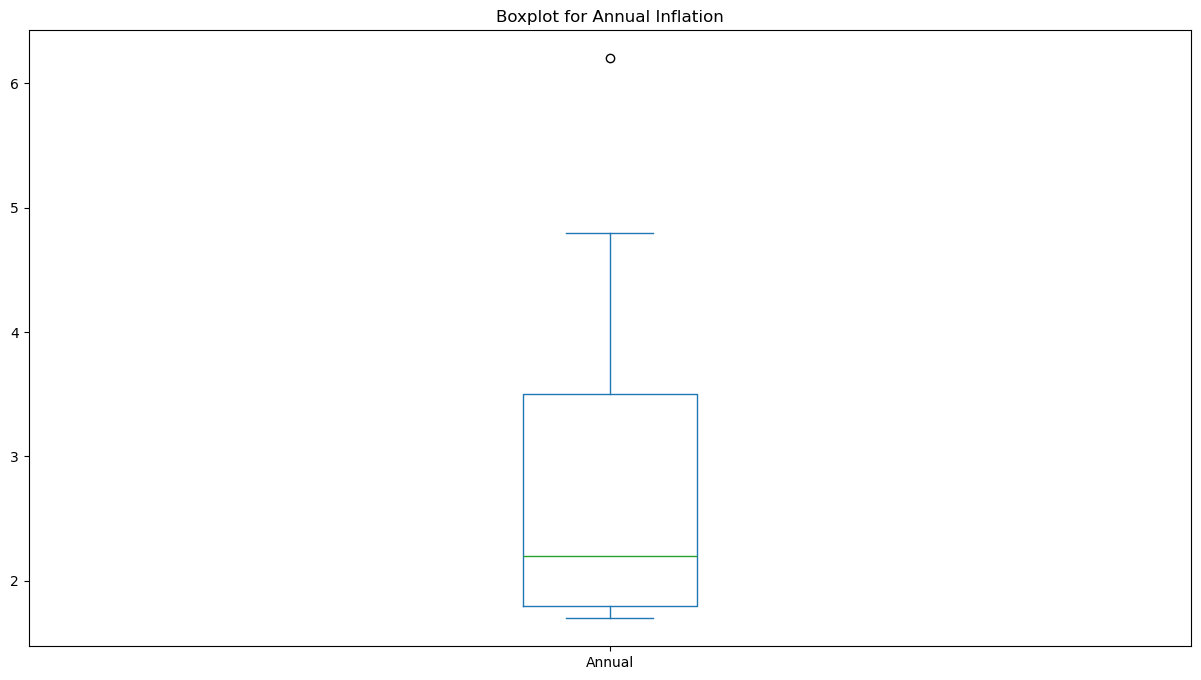

In [51]:
#Look for outliers for annual inflation
plt.figure(figsize=(15,8))
inflation_df['Annual'].plot(kind='box')
plt.title('Boxplot for Annual Inflation')
plt.show()

In [52]:
# Reshape the data to a long format (time series)
inflation_month_df = inflation_df.drop(columns=['Annual', 'HALF1', 'HALF2'])
inflation_melted = inflation_month_df.melt(id_vars=['Year'], var_name='Month', value_name='Inflation Rate')

# Create a 'Date' column by combining Year and Month
inflation_melted['Date'] = pd.to_datetime(inflation_melted['Year'].astype(str) + '-' + inflation_melted['Month'], format='%Y-%b')

# Sort the data by Date to ensure the timeline is continuous
inflation_melted = inflation_melted.sort_values(by='Date')
inflation_melted.drop(columns=['Year','Month'], inplace=True)

inflation_melted

,Inflation Rate,Date
0,1.6,2014-01-01
11,1.6,2014-02-01
22,1.7,2014-03-01
33,1.8,2014-04-01
44,2.0,2014-05-01
...,...,...
87,3.2,2024-08-01
98,3.3,2024-09-01
109,3.3,2024-10-01
120,3.3,2024-11-01


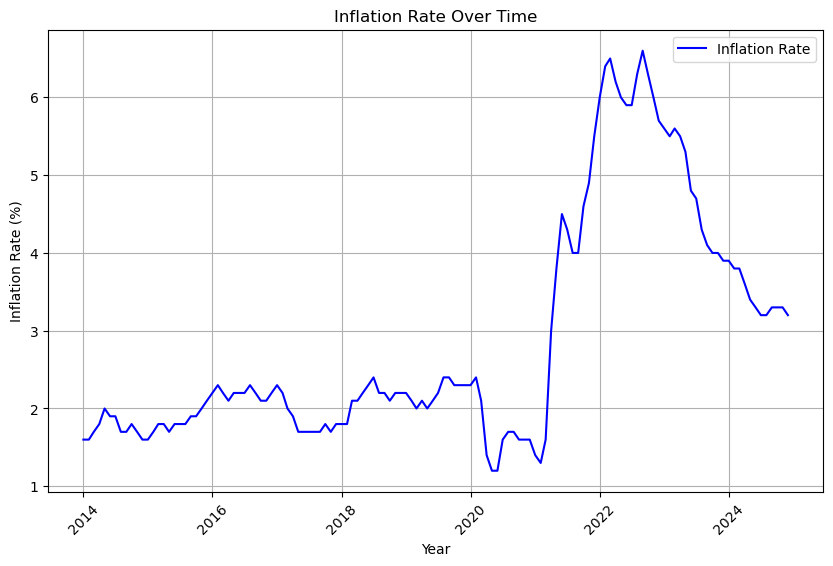

In [53]:
# Plot the Inflation Rate
plt.figure(figsize=(10, 6))
plt.plot(inflation_melted['Date'], inflation_melted['Inflation Rate'], label='Inflation Rate', color='b')

plt.title('Inflation Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()



<Axes: xlabel='Date', ylabel='Inflation Rate'>

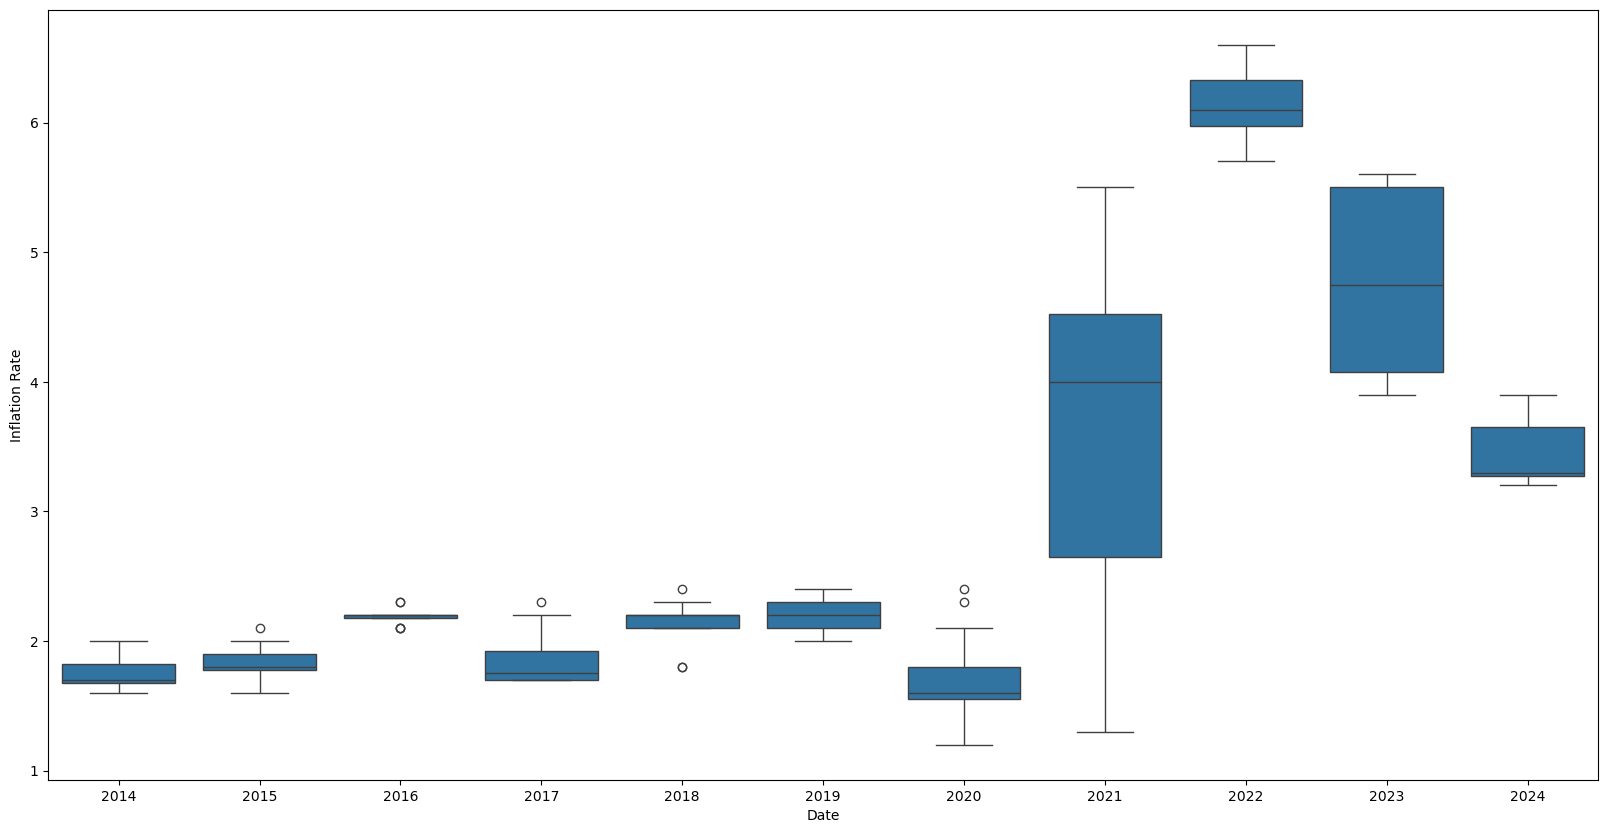

In [54]:
#Inflation Rate by Year
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = inflation_melted['Date'].dt.year,
                y = inflation_melted['Inflation Rate'],
                ax = ax)

<Axes: xlabel='Date', ylabel='Inflation Rate'>

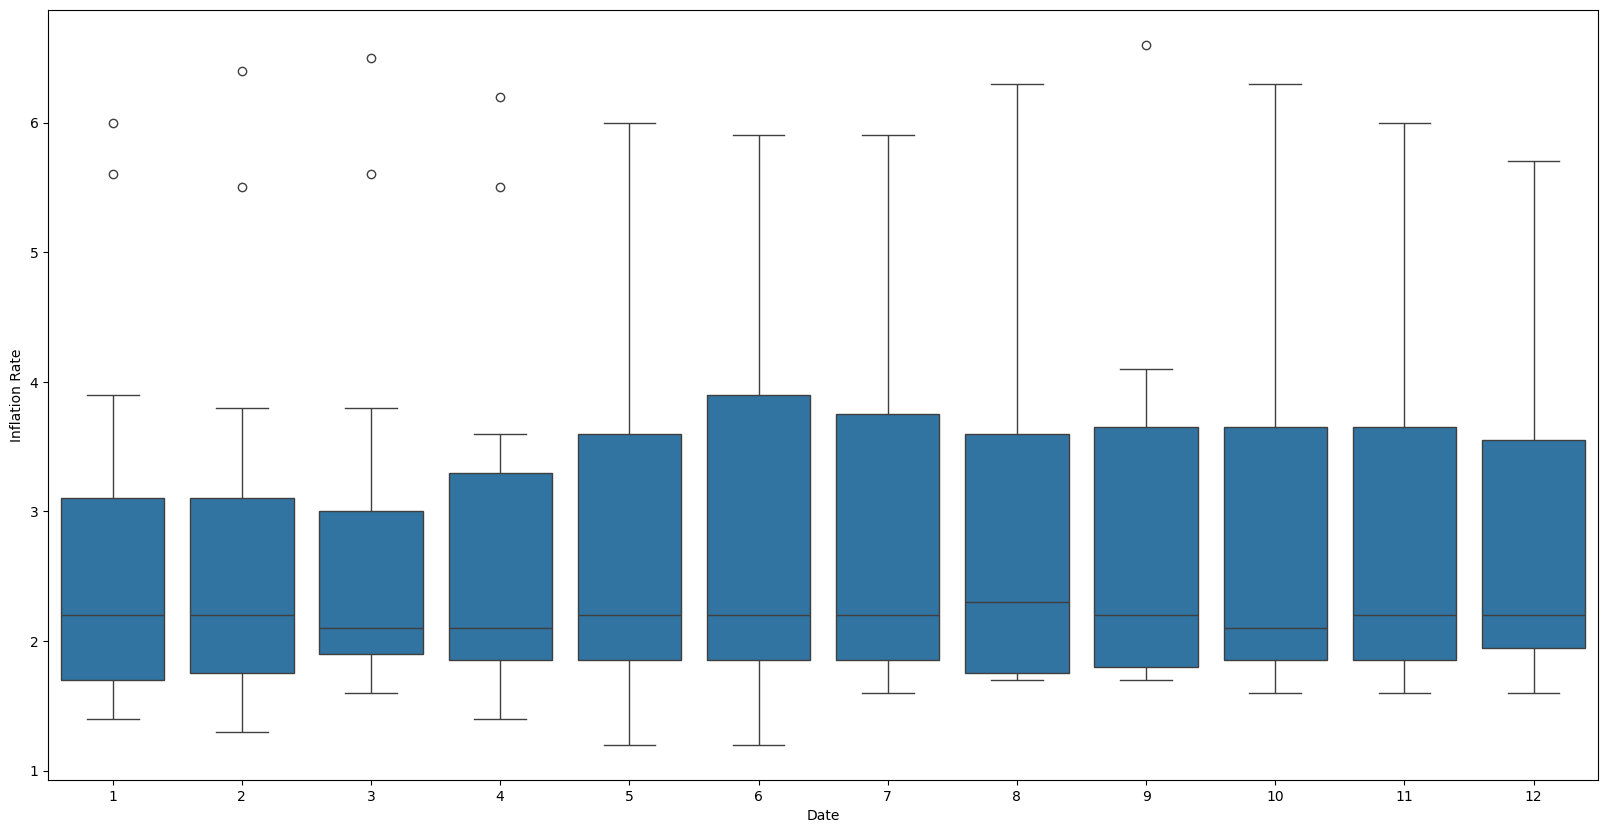

In [55]:
#Inflation Rate by Month
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = inflation_melted['Date'].dt.month,
                y = inflation_melted['Inflation Rate'],
                ax = ax)

In [56]:
# Ensure the 'Date' column is in datetime format
inflation_melted['Date'] = pd.to_datetime(inflation_melted['Date'])

# Set 'Date' as the index
inflation_melted.set_index('Date', inplace=True)

# Resample to monthly frequency, taking the mean of inflation rate for each month
inflation_monthly_resample = inflation_melted.groupby(pd.Grouper(freq='MS')).median()

inflation_monthly_resample

,Inflation Rate
Date,
2014-01-01,1.6
2014-02-01,1.6
2014-03-01,1.7
2014-04-01,1.8
2014-05-01,2.0
...,...
2024-08-01,3.2
2024-09-01,3.3
2024-10-01,3.3


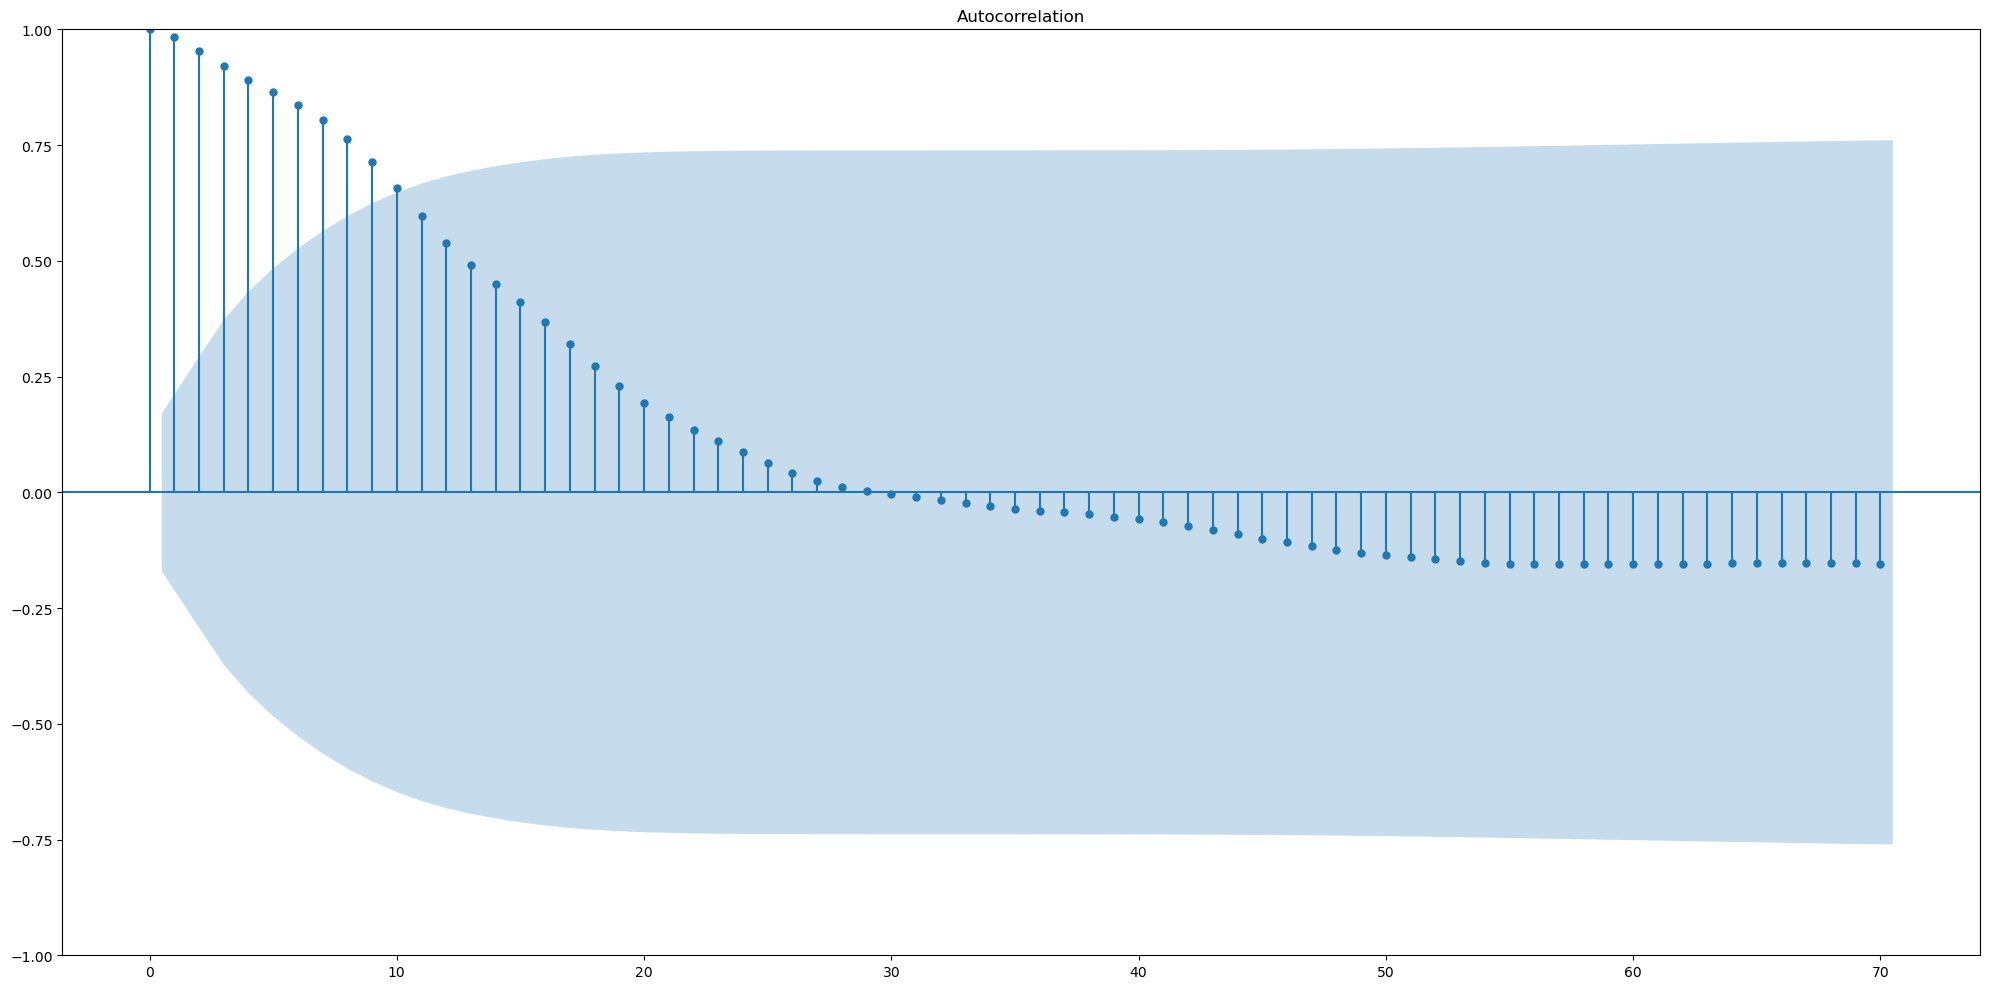

In [57]:
# Calculate the ACF (via statsmodel)
# Source: https://www.alpharithms.com/autocorrelation-time-series-python-432909/

fig = plot_acf(inflation_monthly_resample['Inflation Rate'], lags=70)
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

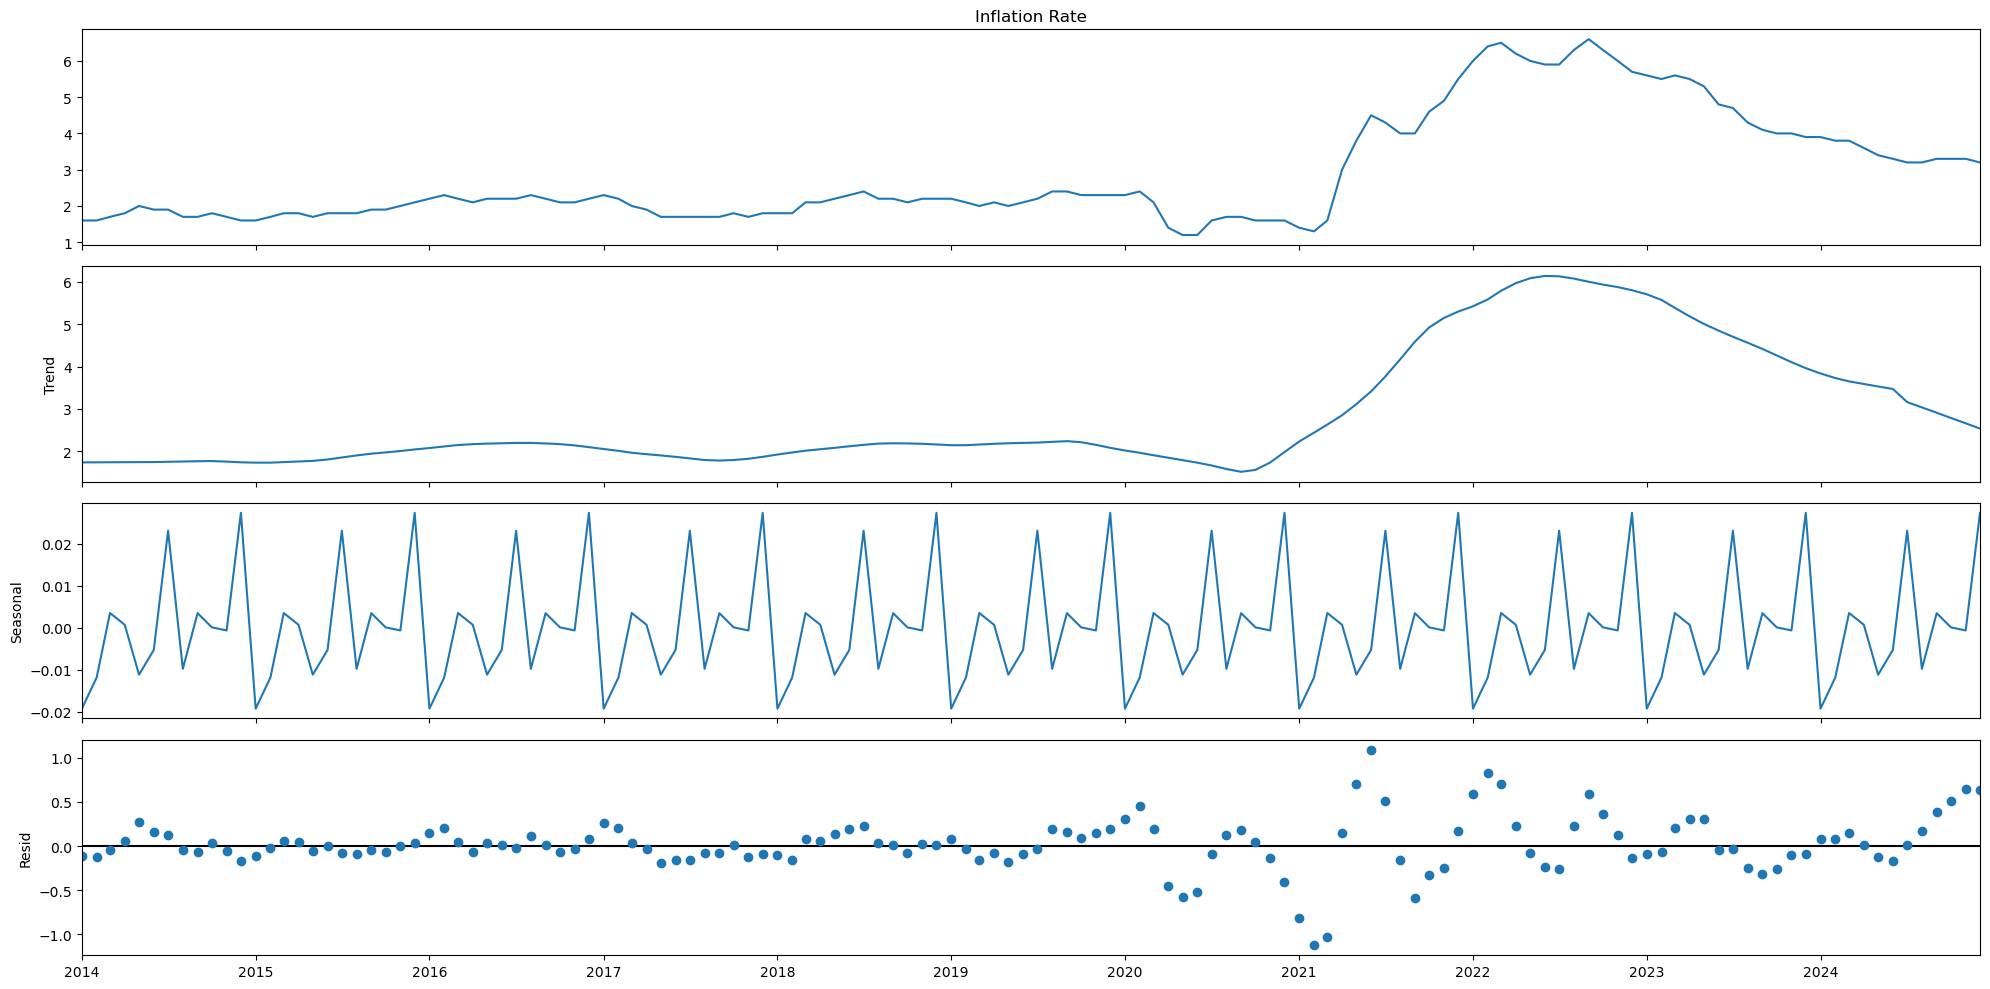

In [58]:
#Time Series Decomposition
res = sm.tsa.seasonal_decompose(inflation_monthly_resample['Inflation Rate'], period=12, extrapolate_trend='freq')
fig = res.plot()
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [59]:
#extract trend, seasonality, error
trend = res.trend
seasonal = res.seasonal
error = res.resid

# create a DataFrame to hold the results
inf_df = pd.DataFrame({
    'Inflation Rate': inflation_monthly_resample['Inflation Rate'],
    'Trend': trend,
    'Seasonal': seasonal,
    'Error': error
})

inf_df

,Inflation Rate,Trend,Seasonal,Error
Date,,,,
2014-01-01,1.6,1.735247,-0.019312,-0.115935
2014-02-01,1.6,1.736922,-0.011888,-0.125034
2014-03-01,1.7,1.738598,0.003490,-0.042087
2014-04-01,1.8,1.740273,0.000686,0.059041
2014-05-01,2.0,1.741948,-0.011209,0.269260
...,...,...,...,...
2024-08-01,3.2,3.035048,-0.009824,0.174776
2024-09-01,3.3,2.909800,0.003456,0.386744
2024-10-01,3.3,2.784552,0.000070,0.515378


<Axes: >

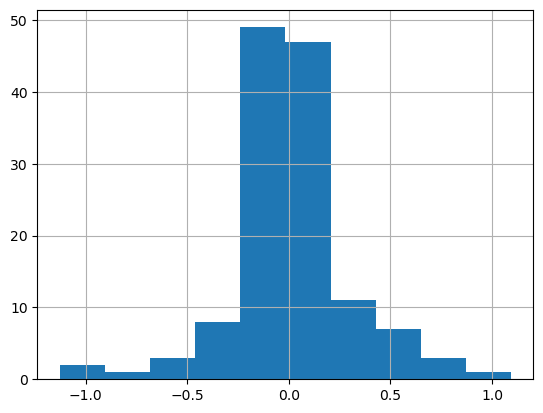

In [60]:
inf_df['Error'].hist()

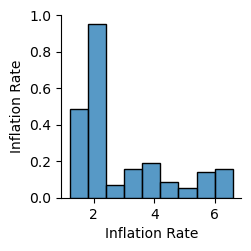

In [61]:
#Pairplot
sns.pairplot(inflation_monthly_resample)

In [62]:
df_resample_months.drop('2025-01-01', inplace = True) #drop January 2025 data
np.corrcoef(inflation_monthly_resample['Inflation Rate'],df_resample_months['COST_Spline'])

array([[1.        , 0.63008855],
       [0.63008855, 1.        ]])

In [63]:
inf_differenced = inflation_monthly_resample.diff()
inf_differenced

,Inflation Rate
Date,
2014-01-01,NaN
2014-02-01,0.0
2014-03-01,0.1
2014-04-01,0.1
2014-05-01,0.2
...,...
2024-08-01,0.0
2024-09-01,0.1
2024-10-01,0.0


<Axes: xlabel='Date'>

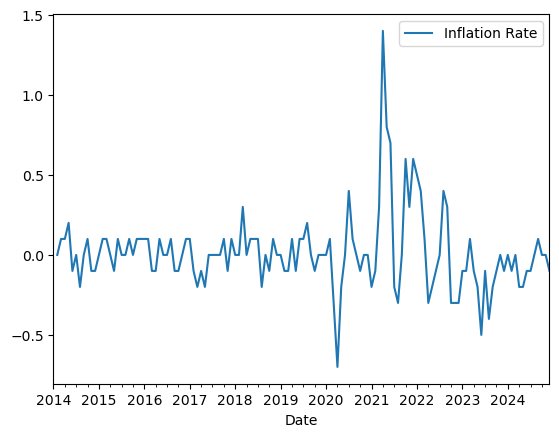

In [64]:
inf_differenced.plot()

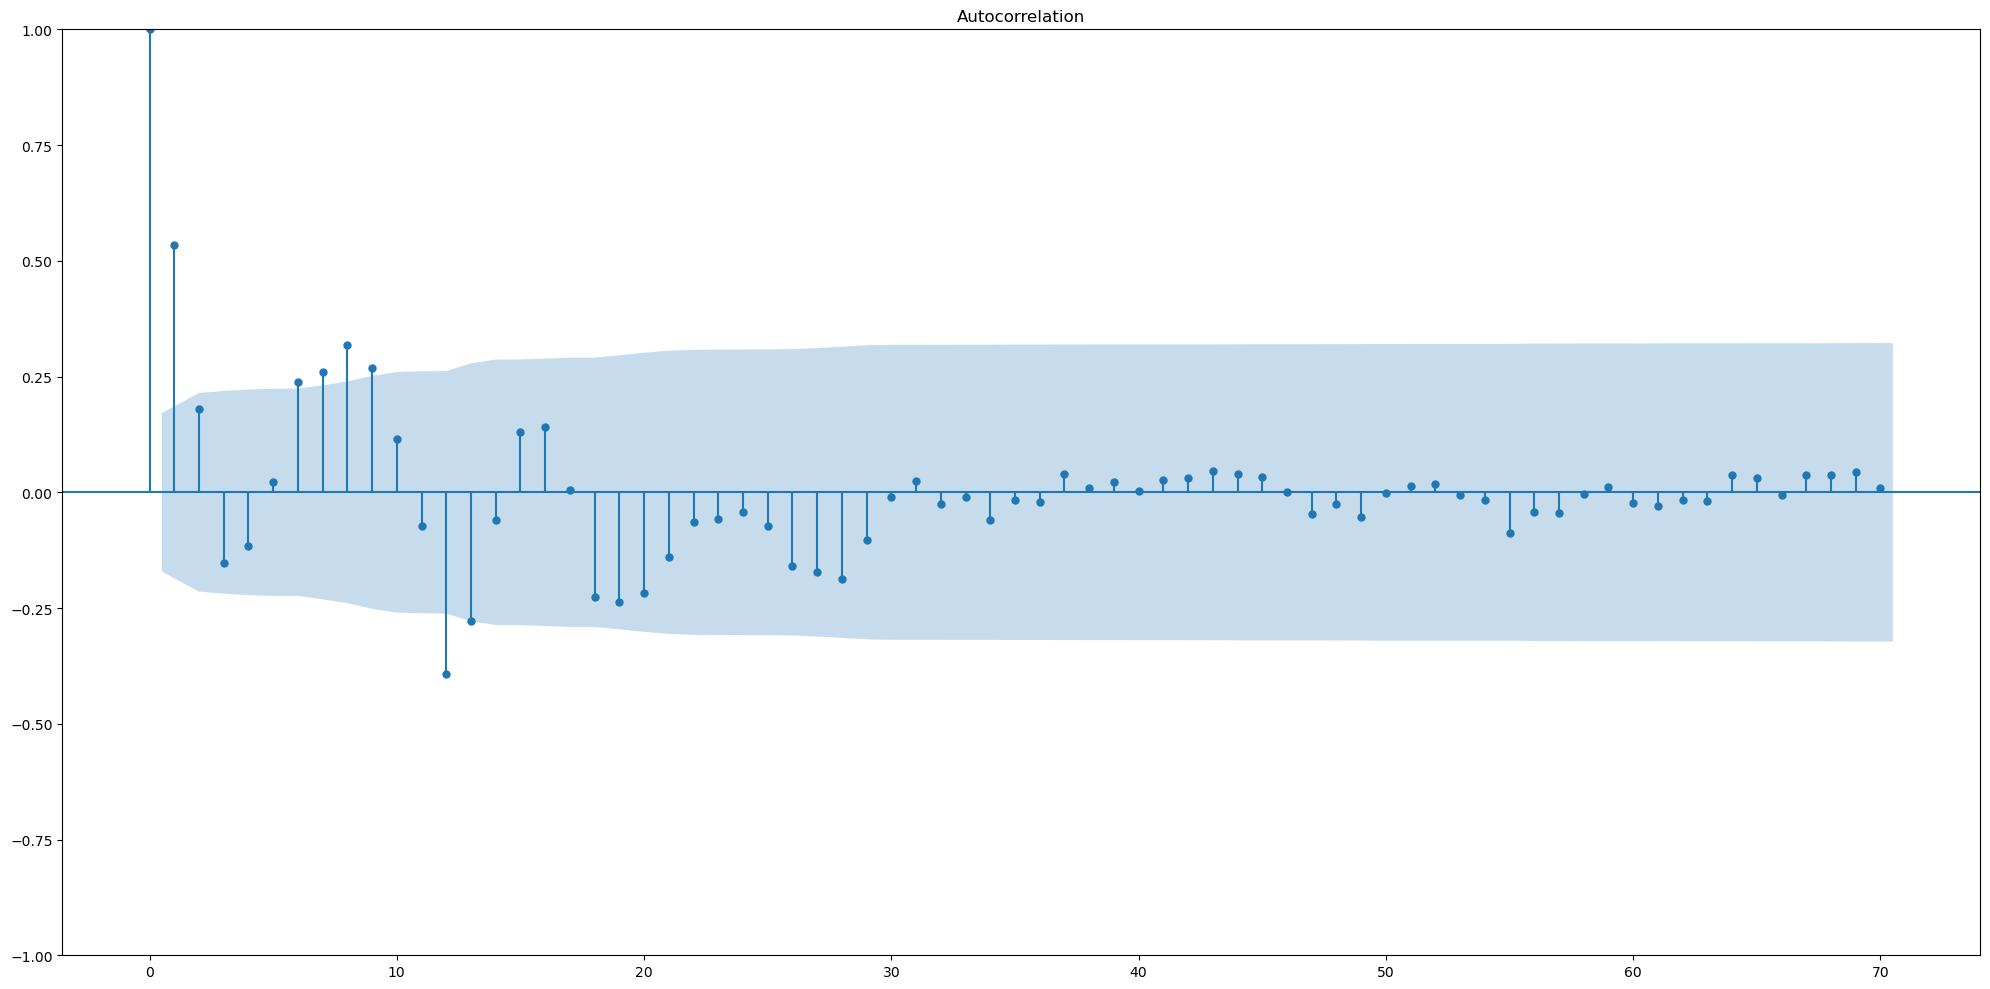

In [65]:
# Calculate the ACF (via statsmodel)
# Source: https://www.alpharithms.com/autocorrelation-time-series-python-432909/

fig = plot_acf(inf_differenced['Inflation Rate'].dropna(), lags=70)
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

<Axes: xlabel='Inflation Rate', ylabel='COST_Spline'>

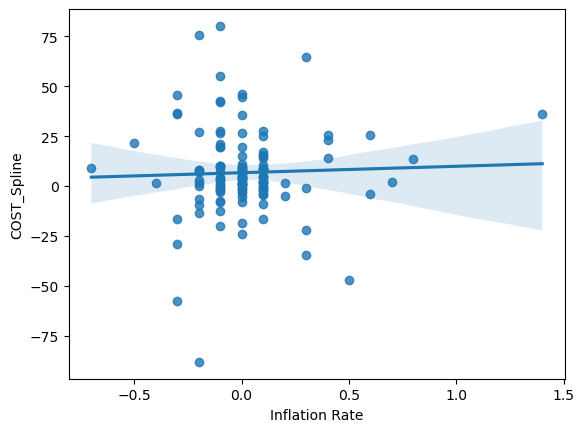

In [66]:
# Plot Regression for Detrended Data
differenced['Date'] = differenced.index
differenced.drop('2025-01-01', inplace = True)
i_merged = differenced.merge(inf_differenced, on='Date')
sns.regplot(x=inf_differenced['Inflation Rate'], y=differenced['COST_Spline'], data=i_merged)

/var/folders/hj/_jmscth928bcdm9fr013zqzr0000gn/T/ipykernel_56715/3597860724.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = results.pvalues[1]  # p-value for the 'Inflation Rate' coefficient


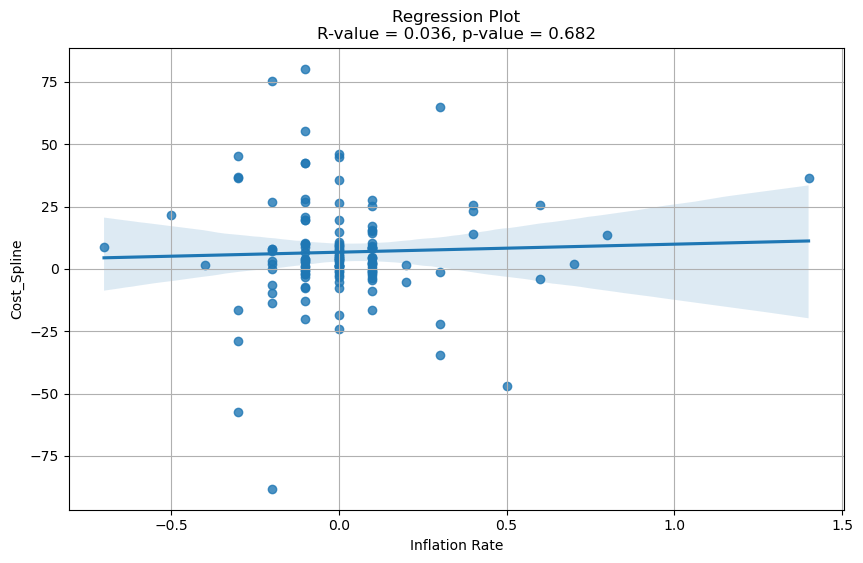

In [67]:
# Check for NaN or infinite values in the independent and dependent variables
merged_cleaned = i_merged.dropna(subset=['Inflation Rate', 'COST_Spline'])  # Drop rows with NaNs in the relevant columns

# Now perform the regression
X_cleaned = merged_cleaned['Inflation Rate']
y_cleaned = merged_cleaned['COST_Spline']

# Add a constant to the independent variable for the intercept in the regression model
X_with_const_cleaned = sm.add_constant(X_cleaned)

# Perform the linear regression using statsmodels
model = sm.OLS(y_cleaned, X_with_const_cleaned)
results = model.fit()

# Get the R-squared and p-value from the regression results
r_value = results.rsquared**0.5  # R-value is the square root of R-squared
p_value = results.pvalues[1]  # p-value for the 'Inflation Rate' coefficient

# Plot the regression line using seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x=merged_cleaned['Inflation Rate'], y=merged_cleaned['COST_Spline'], data=merged_cleaned)

# Add R-value and p-value to the plot
plt.title(f'Regression Plot\nR-value = {r_value:.3f}, p-value = {p_value:.3f}')
plt.xlabel('Inflation Rate')
plt.ylabel('Cost_Spline')
plt.grid(True)

# Display the plot
plt.show()

## Unemployment

In [68]:
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    11 non-null     int64  
 1   Jan     11 non-null     float64
 2   Feb     11 non-null     float64
 3   Mar     11 non-null     float64
 4   Apr     11 non-null     float64
 5   May     11 non-null     float64
 6   Jun     11 non-null     float64
 7   Jul     11 non-null     float64
 8   Aug     11 non-null     float64
 9   Sep     11 non-null     float64
 10  Oct     11 non-null     float64
 11  Nov     11 non-null     float64
 12  Dec     11 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 1.2 KB


In [69]:
unemployment_df.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')

In [70]:
unemployment_df.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,2019.000000,4.636364,4.6,4.627273,5.518182,5.336364,5.127273,4.981818,4.809091,4.663636,4.563636,4.509091,4.445455
std,3.316625,1.121849,1.1,1.050801,3.231352,2.782184,2.147599,1.935881,1.430003,1.281618,1.014172,0.997451,0.982205
min,2014.000000,3.500000,3.5,3.500000,3.400000,3.600000,3.600000,3.500000,3.600000,3.500000,3.600000,3.600000,3.500000
25%,2016.500000,3.850000,3.8,3.850000,3.800000,3.700000,3.800000,3.750000,3.750000,3.750000,3.850000,3.750000,3.850000
50%,2019.000000,4.000000,4.1,4.400000,4.400000,4.400000,4.300000,4.300000,4.400000,4.300000,4.200000,4.200000,4.100000
75%,2021.500000,5.250000,5.2,5.200000,5.750000,5.700000,5.600000,5.300000,5.100000,5.000000,4.950000,4.900000,4.850000
max,2024.000000,6.600000,6.7,6.700000,14.800000,13.200000,11.000000,10.200000,8.400000,7.800000,6.900000,6.700000,6.700000


In [71]:
unemployment_df.isnull().sum()

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
dtype: int64

In [72]:
#add annual average column
unemployment_df['Annual Average'] = unemployment_df.iloc[:, 1:].mean(axis=1)

# View the updated DataFrame
print(unemployment_df)

    Year  Jan  Feb  Mar   Apr   May   Jun   Jul  Aug  Sep  Oct  Nov  Dec  \
0   2014  6.6  6.7  6.7   6.2   6.3   6.1   6.2  6.1  5.9  5.7  5.8  5.6   
1   2015  5.7  5.5  5.4   5.4   5.6   5.3   5.2  5.1  5.0  5.0  5.1  5.0   
2   2016  4.8  4.9  5.0   5.1   4.8   4.9   4.8  4.9  5.0  4.9  4.7  4.7   
3   2017  4.7  4.6  4.4   4.4   4.4   4.3   4.3  4.4  4.3  4.2  4.2  4.1   
4   2018  4.0  4.1  4.0   4.0   3.8   4.0   3.8  3.8  3.7  3.8  3.8  3.9   
5   2019  4.0  3.8  3.8   3.7   3.6   3.6   3.7  3.6  3.5  3.6  3.6  3.6   
6   2020  3.6  3.5  4.4  14.8  13.2  11.0  10.2  8.4  7.8  6.9  6.7  6.7   
7   2021  6.4  6.2  6.1   6.1   5.8   5.9   5.4  5.1  4.7  4.5  4.2  3.9   
8   2022  4.0  3.8  3.7   3.7   3.6   3.6   3.5  3.6  3.5  3.6  3.6  3.5   
9   2023  3.5  3.6  3.5   3.4   3.6   3.6   3.5  3.7  3.8  3.9  3.7  3.8   
10  2024  3.7  3.9  3.9   3.9   4.0   4.1   4.2  4.2  4.1  4.1  4.2  4.1   

    Annual Average  
0         6.158333  
1         5.275000  
2         4.875000  
3  

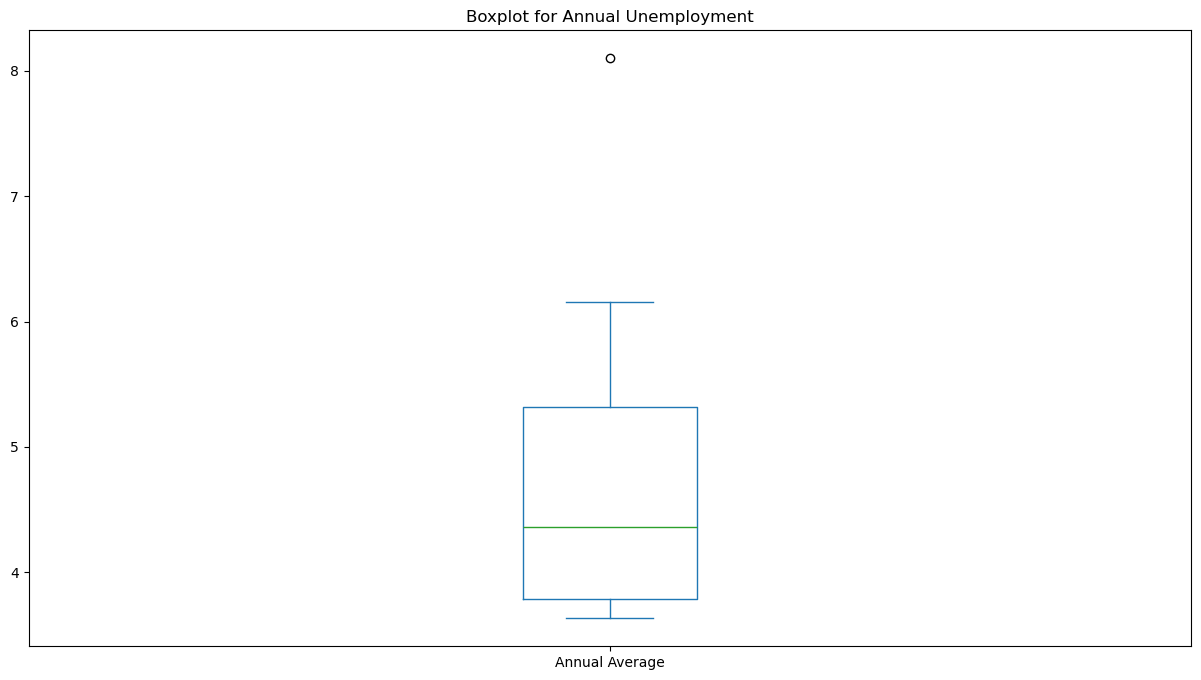

In [73]:
#Look for outliers for annual unemployment
plt.figure(figsize=(15,8))
unemployment_df['Annual Average'].plot(kind='box')
plt.title('Boxplot for Annual Unemployment')
plt.show()

In [74]:
# Filter out the rows where the columns are non-month (like 'Annual Average')
unemployment_df_filtered = unemployment_df.loc[:, ~unemployment_df.columns.str.contains("Average")]

# Reshape the data to long format
unemployment_melted = unemployment_df_filtered.melt(id_vars=['Year'], var_name='Month', value_name='Unemployment Rate')

# Create a 'Date' column by combining Year and Month
unemployment_melted['Date'] = pd.to_datetime(unemployment_melted['Year'].astype(str) + '-' + unemployment_melted['Month'], format='%Y-%b')

# Sort the data by Date to ensure the timeline is continuous
unemployment_melted = unemployment_melted.sort_values(by='Date')

# View the reshaped DataFrame
print(unemployment_melted)

     Year Month  Unemployment Rate       Date
0    2014   Jan                6.6 2014-01-01
11   2014   Feb                6.7 2014-02-01
22   2014   Mar                6.7 2014-03-01
33   2014   Apr                6.2 2014-04-01
44   2014   May                6.3 2014-05-01
..    ...   ...                ...        ...
87   2024   Aug                4.2 2024-08-01
98   2024   Sep                4.1 2024-09-01
109  2024   Oct                4.1 2024-10-01
120  2024   Nov                4.2 2024-11-01
131  2024   Dec                4.1 2024-12-01

[132 rows x 4 columns]


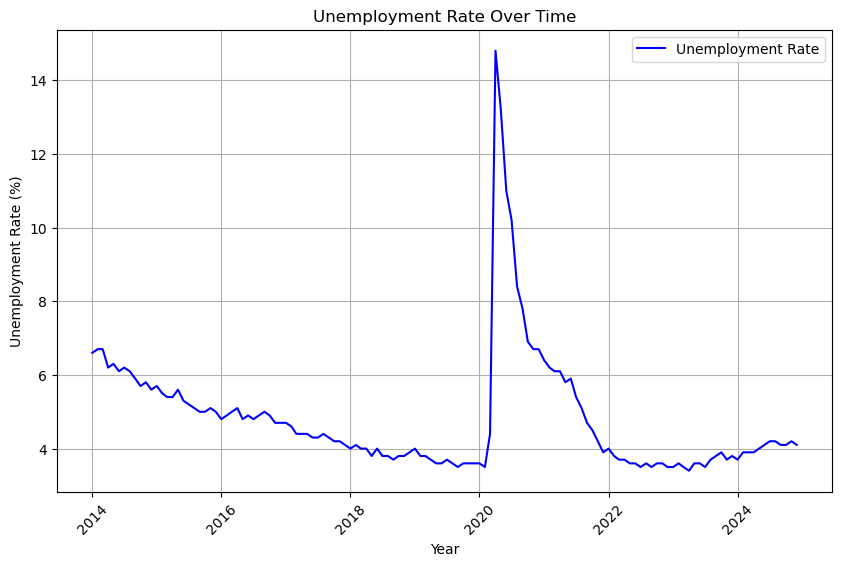

In [75]:
# Plot the unemployment Rate
plt.figure(figsize=(10, 6))
plt.plot(unemployment_melted['Date'], unemployment_melted['Unemployment Rate'], label='Unemployment Rate', color='b')

plt.title('Unemployment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()



<Axes: xlabel='Date', ylabel='Unemployment Rate'>

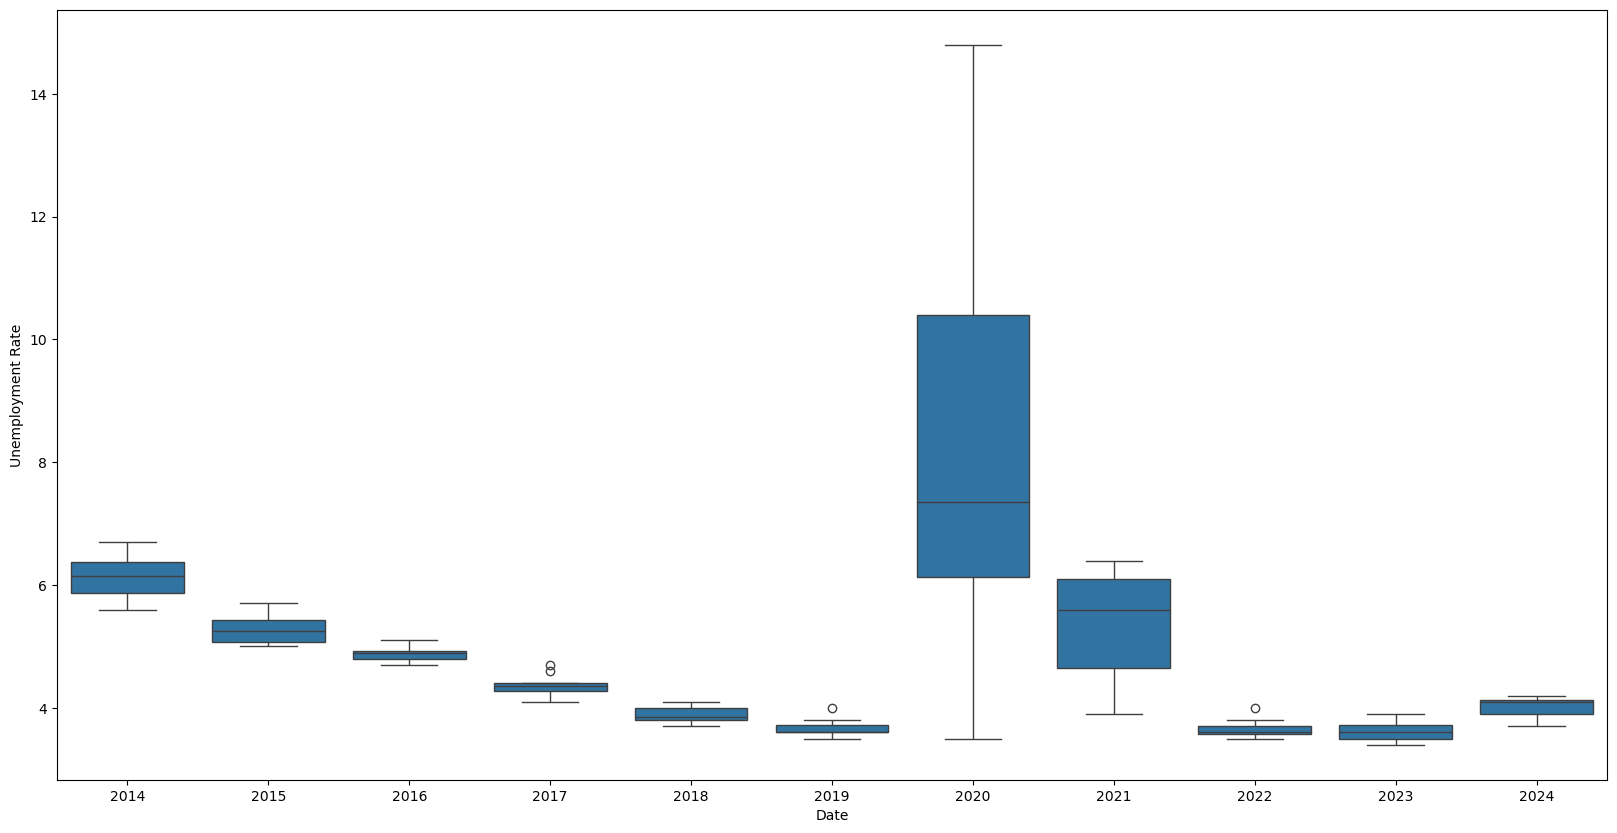

In [76]:
#Unemployment Rate by Year
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = unemployment_melted['Date'].dt.year,
                y = unemployment_melted['Unemployment Rate'],
                ax = ax)

<Axes: xlabel='Month', ylabel='Unemployment Rate'>

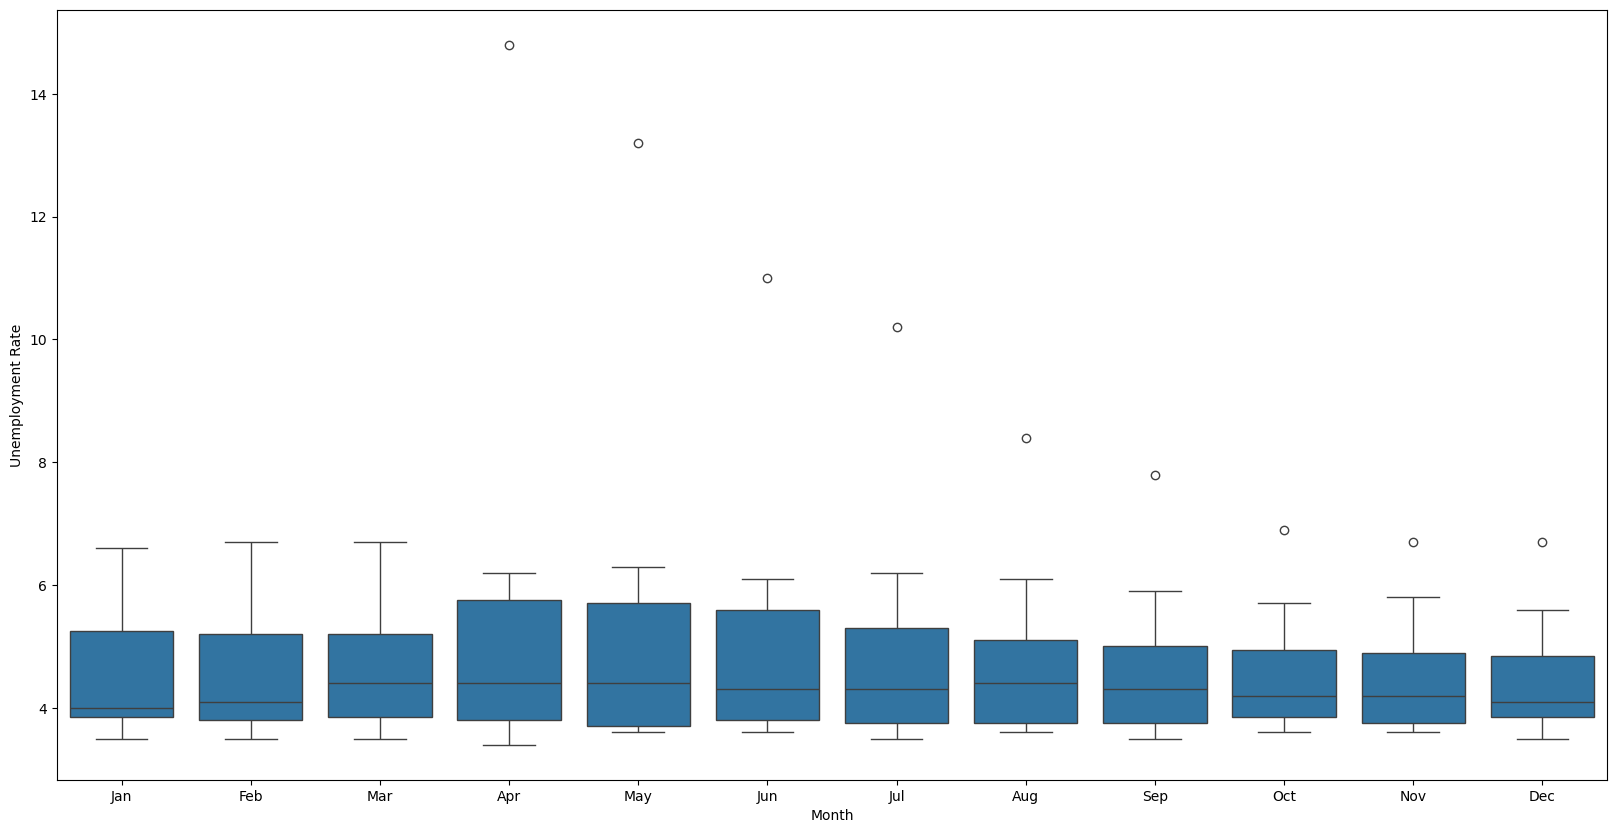

In [77]:
#Inflation Rate by Month
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = unemployment_melted['Month'],
                y = unemployment_melted['Unemployment Rate'],
                ax = ax)

In [78]:
# Set 'Date' as the index
unemployment_melted.set_index('Date', inplace=True)

print(unemployment_melted)

            Year Month  Unemployment Rate
Date                                     
2014-01-01  2014   Jan                6.6
2014-02-01  2014   Feb                6.7
2014-03-01  2014   Mar                6.7
2014-04-01  2014   Apr                6.2
2014-05-01  2014   May                6.3
...          ...   ...                ...
2024-08-01  2024   Aug                4.2
2024-09-01  2024   Sep                4.1
2024-10-01  2024   Oct                4.1
2024-11-01  2024   Nov                4.2
2024-12-01  2024   Dec                4.1

[132 rows x 3 columns]


In [79]:
# Resample to monthly frequency, taking the median of unemployment rate for each month
unemployment_monthly_resample = unemployment_melted['Unemployment Rate'].resample('MS').median()

# Convert the result back to a DataFrame and rename the column
unemployment_monthly_resample = unemployment_monthly_resample.to_frame(name='Unemployment Rate')

# Display the resampled DataFrame
print(unemployment_monthly_resample)

            Unemployment Rate
Date                         
2014-01-01                6.6
2014-02-01                6.7
2014-03-01                6.7
2014-04-01                6.2
2014-05-01                6.3
...                       ...
2024-08-01                4.2
2024-09-01                4.1
2024-10-01                4.1
2024-11-01                4.2
2024-12-01                4.1

[132 rows x 1 columns]


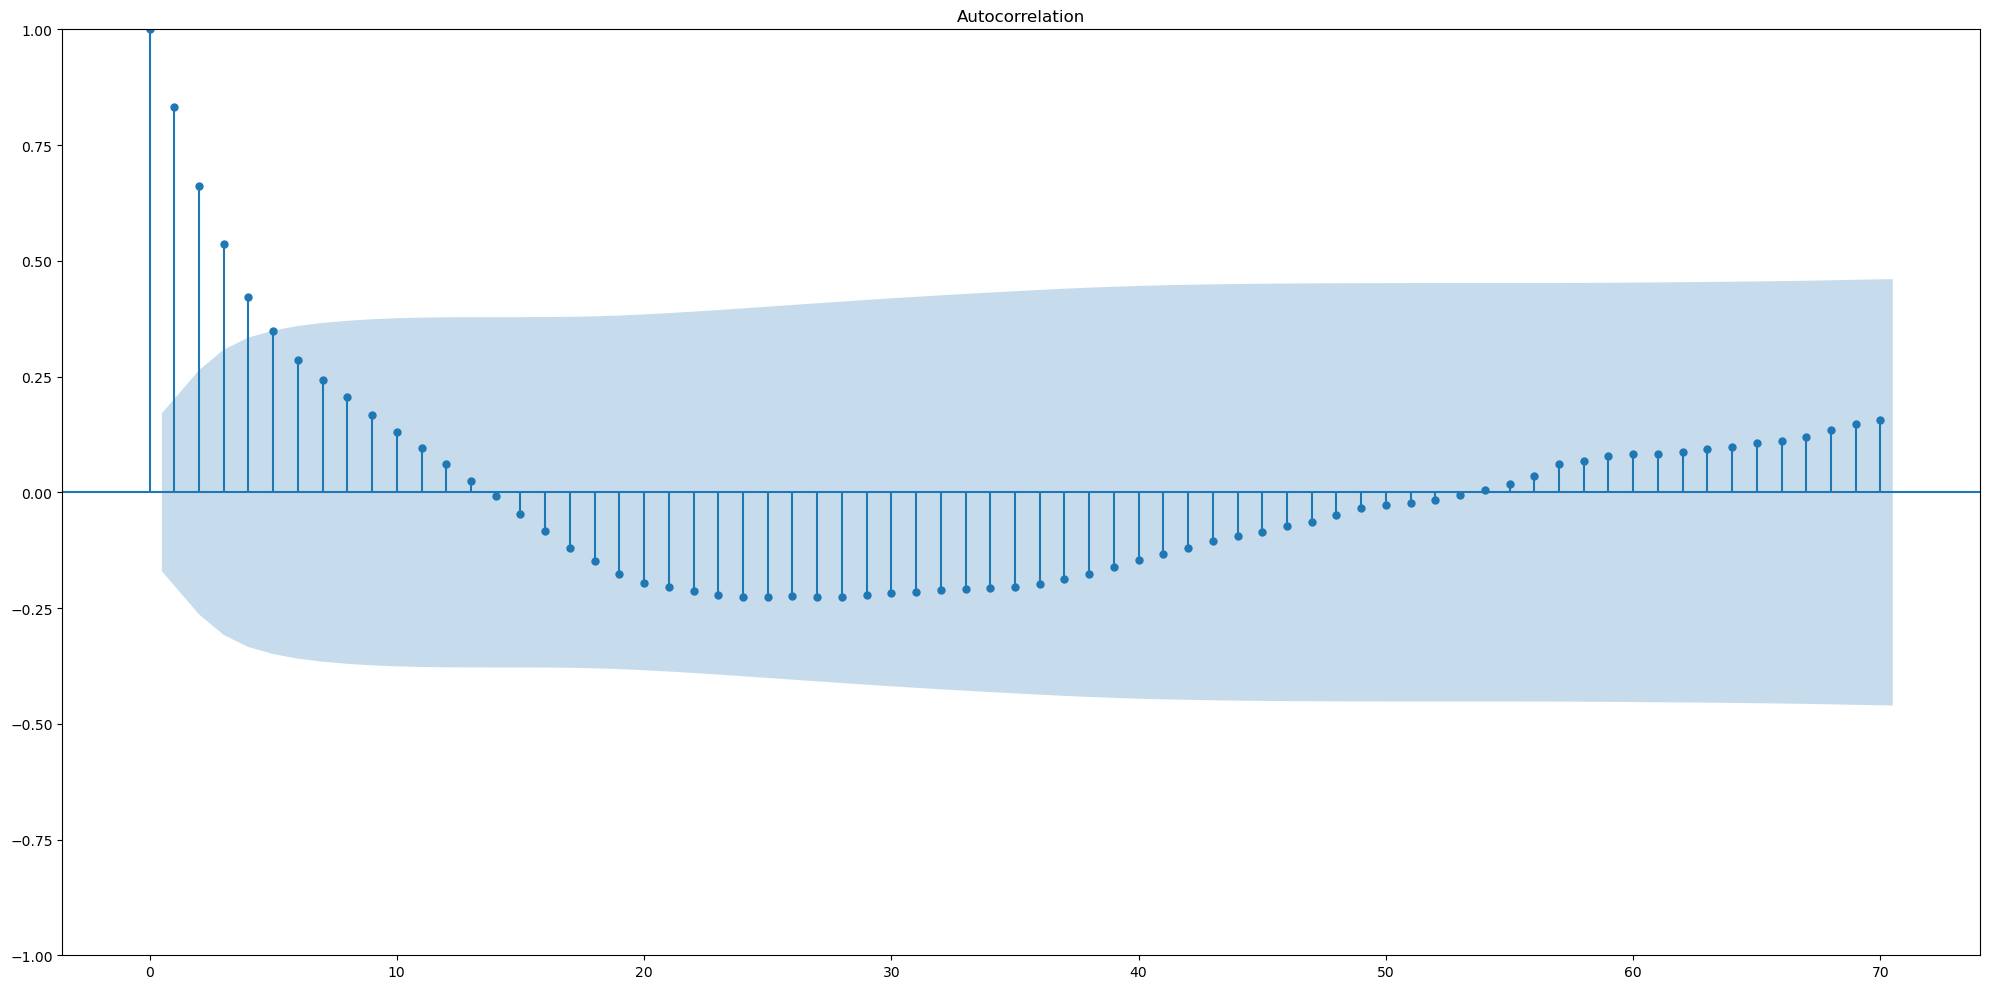

In [80]:
# Calculate the ACF (via statsmodel)
# Source: https://www.alpharithms.com/autocorrelation-time-series-python-432909/

fig = plot_acf(unemployment_monthly_resample['Unemployment Rate'], lags=70)
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

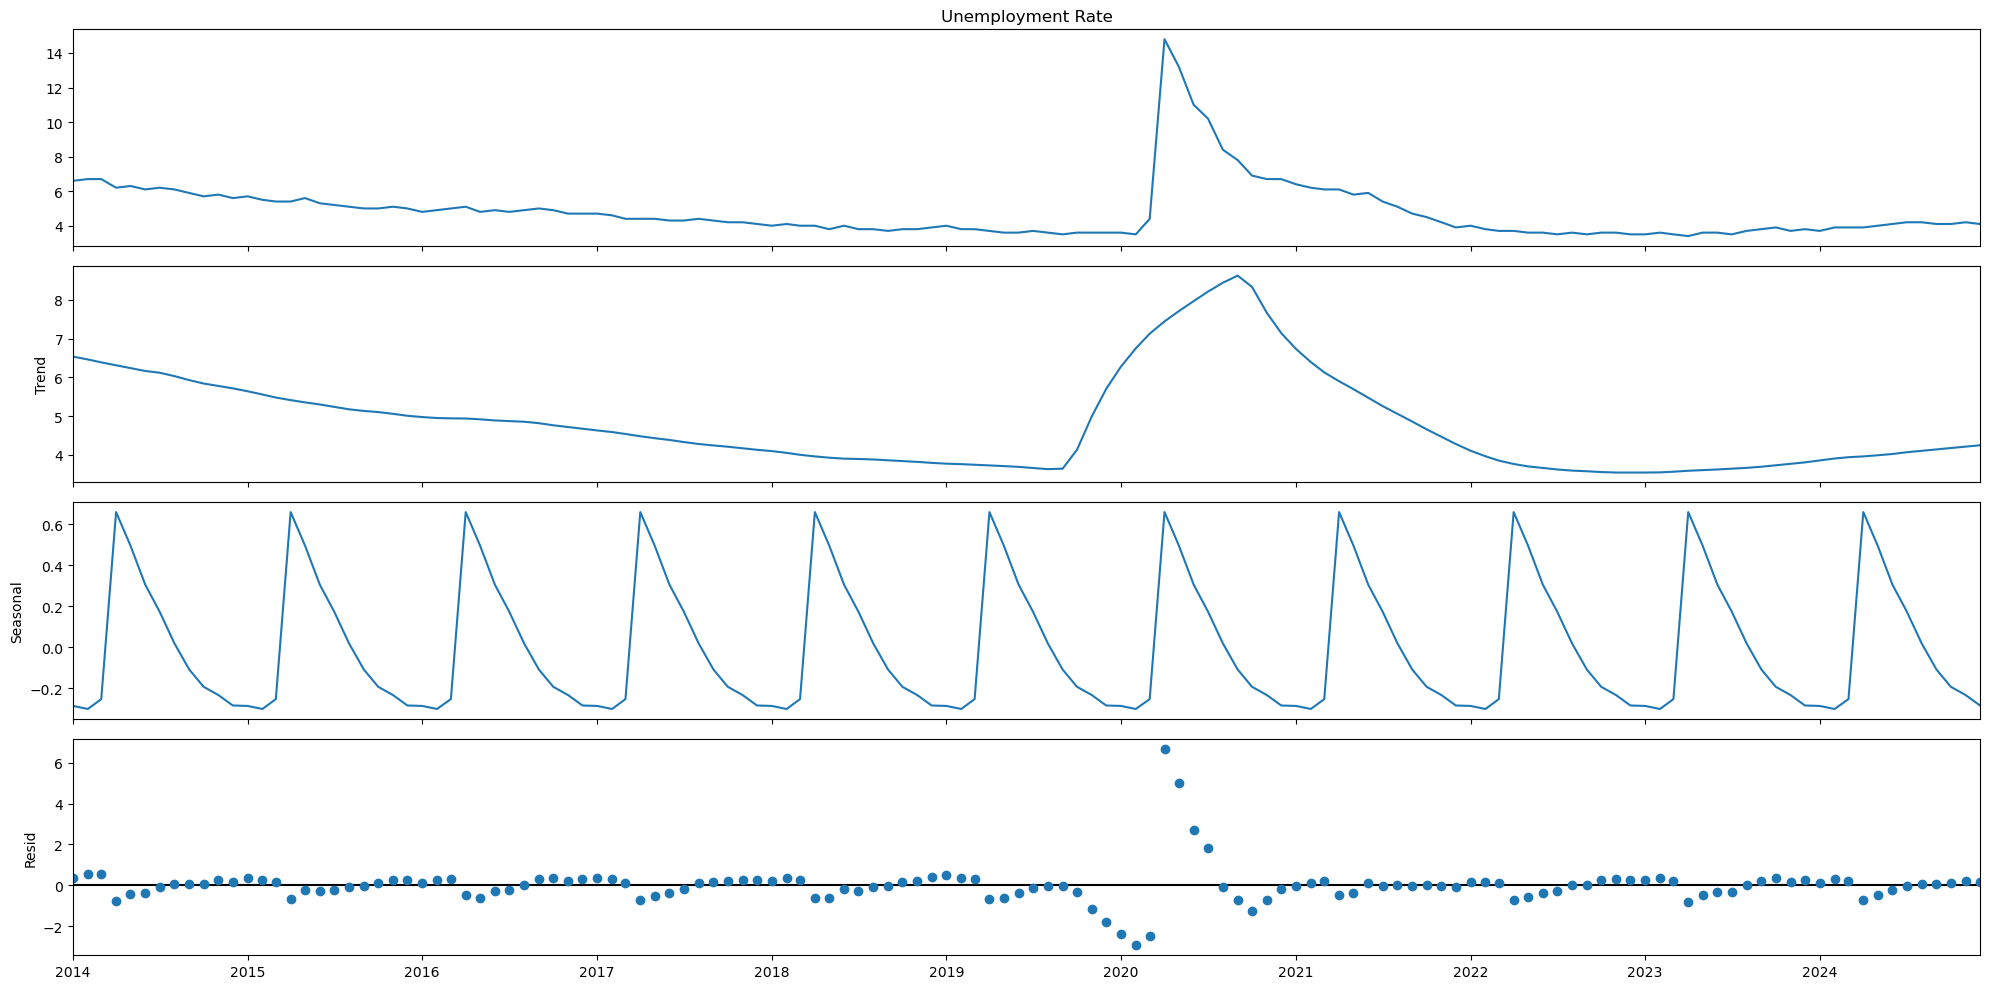

In [81]:
#Time Series Decomposition
res = sm.tsa.seasonal_decompose(unemployment_monthly_resample['Unemployment Rate'], period=12, extrapolate_trend='freq')
fig = res.plot()
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [82]:
#extract trend, seasonality, error
trend = res.trend
seasonal = res.seasonal
error = res.resid

# create a DataFrame to hold the results
une_df = pd.DataFrame({
    'Unemployment Rate': unemployment_monthly_resample['Unemployment Rate'],
    'Trend': trend,
    'Seasonal': seasonal,
    'Error': error
})

une_df

,Unemployment Rate,Trend,Seasonal,Error
Date,,,,
2014-01-01,6.6,6.537359,-0.285235,0.347876
2014-02-01,6.7,6.462855,-0.300053,0.537198
2014-03-01,6.7,6.388350,-0.251992,0.563642
2014-04-01,6.2,6.313845,0.658569,-0.772414
2014-05-01,6.3,6.239341,0.495645,-0.434986
...,...,...,...,...
2024-08-01,4.2,4.102151,0.019481,0.078368
2024-09-01,4.1,4.138107,-0.108030,0.069923
2024-10-01,4.1,4.174063,-0.191981,0.117918


<Axes: >

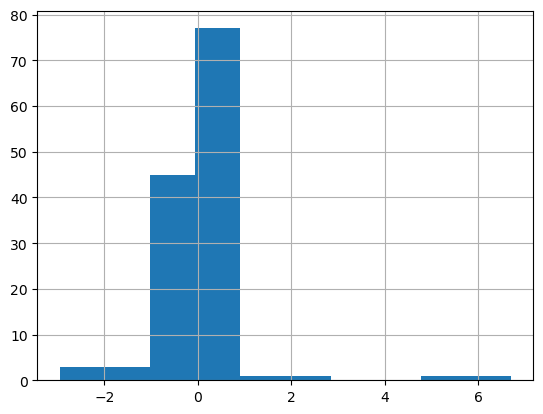

In [83]:
une_df['Error'].hist()

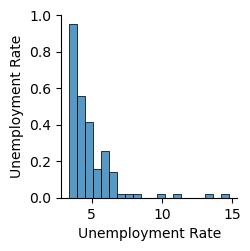

In [84]:
#Pairplot
sns.pairplot(unemployment_monthly_resample)

In [85]:
np.corrcoef(unemployment_monthly_resample['Unemployment Rate'],df_resample_months['COST_Spline'])

array([[ 1.        , -0.24599054],
       [-0.24599054,  1.        ]])

In [86]:
une_differenced = unemployment_monthly_resample.diff()
une_differenced

,Unemployment Rate
Date,
2014-01-01,NaN
2014-02-01,0.1
2014-03-01,0.0
2014-04-01,-0.5
2014-05-01,0.1
...,...
2024-08-01,0.0
2024-09-01,-0.1
2024-10-01,0.0


<Axes: xlabel='Date'>

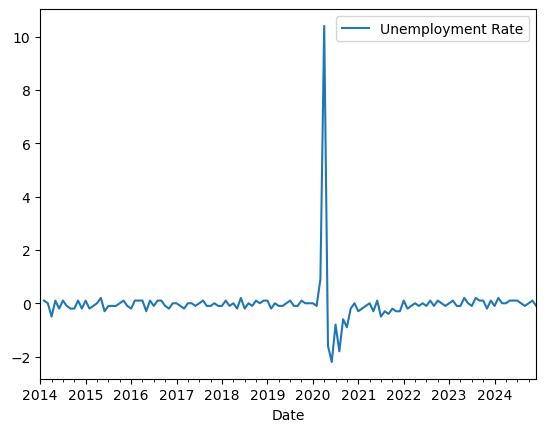

In [87]:
une_differenced.plot()

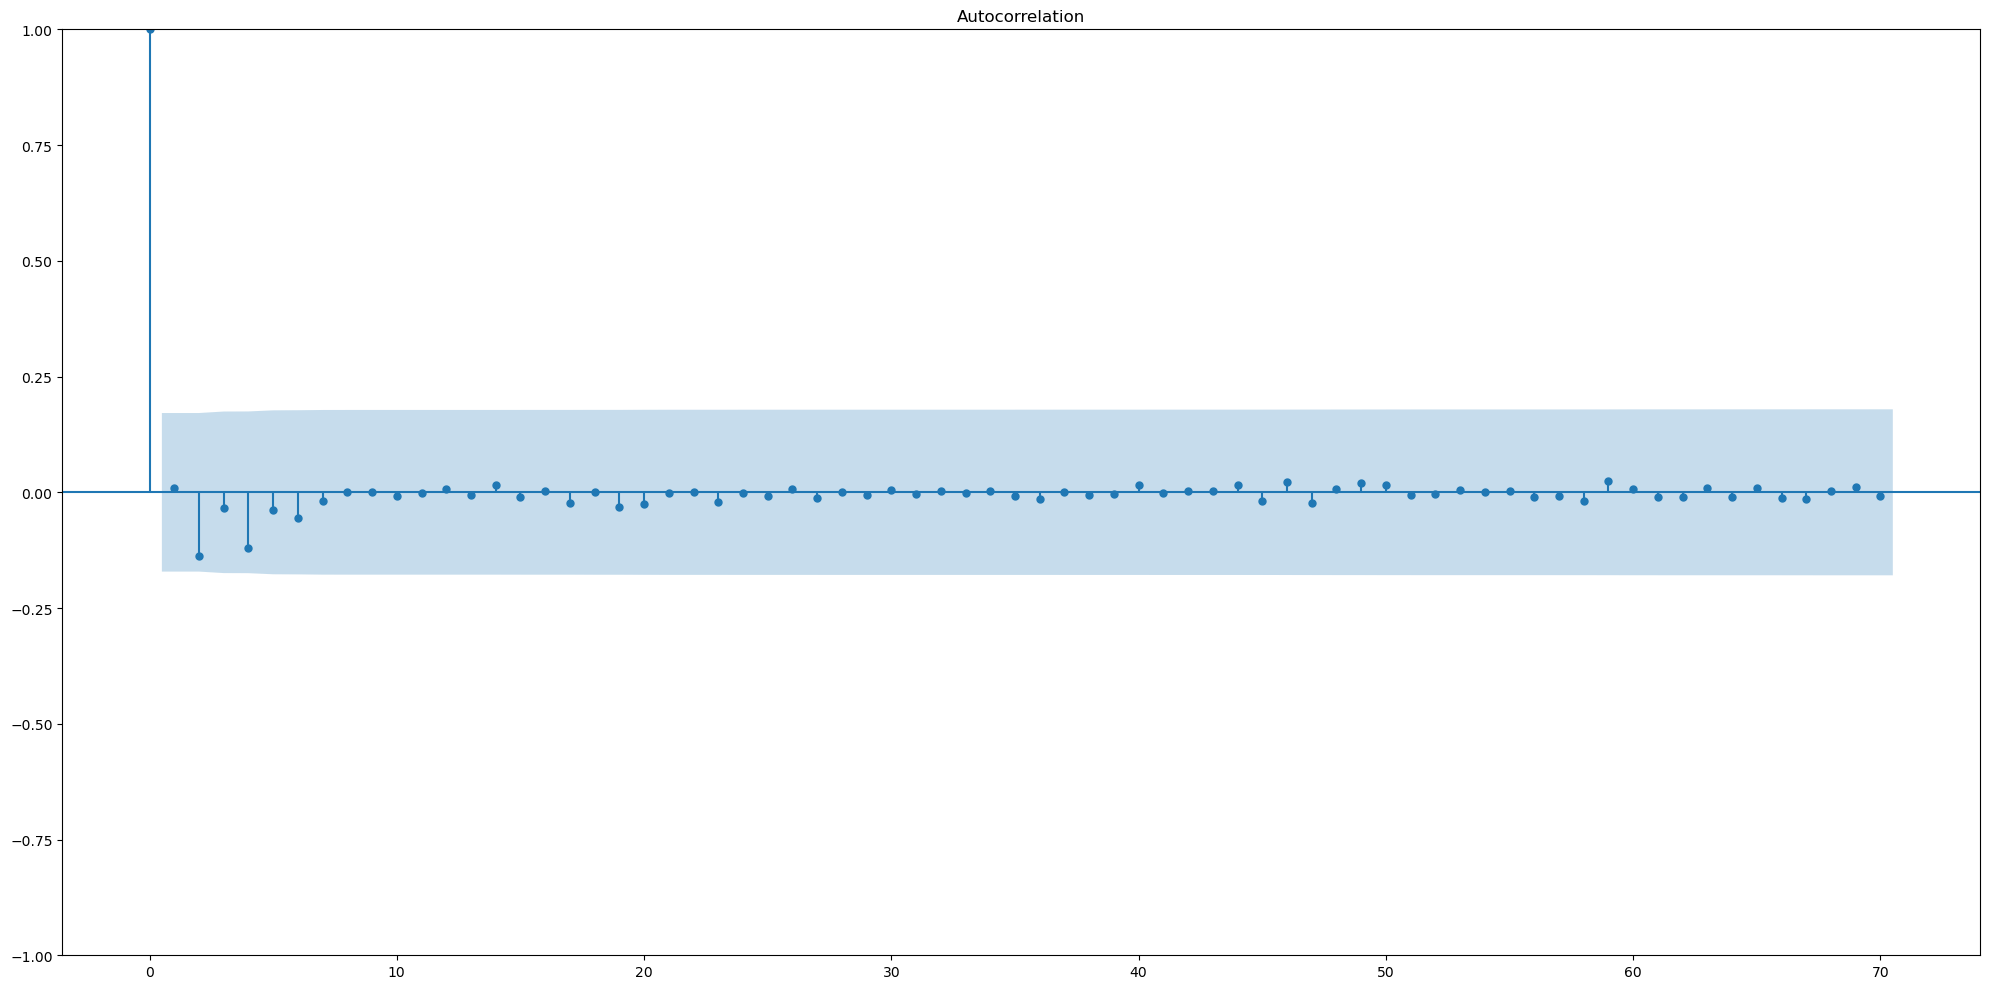

In [88]:
# Calculate the ACF (via statsmodel)
# Source: https://www.alpharithms.com/autocorrelation-time-series-python-432909/

fig = plot_acf(une_differenced['Unemployment Rate'].dropna(), lags=70)
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

<Axes: xlabel='Unemployment Rate', ylabel='COST_Spline'>

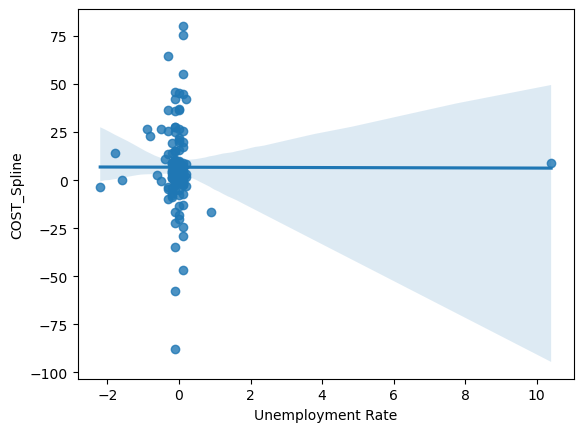

In [89]:
# Plot Regression for Detrended Data
u_merged = differenced.merge(une_differenced, on='Date')
sns.regplot(x=une_differenced['Unemployment Rate'], y=differenced['COST_Spline'], data=u_merged)

/var/folders/hj/_jmscth928bcdm9fr013zqzr0000gn/T/ipykernel_56715/2308016615.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = results.pvalues[1]  # p-value for the 'Inflation Rate' coefficient


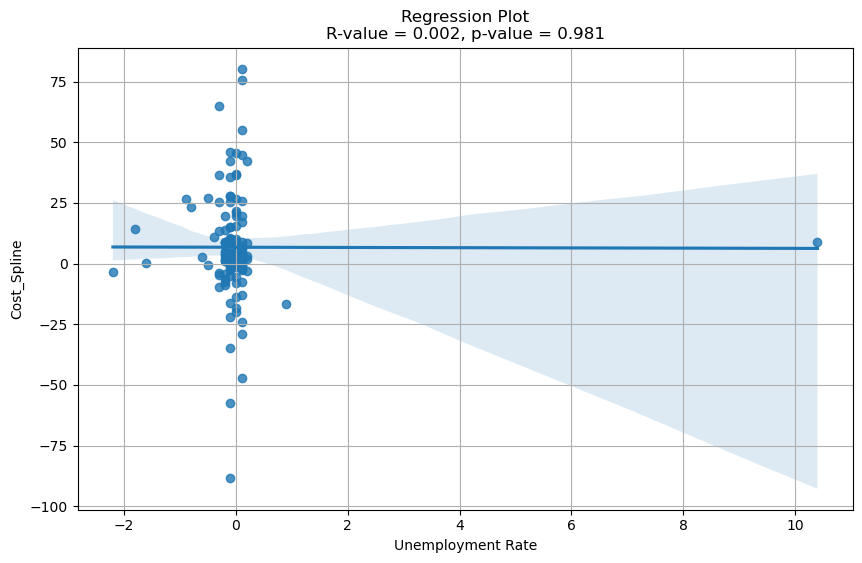

In [90]:
# Check for NaN or infinite values in the independent and dependent variables
u_merged_cleaned = u_merged.dropna(subset=['Unemployment Rate', 'COST_Spline'])  # Drop rows with NaNs in the relevant columns

# Now perform the regression
X_cleaned = u_merged_cleaned['Unemployment Rate']
y_cleaned = u_merged_cleaned['COST_Spline']

# Add a constant to the independent variable for the intercept in the regression model
X_with_const_cleaned = sm.add_constant(X_cleaned)

# Perform the linear regression using statsmodels
model = sm.OLS(y_cleaned, X_with_const_cleaned)
results = model.fit()

# Get the R-squared and p-value from the regression results
r_value = results.rsquared**0.5  # R-value is the square root of R-squared
p_value = results.pvalues[1]  # p-value for the 'Inflation Rate' coefficient

# Plot the regression line using seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x=u_merged_cleaned['Unemployment Rate'], y=merged_cleaned['COST_Spline'], data=u_merged_cleaned)

# Add R-value and p-value to the plot
plt.title(f'Regression Plot\nR-value = {r_value:.3f}, p-value = {p_value:.3f}')
plt.xlabel('Unemployment Rate')
plt.ylabel('Cost_Spline')
plt.grid(True)

# Display the plot
plt.show()


## RSI

In [91]:
rsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   observation_date  396 non-null    object
 1   RSXFS             396 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.3+ KB


In [92]:
rsi_df.columns

Index(['observation_date', 'RSXFS'], dtype='object')

In [93]:
rsi_df.describe()

,RSXFS
count,396.000000
mean,337172.578283
std,125515.729348
min,146805.000000
25%,246900.000000
50%,322931.000000
75%,404767.500000
max,632249.000000


In [94]:
rsi_df.isnull().sum()

observation_date    0
RSXFS               0
dtype: int64

In [95]:
# Rename the column
rsi_df.rename(columns={"observation_date": "Date"}, inplace=True)

# Convert "Date" to datetime object
rsi_df["Date"] = pd.to_datetime(rsi_df["Date"])

In [96]:
# Filter the DataFrame for dates between 2014 and 2024
rsi_df = rsi_df[(rsi_df["Date"] >= "2014-01-01") & (rsi_df["Date"] <= "2024-12-31")]
rsi_df

,Date,RSXFS
264,2014-01-01,373083
265,2014-02-01,378355
266,2014-03-01,382101
267,2014-04-01,386376
268,2014-05-01,386735
...,...,...
391,2024-08-01,614535
392,2024-09-01,620104
393,2024-10-01,623269
394,2024-11-01,628727


/var/folders/hj/_jmscth928bcdm9fr013zqzr0000gn/T/ipykernel_56715/3096186031.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rsi_df["Year"] = rsi_df["Date"].dt.year
/var/folders/hj/_jmscth928bcdm9fr013zqzr0000gn/T/ipykernel_56715/3096186031.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rsi_df['Annual_Average'] = rsi_df["Year"].map(annual_averages["RSXFS"])


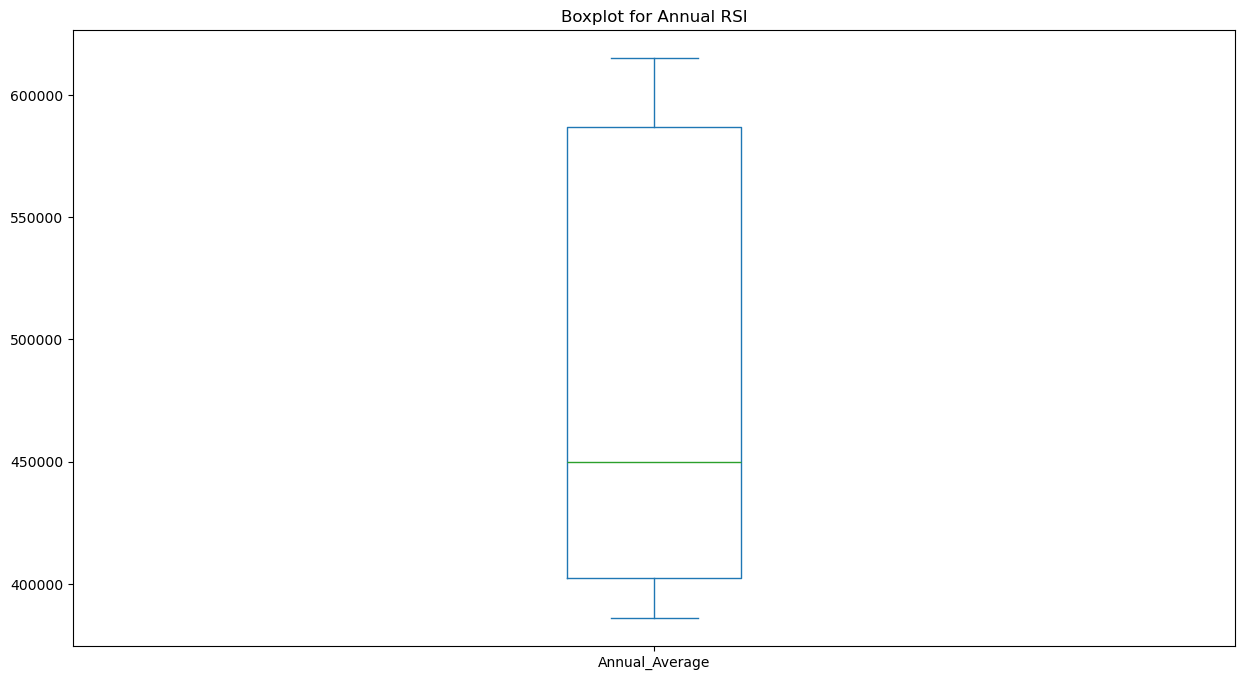

In [97]:
#Look for outliers for annual RSI

# Extract year from the "Date" column
rsi_df["Year"] = rsi_df["Date"].dt.year

# Calculate annual averages
annual_averages = rsi_df.groupby("Year").mean()

# Map the annual averages back to the original DataFrame
rsi_df['Annual_Average'] = rsi_df["Year"].map(annual_averages["RSXFS"])

plt.figure(figsize=(15,8))
rsi_df['Annual_Average'].plot(kind='box')
plt.title('Boxplot for Annual RSI')
plt.show()

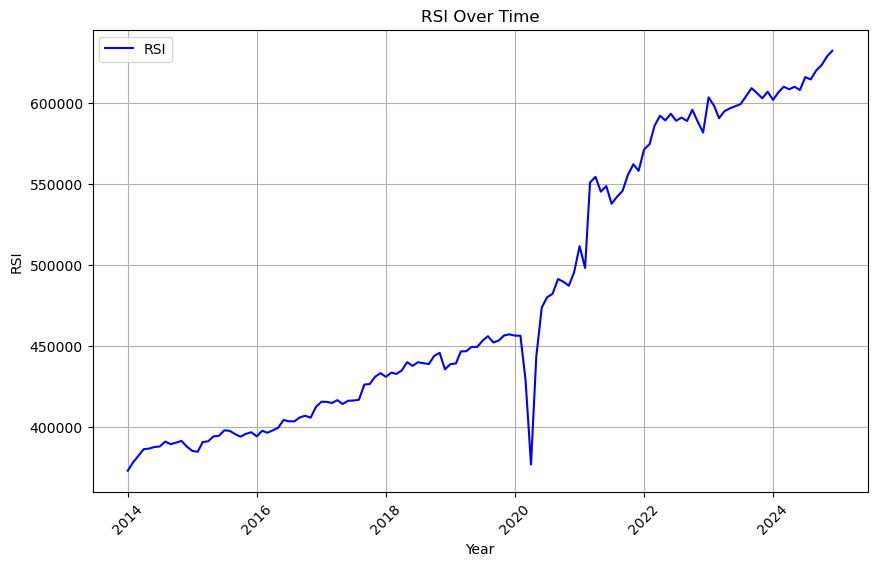

In [98]:
# Plot the unemployment Rate
plt.figure(figsize=(10, 6))
plt.plot(rsi_df['Date'], rsi_df['RSXFS'], label='RSI', color='b')

plt.title('RSI Over Time')
plt.xlabel('Year')
plt.ylabel('RSI')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()



<Axes: xlabel='Date', ylabel='RSXFS'>

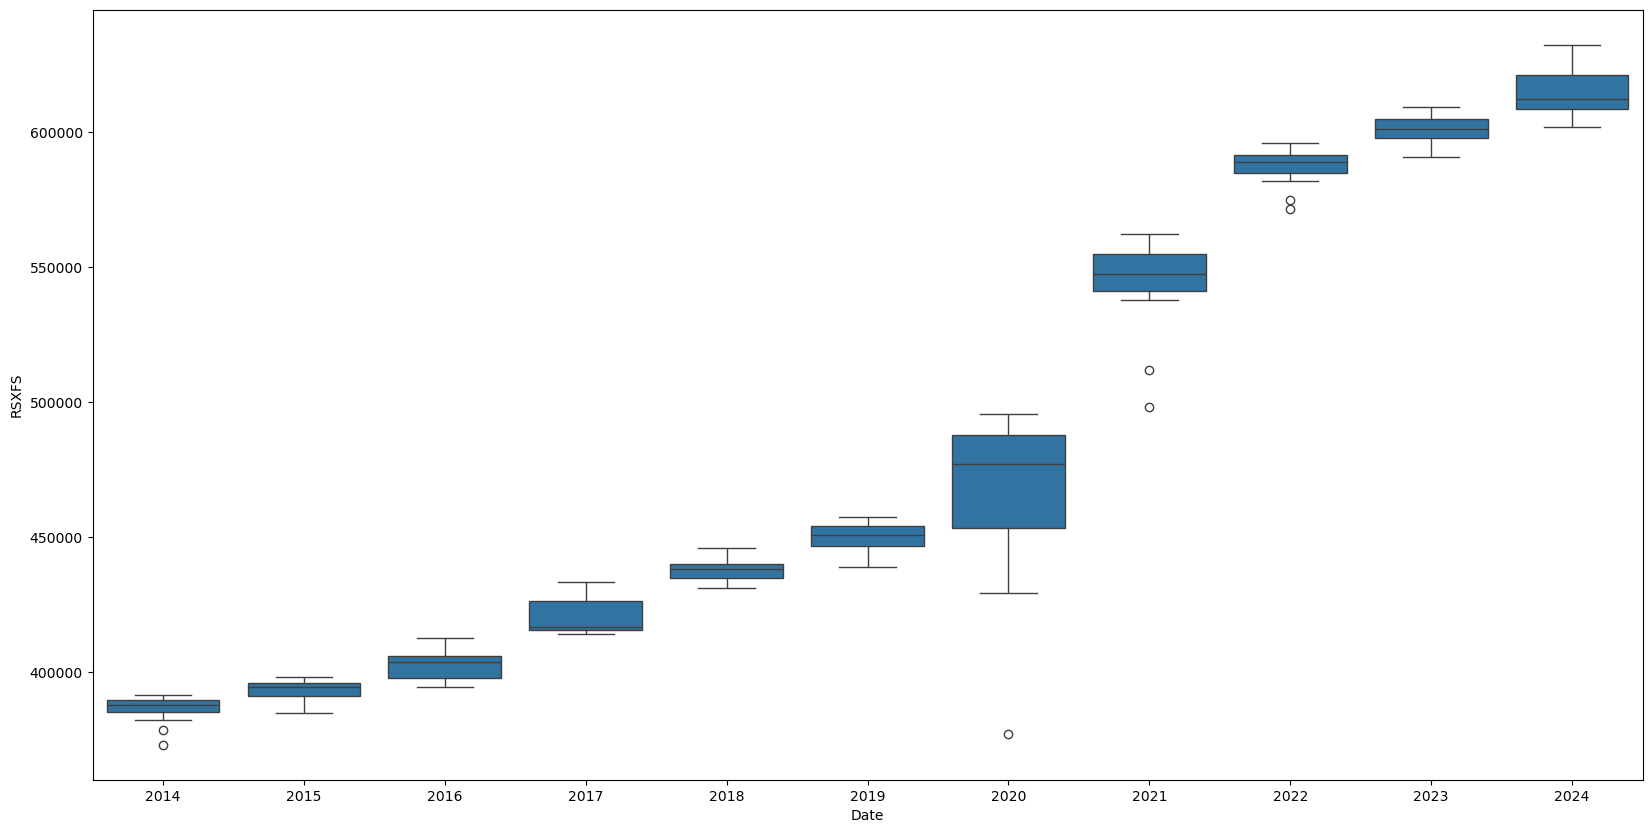

In [99]:
#RSI Rate by Year
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = rsi_df['Date'].dt.year,
                y = rsi_df['RSXFS'],
                ax = ax)

<Axes: xlabel='Date', ylabel='RSXFS'>

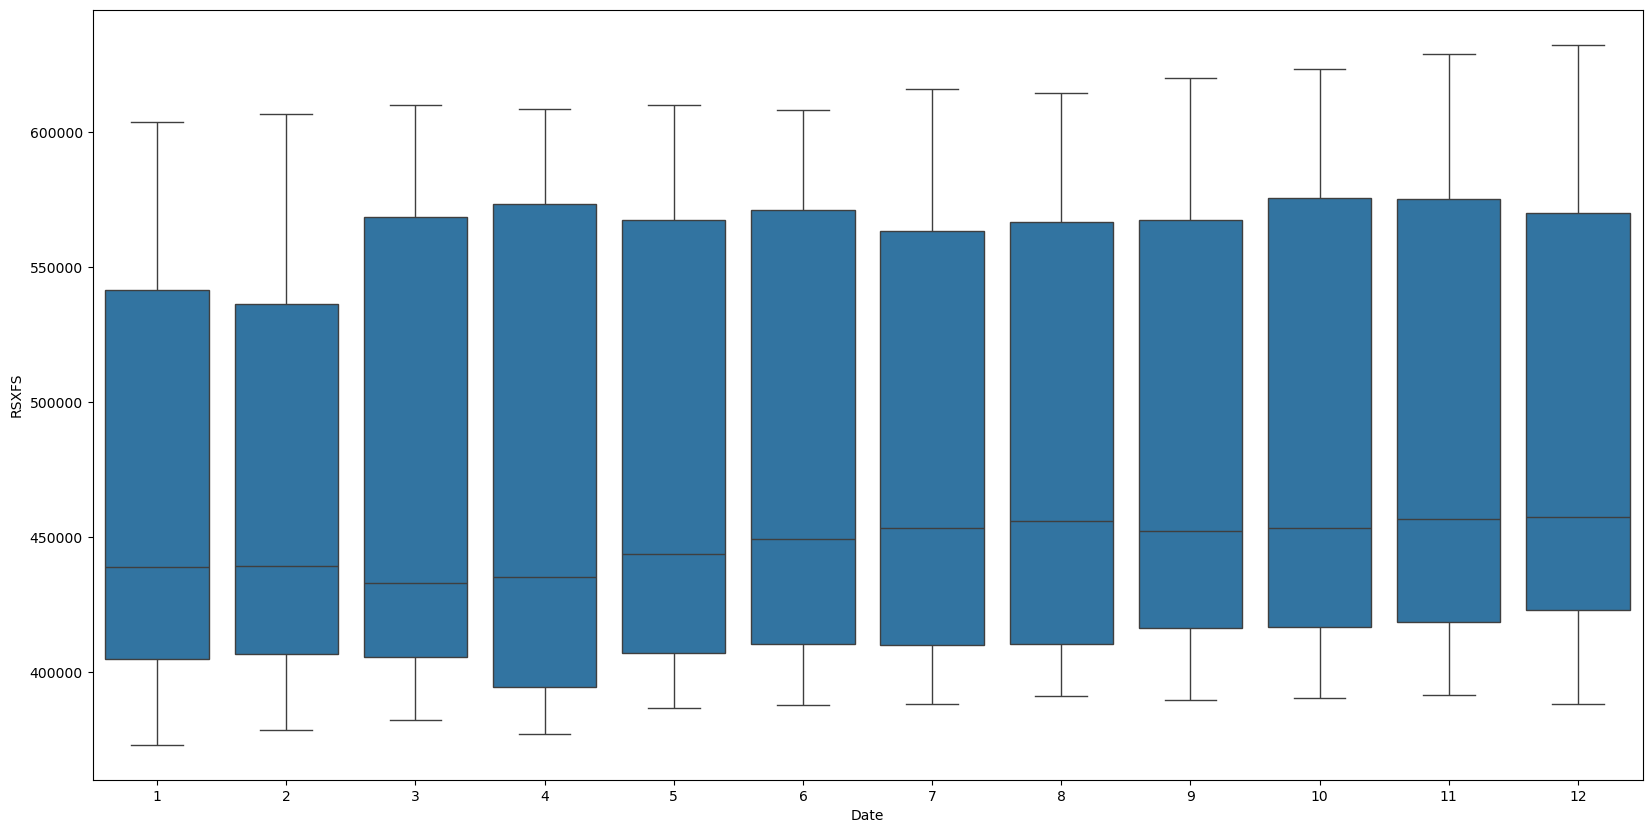

In [100]:
#RSI Rate by Month
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = rsi_df['Date'].dt.month,
                y = rsi_df['RSXFS'],
                ax = ax)

In [101]:
# Set 'Date' as the index
rsi_df.set_index('Date', inplace=True)

print(rsi_df)

             RSXFS  Year  Annual_Average
Date                                    
2014-01-01  373083  2014   386070.583333
2014-02-01  378355  2014   386070.583333
2014-03-01  382101  2014   386070.583333
2014-04-01  386376  2014   386070.583333
2014-05-01  386735  2014   386070.583333
...            ...   ...             ...
2024-08-01  614535  2024   614999.916667
2024-09-01  620104  2024   614999.916667
2024-10-01  623269  2024   614999.916667
2024-11-01  628727  2024   614999.916667
2024-12-01  632249  2024   614999.916667

[132 rows x 3 columns]


In [102]:
# Resample to monthly frequency, taking the median of RSI for each month
rsi_monthly_resample = rsi_df['RSXFS'].resample('MS').median()

# Convert the result back to a DataFrame and rename the column
rsi_monthly_resample = rsi_monthly_resample.to_frame(name='RSXFS')

# Display the resampled DataFrame
print(rsi_monthly_resample)

               RSXFS
Date                
2014-01-01  373083.0
2014-02-01  378355.0
2014-03-01  382101.0
2014-04-01  386376.0
2014-05-01  386735.0
...              ...
2024-08-01  614535.0
2024-09-01  620104.0
2024-10-01  623269.0
2024-11-01  628727.0
2024-12-01  632249.0

[132 rows x 1 columns]


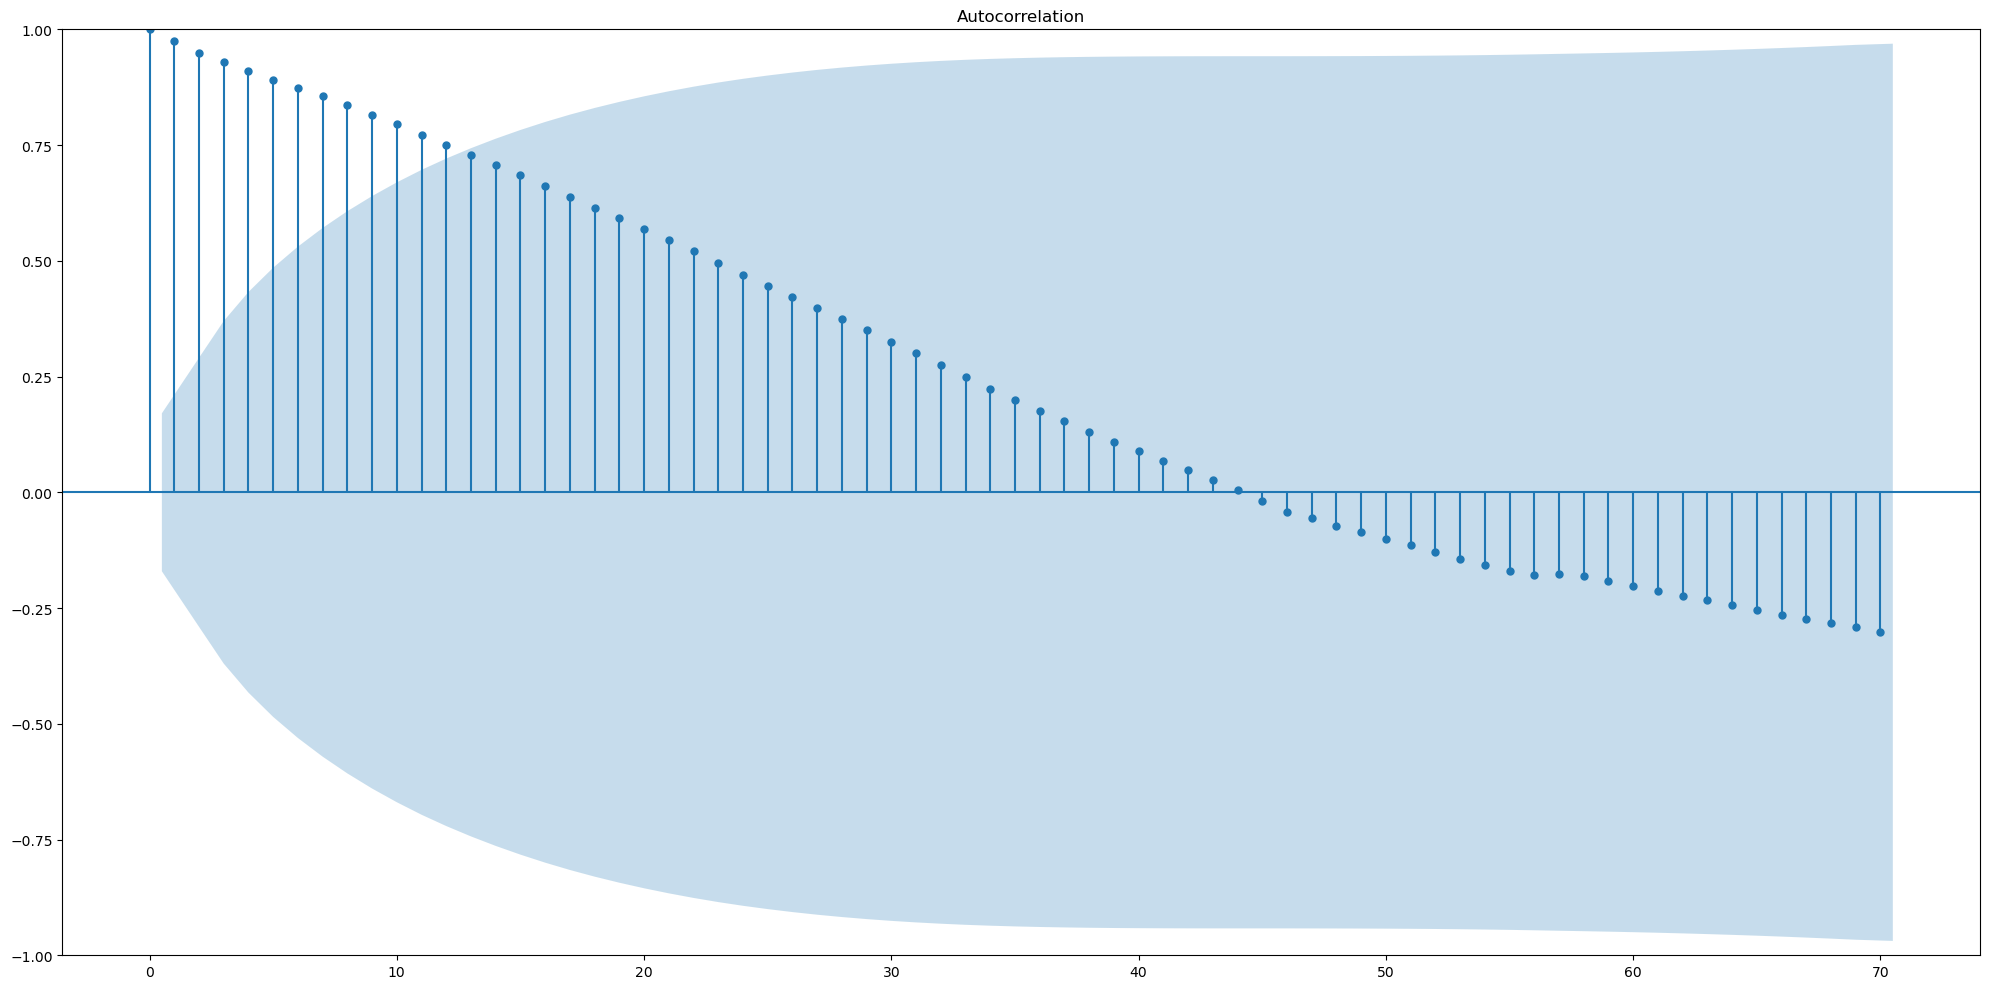

In [103]:
# Calculate the ACF (via statsmodel)
# Source: https://www.alpharithms.com/autocorrelation-time-series-python-432909/

fig = plot_acf(rsi_df['RSXFS'], lags=70)
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

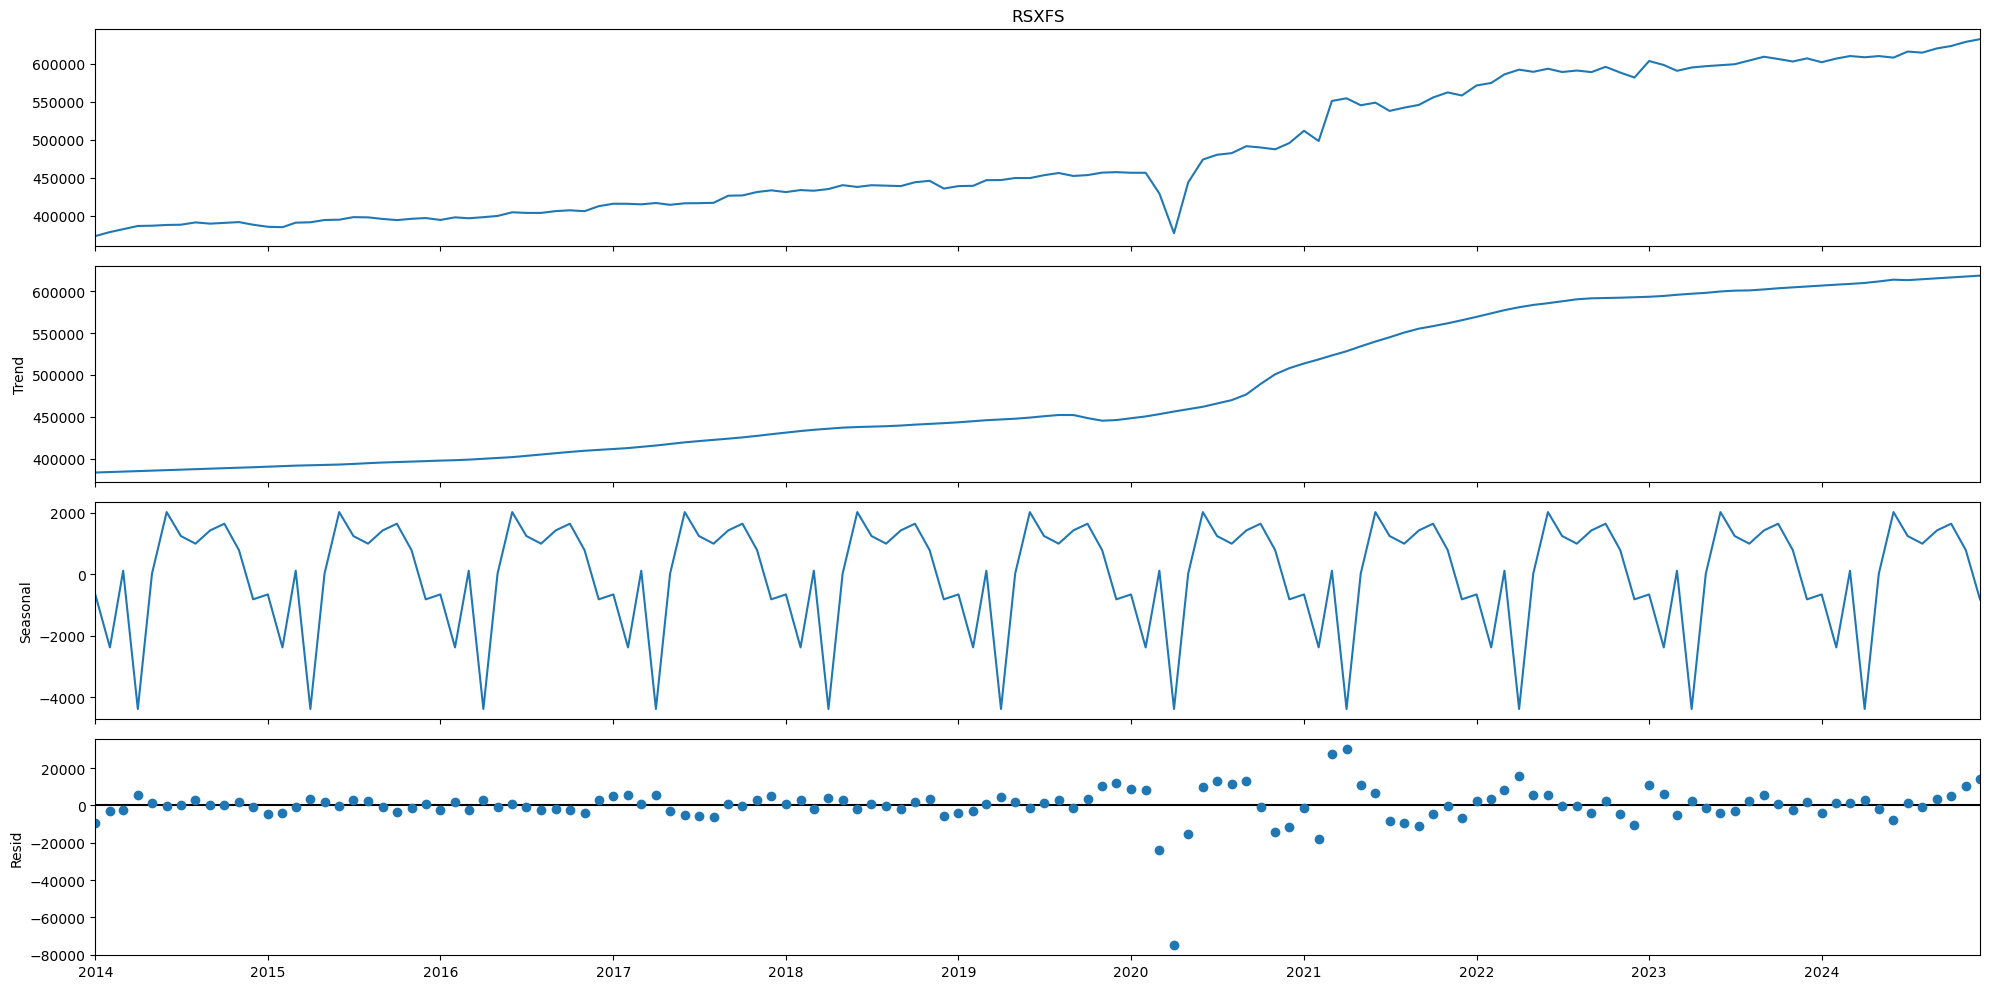

In [104]:
#Time Series Decomposition
res = sm.tsa.seasonal_decompose(rsi_monthly_resample['RSXFS'], period=12, extrapolate_trend='freq')
fig = res.plot()
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [105]:
#extract trend, seasonality, error
trend = res.trend
seasonal = res.seasonal
error = res.resid

# create a DataFrame to hold the results
rsi_pattern_df = pd.DataFrame({
    'RSI': rsi_monthly_resample['RSXFS'],
    'Trend': trend,
    'Seasonal': seasonal,
    'Error': error
})

rsi_pattern_df

,RSI,Trend,Seasonal,Error
Date,,,,
2014-01-01,373083.0,383346.408071,-656.341885,-9607.066186
2014-02-01,378355.0,383921.141608,-2376.264631,-3189.876978
2014-03-01,382101.0,384495.875146,113.558836,-2508.433981
2014-04-01,386376.0,385070.608683,-4374.932092,5680.323409
2014-05-01,386735.0,385645.342220,19.713344,1069.944436
...,...,...,...,...
2024-08-01,614535.0,614459.359606,991.291309,-915.650915
2024-09-01,620104.0,615536.090229,1421.815798,3146.093973
2024-10-01,623269.0,616612.820853,1639.048620,5017.130527


<Axes: >

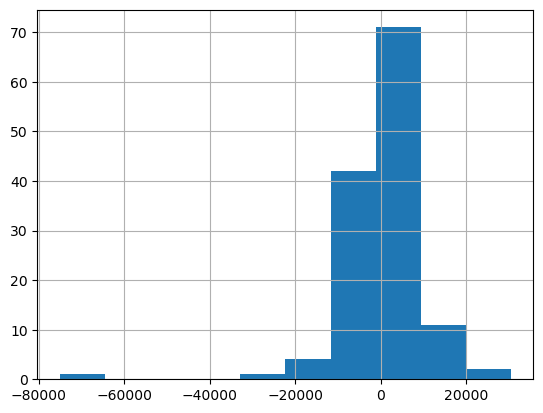

In [106]:
rsi_pattern_df['Error'].hist()

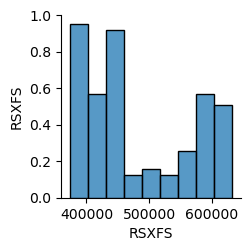

In [107]:
#Pairplot
sns.pairplot(rsi_monthly_resample)

In [108]:
np.corrcoef(rsi_monthly_resample['RSXFS'],df_resample_months['COST_Spline'])

array([[1.        , 0.93062585],
       [0.93062585, 1.        ]])

In [109]:
rsi_differenced = rsi_monthly_resample.diff()
rsi_differenced

,RSXFS
Date,
2014-01-01,NaN
2014-02-01,5272.0
2014-03-01,3746.0
2014-04-01,4275.0
2014-05-01,359.0
...,...
2024-08-01,-1425.0
2024-09-01,5569.0
2024-10-01,3165.0


<Axes: xlabel='Date'>

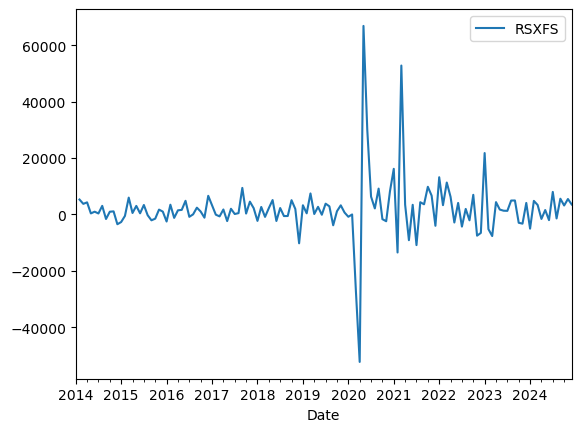

In [110]:
rsi_differenced.plot()

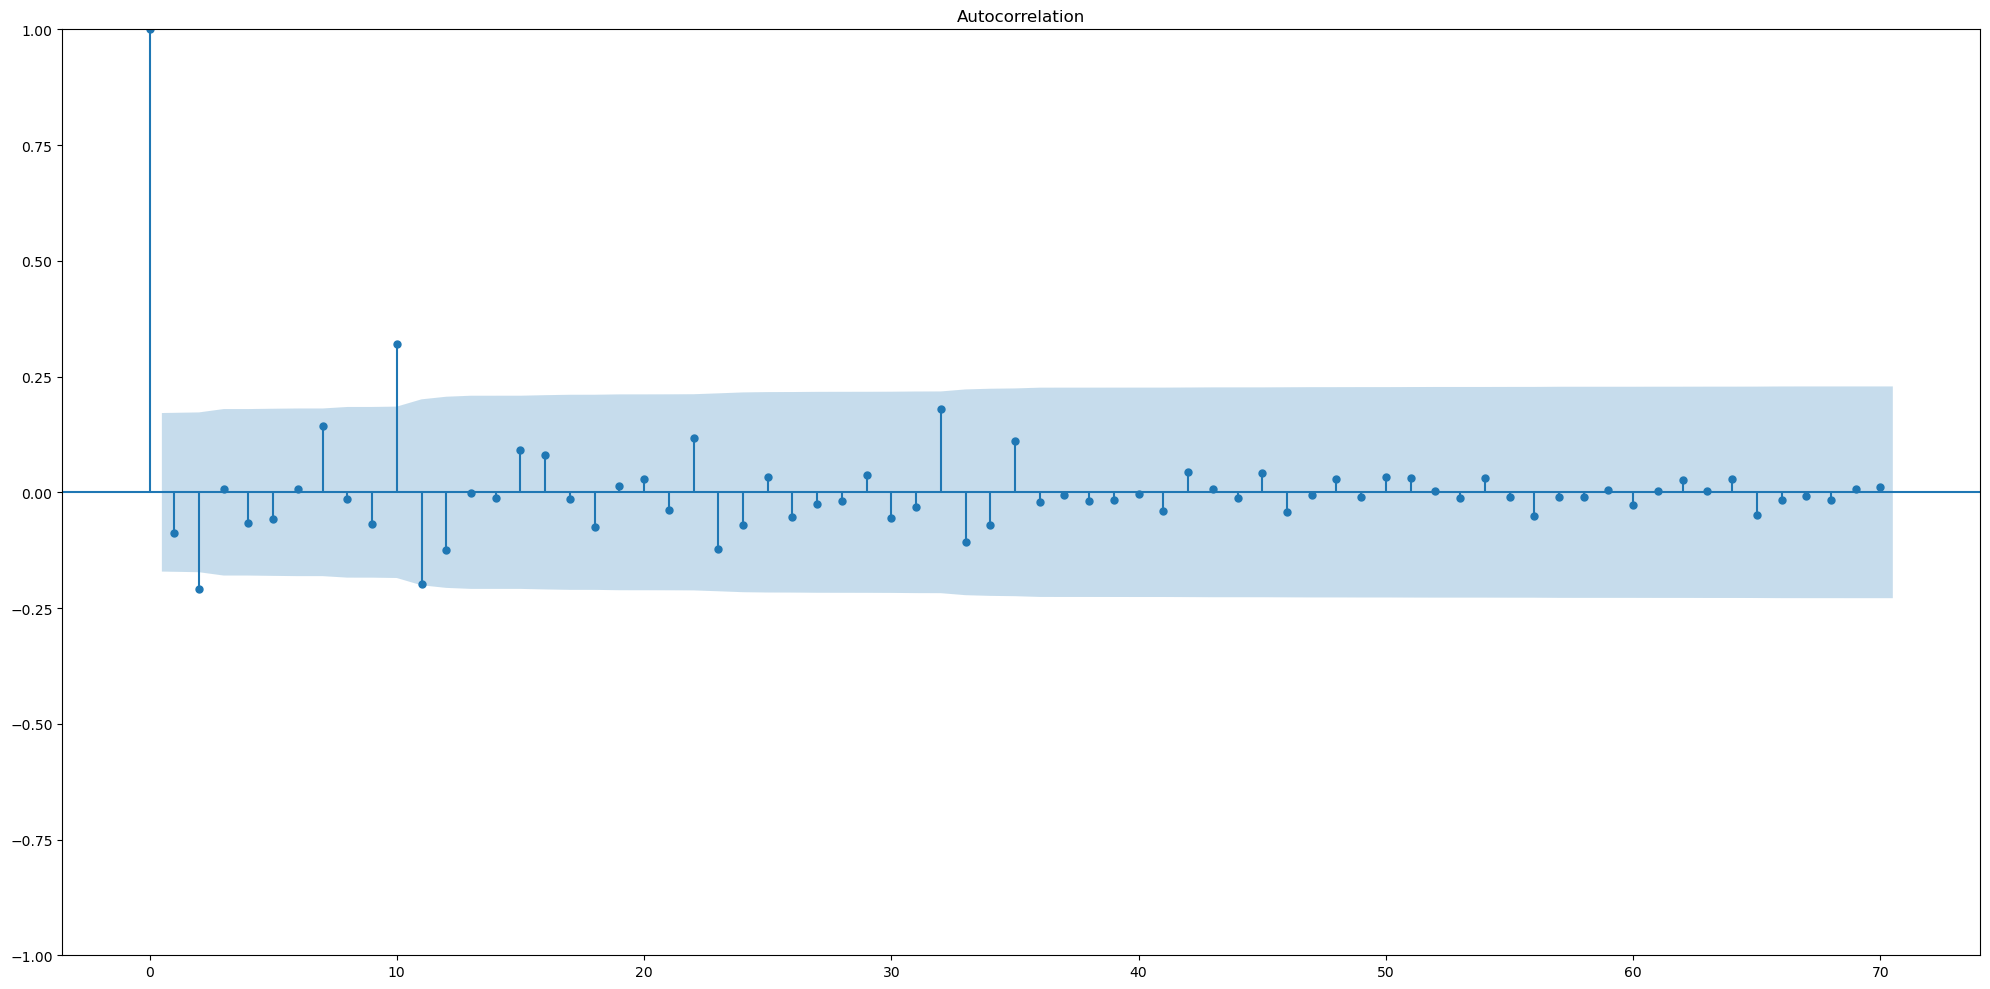

In [111]:
# Calculate the ACF (via statsmodel)
# Source: https://www.alpharithms.com/autocorrelation-time-series-python-432909/

fig = plot_acf(rsi_differenced['RSXFS'].dropna(), lags=70)
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

<Axes: xlabel='RSXFS', ylabel='COST_Spline'>

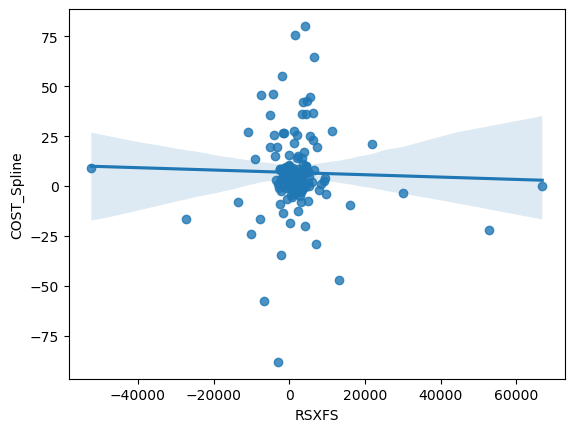

In [112]:
# Plot Regression for Detrended Data
r_merged = differenced.merge(rsi_differenced, on='Date')
sns.regplot(x= r_merged['RSXFS'], y=r_merged['COST_Spline'], data=r_merged)

/var/folders/hj/_jmscth928bcdm9fr013zqzr0000gn/T/ipykernel_56715/4278366180.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = results.pvalues[1]  # p-value for the 'Inflation Rate' coefficient


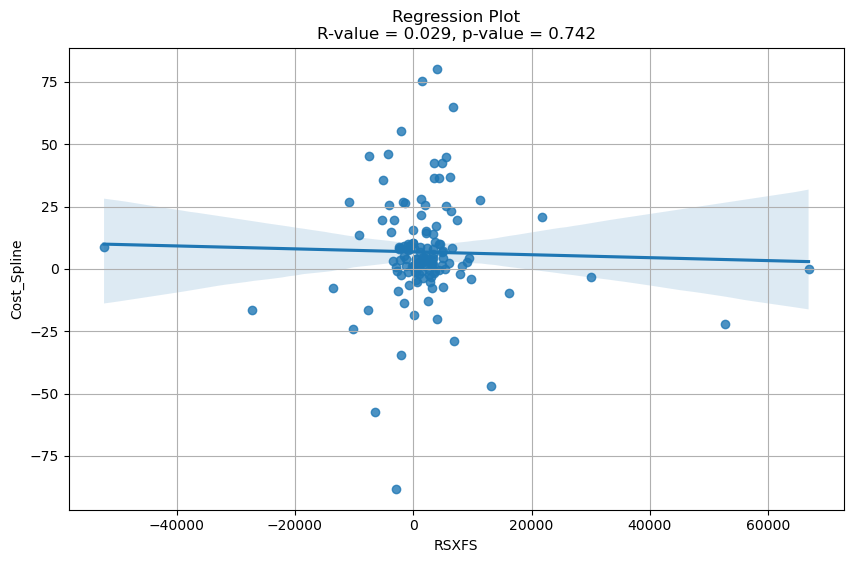

In [113]:
# Check for NaN or infinite values in the independent and dependent variables
r_merged_cleaned = r_merged.dropna(subset=['RSXFS', 'COST_Spline'])  # Drop rows with NaNs in the relevant columns

# Now perform the regression
X_cleaned = r_merged_cleaned['RSXFS']
y_cleaned = r_merged_cleaned['COST_Spline']

# Add a constant to the independent variable for the intercept in the regression model
X_with_const_cleaned = sm.add_constant(X_cleaned)

# Perform the linear regression using statsmodels
model = sm.OLS(y_cleaned, X_with_const_cleaned)
results = model.fit()

# Get the R-squared and p-value from the regression results
r_value = results.rsquared**0.5  # R-value is the square root of R-squared
p_value = results.pvalues[1]  # p-value for the 'Inflation Rate' coefficient
0,0
# Plot the regression line using seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x=r_merged_cleaned['RSXFS'], y=r_merged_cleaned['COST_Spline'], data=r_merged_cleaned)

# Add R-value and p-value to the plot
plt.title(f'Regression Plot\nR-value = {r_value:.3f}, p-value = {p_value:.3f}')
plt.xlabel('RSXFS')
plt.ylabel('Cost_Spline')
plt.grid(True)

# Display the plot
plt.show()


# 4. Assess the relationship as good or bad predictors

The relationship between the three economic factors (Inflation, Unemployment, and RSI) and stock performance appears to be negligible based on the analysis. For inflation, the correlation coefficient (r = 0.036) indicates a very weak positive relationship, and the p-value (p = 0.681) suggests this relationship is not statistically significant. This implies that inflation is not a reliable predictor of stock performance in this dataset. Similarly, unemployment shows essentially no correlation with stock performance (r = 0.002), and its high p-value (p = 0.982) confirms a lack of predictive power. Lastly, the Relative Strength Index (RSI) also exhibits a very weak positive correlation (r = 0.029) and a non-significant p-value (p = 0.741), indicating that it does not meaningfully influence stock movements either.

In summary, none of these factors demonstrate a significant relationship with stock performance, suggesting that they are poor predictors. Visualizations such as scatter plots with regression lines after detrending further confirm the lack of strong relationships, with points scattered randomly and little to no trend visible.

## Split data into train and test sets

In [114]:
# let us select just one series - COST

In [115]:
cost = cost_df[['COST_Spline']]

cost


Ticker,COST_Spline
2014-01-01,92.300
2014-02-01,92.210
2014-03-01,91.360
2014-04-01,90.975
2014-05-01,92.470
...,...
2024-09-01,895.690
2024-10-01,887.850
2024-11-01,932.630
2024-12-01,975.000


In [116]:
from sklearn.model_selection import train_test_split

# Create a test set of 12 data points
test_size = 12

train_data, test_data = train_test_split(cost, test_size=test_size, random_state=25, shuffle = False)
#shuffle = False is very important to ensure the order of the data

print(f"No. of training examples: {train_data.shape[0]}")
print(f"No. of testing examples: {test_data.shape[0]}")

No. of training examples: 121
No. of testing examples: 12


In [117]:
train_data

Ticker,COST_Spline
2014-01-01,92.300
2014-02-01,92.210
2014-03-01,91.360
2014-04-01,90.975
2014-05-01,92.470
...,...
2023-09-01,541.855
2023-10-01,542.760
2023-11-01,562.260
2023-12-01,642.550


In [118]:
test_data

Ticker,COST_Spline
2024-02-01,720.840
2024-03-01,728.990
2024-04-01,715.315
2024-05-01,790.820
2024-06-01,846.050
2024-07-01,843.960
2024-08-01,870.510
2024-09-01,895.690
2024-10-01,887.850
2024-11-01,932.630


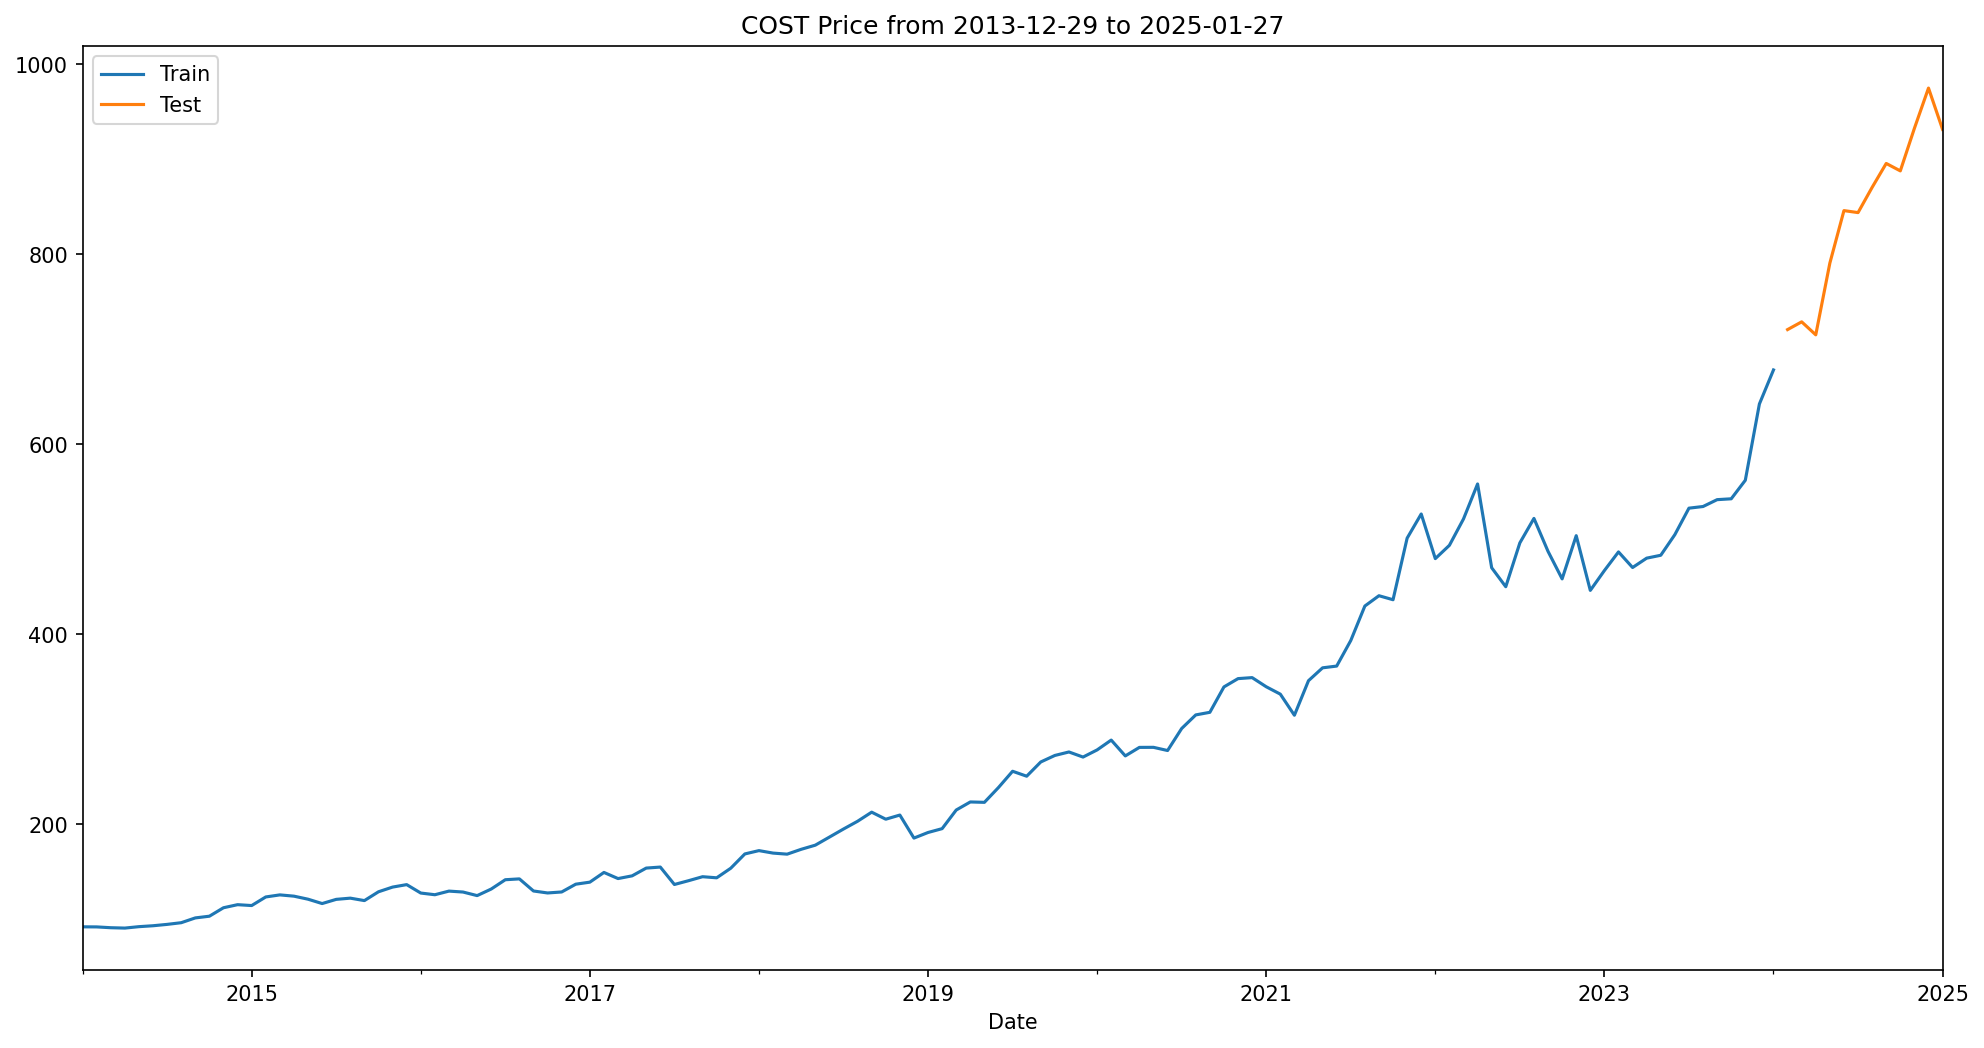

In [119]:
#Plot train and test data

# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)

# using plot method to plot close prices.
# in plot method we set the label and color of the curve.
train_data['COST_Spline'].plot(label='Train')
test_data['COST_Spline'].plot(label='Test')


# adding title to the plot
plt.title('COST Price from {} to {}'.format(stock_start_date, stock_end_date))

# adding Label to the x-axis
plt.xlabel('Date')

# adding legend to the curve
plt.legend()

## 5. Fitting Univariate Models to Predict Stock Price - Exponential Smoothing Models

### ETS - Error, Trend, Seasonailty

In [120]:
#First Instance
ins1 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(12).rename('alpha=0.2')

#Second Instance
ins2 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.5,optimized=False)
ins_cast2 = ins2.forecast(12).rename('alpha=0.5')

#Third Instance
ins3 = SimpleExpSmoothing(train_data).fit()
ins_cast3 = ins3.forecast(12).rename('alpha=%s'%ins3.model.params['smoothing_level'])


In [121]:
ins_cast1

2024-02-01    574.900493
2024-03-01    574.900493
2024-04-01    574.900493
2024-05-01    574.900493
2024-06-01    574.900493
2024-07-01    574.900493
2024-08-01    574.900493
2024-09-01    574.900493
2024-10-01    574.900493
2024-11-01    574.900493
2024-12-01    574.900493
2025-01-01    574.900493
Freq: MS, Name: alpha=0.2, dtype: float64

In [122]:
test_data

Ticker,COST_Spline
2024-02-01,720.840
2024-03-01,728.990
2024-04-01,715.315
2024-05-01,790.820
2024-06-01,846.050
2024-07-01,843.960
2024-08-01,870.510
2024-09-01,895.690
2024-10-01,887.850
2024-11-01,932.630


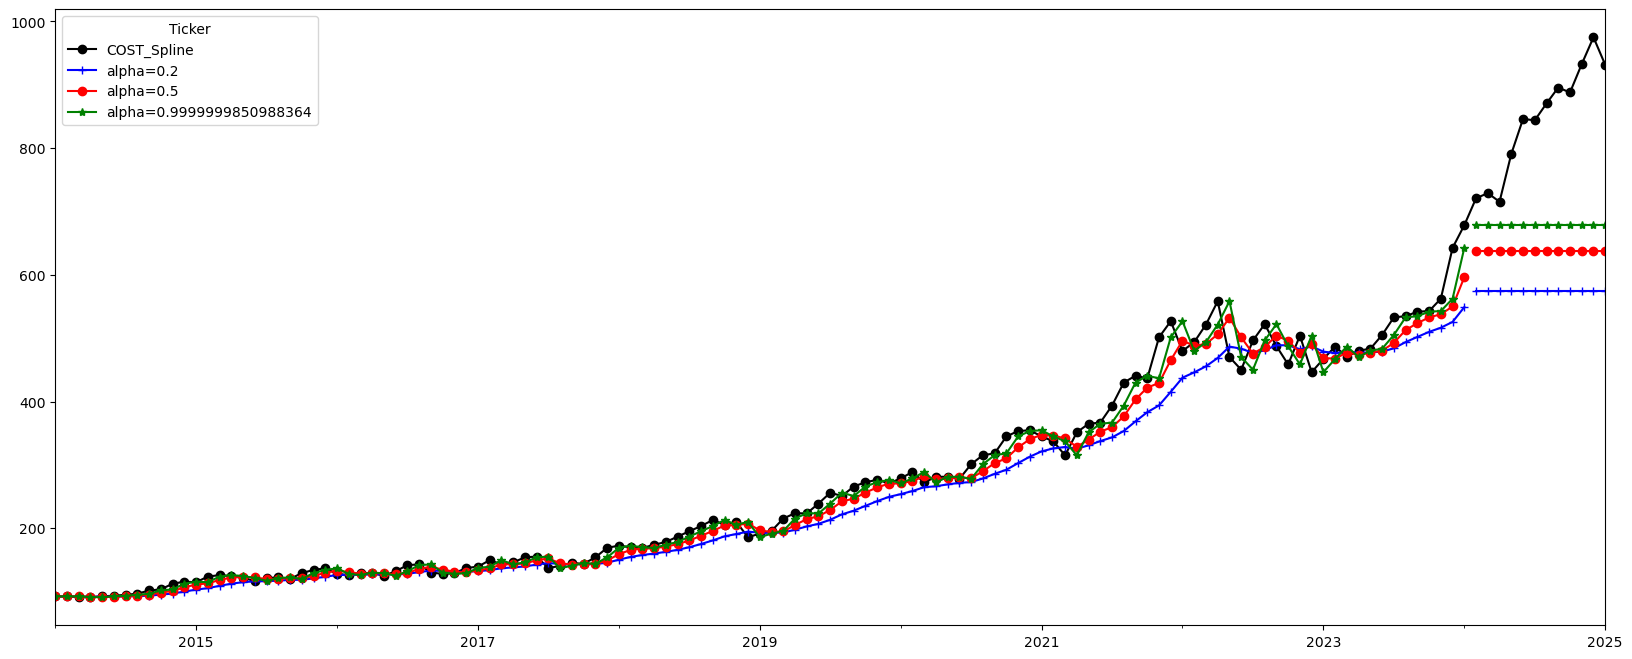

In [123]:
#After creating model we will visualize the plot
ax = cost.plot(marker='o', color='black', figsize=(20,8), legend=True)

#Plot for alpha =0.2
ins_cast1.plot(marker='+', ax=ax, color='blue', legend=True)
ins1.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for alpha = 0.5
ins_cast2.plot(marker='o', ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')

plt.show()

#### Double Exponential Smoothing

This is the extended version of simple exponential smoothing to allow the forecasting of data with a trend. This method has two smoothing equations and hence two parameters, alpha and beta, (one for the level and one for the trend).

In [124]:
# Double ETS
# Let us fit the data on Double ES, on both Additive and Multiplicative Trend

In [125]:
double_ets_add = ExponentialSmoothing(train_data, trend = 'add').fit()
double_ets_mul = ExponentialSmoothing(train_data, trend = 'mul').fit()

double_ets_add_pred = double_ets_add.forecast(12)
double_ets_mul_pred = double_ets_mul.forecast(12)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


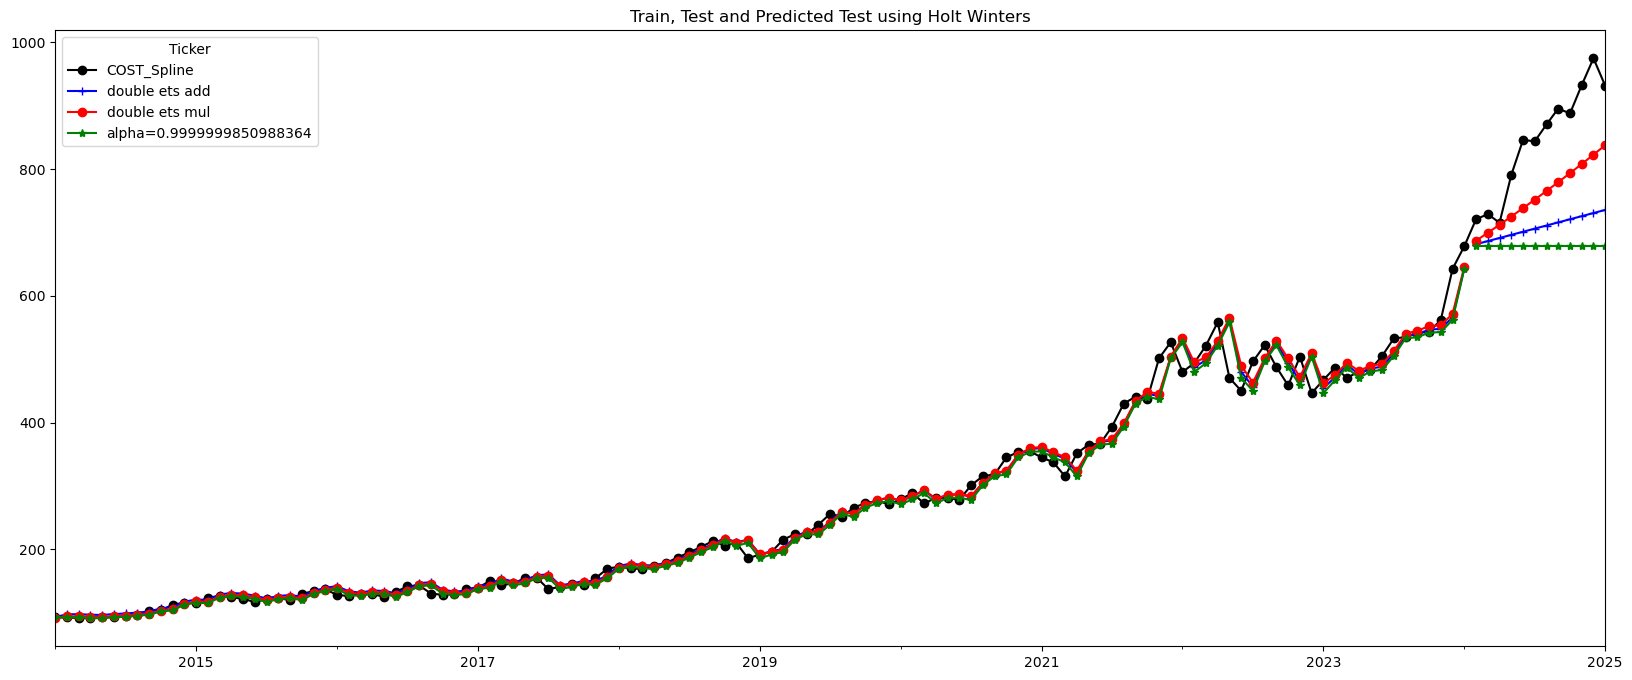

In [126]:
#plot the train, test, and predictions

#After creating model we will visualize the plot
ax = cost.plot(marker='o', color='black', figsize=(20,8), legend=True)

#Plot for double ETS additive
double_ets_add_pred.plot(marker='+', ax=ax, color='blue', legend=True, label = 'double ets add')
double_ets_add.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for double ETS multiplicative
double_ets_mul_pred.plot(marker='o', ax=ax, color='red', legend=True, label = 'double ets mul')
double_ets_mul.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for simple exponential smooting alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')
plt.title('Train, Test and Predicted Test using Holt Winters')
plt.show()



#### Triple Exponential Smoothing

This is the extended version of simple exponential smoothing to allow the forecasting of data with a trend and seasonality. This method has three smoothing equations and hence three parameters - alpha, beta, and gamma. (one each for the level, trend, and seasonality).

In [127]:
# triple ETS - Holt Winter's Seasonal Method
triple_ets_add = ExponentialSmoothing(train_data, trend = 'add', seasonal = 'add', seasonal_periods=12).fit()
triple_ets_mul = ExponentialSmoothing(train_data, trend = 'mul', seasonal = 'mul', seasonal_periods=12).fit()

triple_ets_add_pred = triple_ets_add.forecast(12)
triple_ets_mul_pred = triple_ets_mul.forecast(12)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


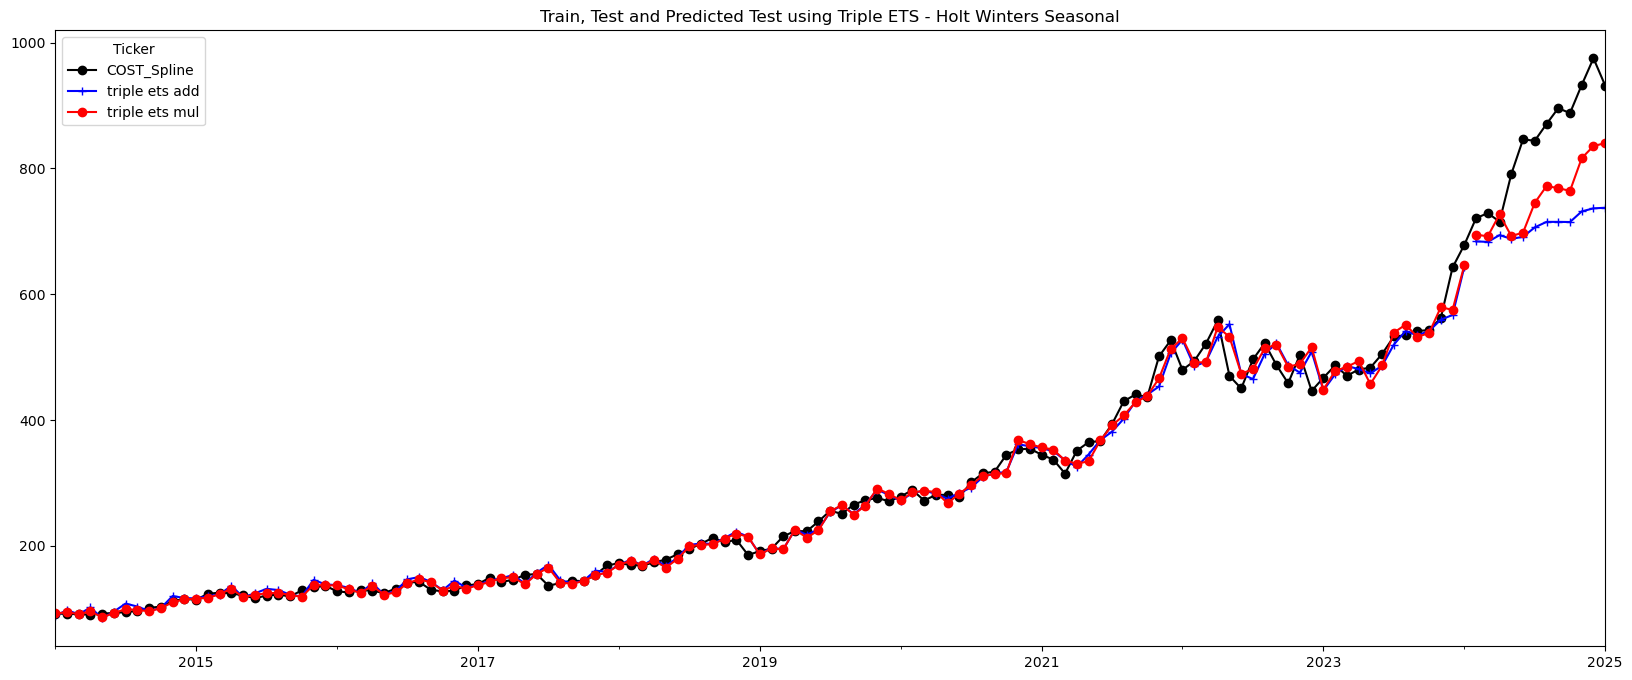

In [128]:
#plot the train, test, and predictions

#After creating model we will visualize the plot
ax = cost.plot(marker='o', color='black', figsize=(20,8), legend=True)

#Plot for double ETS additive
triple_ets_add_pred.plot(marker='+', ax=ax, color='blue', legend=True, label = 'triple ets add')
triple_ets_add.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for double ETS multiplicative
triple_ets_mul_pred.plot(marker='o', ax=ax, color='red', legend=True, label = 'triple ets mul')
triple_ets_mul.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for simple exponential smooting alpha=Optimized by statsmodel
#ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
#ins3.fittedvalues.plot(marker='*', ax=ax, color='green')
plt.title('Train, Test and Predicted Test using Triple ETS - Holt Winters Seasonal')
plt.show()

## Visualize Forecast Errors

Source: https://machinelearningmastery.com/visualize-time-series-residual-forecast-errors-with-python/

In [129]:
# Residual Plots / Residual Diagnostics. What are residuals?

In [130]:
test_data

Ticker,COST_Spline
2024-02-01,720.840
2024-03-01,728.990
2024-04-01,715.315
2024-05-01,790.820
2024-06-01,846.050
2024-07-01,843.960
2024-08-01,870.510
2024-09-01,895.690
2024-10-01,887.850
2024-11-01,932.630


In [131]:
#calculate residuals
residuals = [test_data.values.flatten()[i]-triple_ets_add_pred.values.flatten()[i] for i in range(len(test_data))]
residuals = pd.DataFrame(residuals)

In [132]:
residuals

,0
0,36.794518
1,45.857465
2,21.375272
3,102.831091
4,154.796602
5,137.705093
6,155.512798
7,180.688717
8,173.093065
9,200.954079


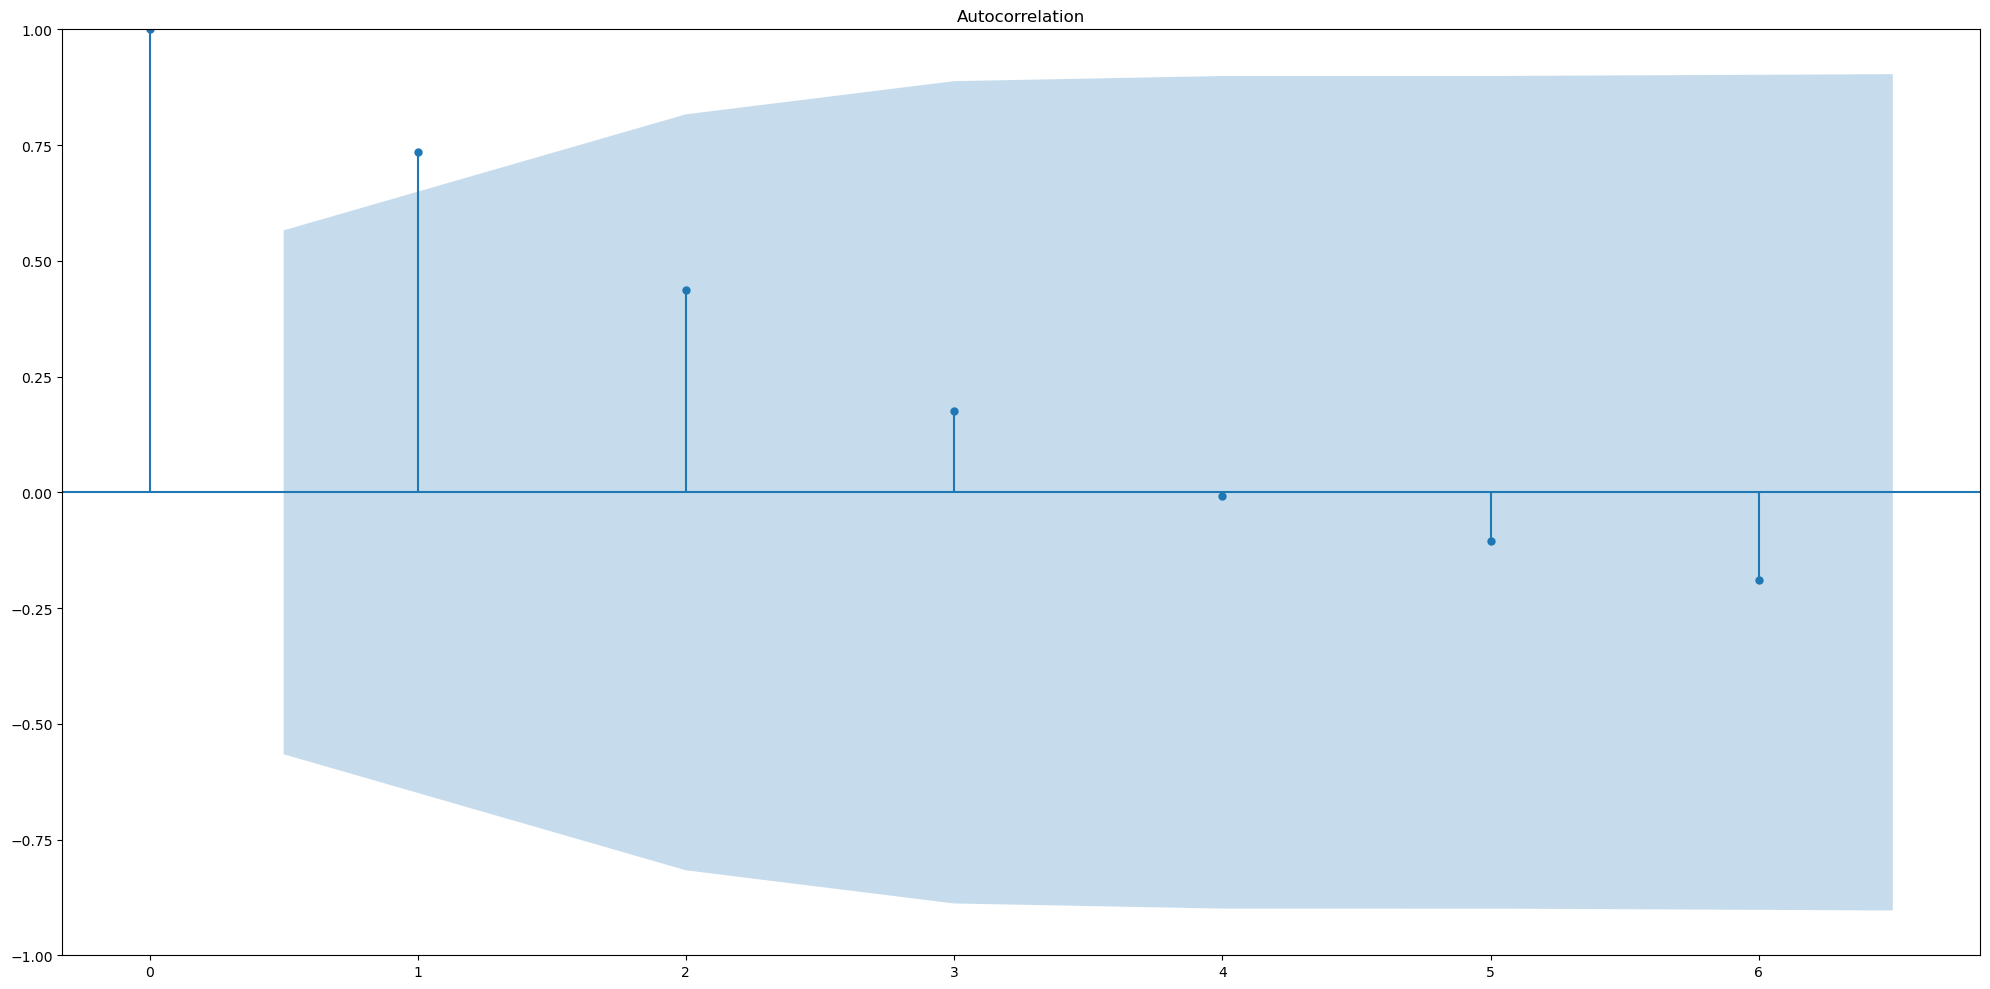

In [133]:

fig = plot_acf(residuals)
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

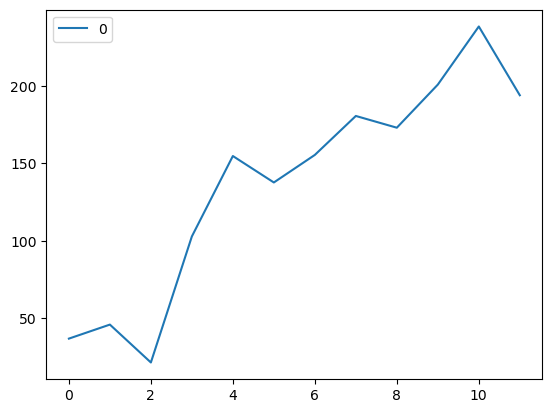

In [134]:
# plot residuals
residuals.plot()
plt.show()

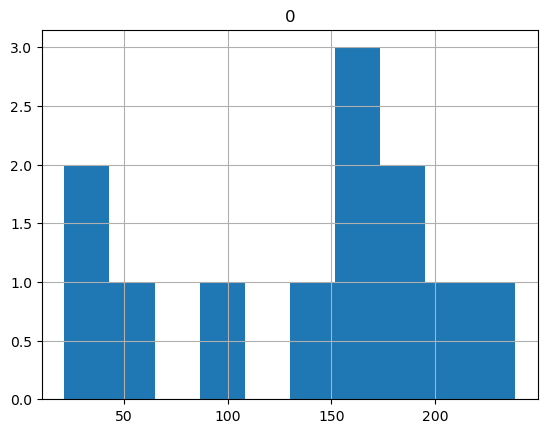

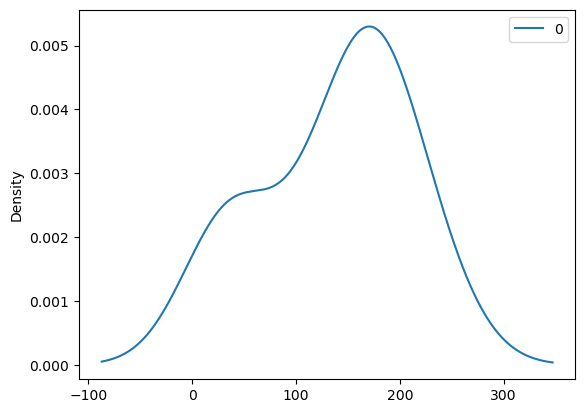

In [135]:
# histogram plot
residuals.hist()
plt.show()
# density plot
residuals.plot(kind='kde')
plt.show()

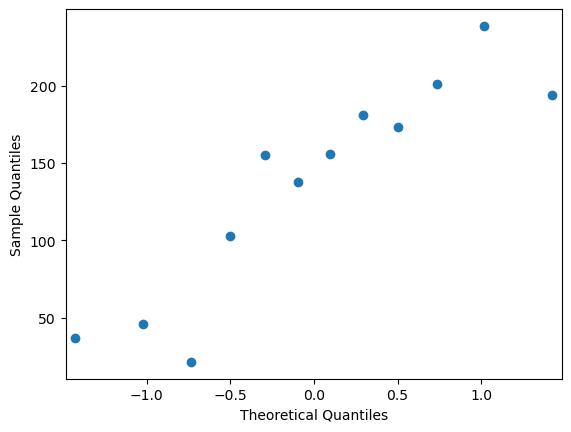

In [136]:
qqplot(residuals)
plt.show()

# 6. Model Evaluation with 5 metrics

### Metrics - model evaluation

1. Root Mean Squared Error (RMSE) represents the sample standard deviation of the differences between predicted values and observed values. These individual differences are called residuals when the calculations are performed over the data sample that was used for estimation, and are called prediction errors when computed out-of-sample. This is a great measurement to use when comparing models as it shows how many deviations from the mean the forecasted values fall.
2. Mean Absolute Error (MAE) takes the sum of the absolute difference from actual to forecast and averages them. It is less sensitive to the occasional very large error because it does not square the errors in the calculation.
3. Mean Absolute Percentage Error (MAPE) is also often useful for purposes of reporting, because it is expressed in generic percentage terms it will make sense even to someone who has no idea what constitutes a "big" error in terms of dollars spent or widgets sold.
4. Mean Aboslute Scaled Error (MASE) is a scale-independent metrics that allows for comparison across datasets and adjusts for naive forecasting to determine whether the model outperforms a simple baseline model. A value less than 1 means the model outperforms the simpler benchmark.
    - Why chosen --> accounts for scale of data and allows you to see whether model actually improves compared to simpler approaches
5. Symmetric Mean Absolute Percentage Error (sMAPE) addresses asymmetry limitation in MAPE by treating over-predictions and under-predictions symmetrically and ensuring that percentages are bounded between 0% and 200%.
    - Why chosen --> less sensitive to large outliers and provides a balanced evaluation of prediction errors; useful for datasets with high volatility like stockprices

In [137]:
#define metrics dataframe which will be used below for storing results
metrics_dataframe = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MAPE', 'MASE', 'sMAPE'])

def metrics_cal(actuals, predictions, model):
    mse = mean_squared_error(actuals, predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(actuals, predictions)
    mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100

    # Calculate MASE
    naive_forecast = actuals[:-1]  # Naive forecast: previous actual as prediction
    naive_mae = mean_absolute_error(actuals[1:], naive_forecast)  # Exclude the first value for comparison
    mase = mae / naive_mae if naive_mae != 0 else np.nan  # Avoid division by zero

    # Calculate sMAPE
    smape = np.mean(2 * np.abs(actuals - predictions) / (np.abs(actuals) + np.abs(predictions))) * 100
    
    df = pd.DataFrame({'Model': [model],
                       'RMSE': [rmse],
                       'MAE': [mae],
                       'MAPE': [mape],
                       'MASE': [mase],
                       'sMAPE': [smape]})

    global metrics_dataframe
    metrics_dataframe = pd.concat([metrics_dataframe, df], ignore_index=True)
    return metrics_dataframe

In [138]:
#get all the metrics
metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                ins_cast1.values.flatten(),
                                'Simple 0.2')

metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                ins_cast2.values.flatten(),
                                'Simple 0.5')

metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                ins_cast3.values.flatten(),
                                'Simple 1')

metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                double_ets_add_pred.values.flatten(),
                                'Double Add')

metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                double_ets_mul_pred.values.flatten(),
                                'Double Mul')


metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                triple_ets_add_pred.values.flatten(),
                                'Triple Add')

metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                triple_ets_mul_pred.values.flatten(),
                                'Triple Mul')


/var/folders/hj/_jmscth928bcdm9fr013zqzr0000gn/T/ipykernel_56715/3954258263.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, df], ignore_index=True)


In [139]:
metrics_dataframe.sort_values(by='MAE')

,Model,RMSE,MAE,MAPE,MASE,sMAPE
4,Double Mul,94.544016,84.806744,9.648346,2.705238,10.242450
6,Triple Mul,102.475762,93.021396,10.664165,2.967276,11.385669
3,Double Add,152.584226,136.387859,15.462769,4.350616,17.051910
5,Triple Add,152.518291,136.849561,15.531361,4.365344,17.125825
2,Simple 1,186.785924,166.562084,18.870979,5.313139,21.308172
1,Simple 0.5,224.156765,207.605881,23.779573,6.622389,27.440242
0,Simple 0.2,282.954260,270.031590,31.245317,8.613698,37.449445


In [140]:
cost.tail(12).mean()


Ticker
COST_Spline    844.932083
dtype: float64

In [141]:
triple_ets_add_pred.values.flatten()

array([684.04548223, 683.13253472, 693.93972759, 687.98890897,
       691.25339791, 706.25490705, 714.99720232, 715.00128312,
       714.75693508, 731.67592061, 736.48474436, 737.45922026])

In [142]:
# Create a data frame with all the predictions along with the test data
test_pred_df = test_data.copy()

# Add all predictions
test_pred_df = test_pred_df.assign(triple_ets_mul_pred = triple_ets_mul_pred.values.flatten(),
                                   SimpleExp_1_pred = ins_cast3.values.flatten(),
                                   double_ets_mul_pred = double_ets_mul_pred.values.flatten())

test_pred_df

Ticker,COST_Spline,triple_ets_mul_pred,SimpleExp_1_pred,double_ets_mul_pred
2024-02-01,720.840,694.779572,678.369999,686.987289
2024-03-01,728.990,692.020033,678.369999,699.494131
2024-04-01,715.315,726.918085,678.369999,712.228664
2024-05-01,790.820,692.505260,678.369999,725.195034
2024-06-01,846.050,697.936274,678.369999,738.397461
2024-07-01,843.960,745.239315,678.369999,751.840243
2024-08-01,870.510,771.821983,678.369999,765.527756
2024-09-01,895.690,768.704424,678.369999,779.464454
2024-10-01,887.850,764.212829,678.369999,793.654874
2024-11-01,932.630,816.279723,678.369999,808.103637


In [143]:
# Create an average prediction from the three and check it's metrics
test_pred_df['Average_Predictions'] = (test_pred_df['SimpleExp_1_pred']+test_pred_df['triple_ets_mul_pred']+test_pred_df['double_ets_mul_pred'])/3
test_pred_df


Ticker,COST_Spline,triple_ets_mul_pred,SimpleExp_1_pred,double_ets_mul_pred,Average_Predictions
2024-02-01,720.840,694.779572,678.369999,686.987289,686.712287
2024-03-01,728.990,692.020033,678.369999,699.494131,689.961388
2024-04-01,715.315,726.918085,678.369999,712.228664,705.838916
2024-05-01,790.820,692.505260,678.369999,725.195034,698.690098
2024-06-01,846.050,697.936274,678.369999,738.397461,704.901245
2024-07-01,843.960,745.239315,678.369999,751.840243,725.149853
2024-08-01,870.510,771.821983,678.369999,765.527756,738.573246
2024-09-01,895.690,768.704424,678.369999,779.464454,742.179626
2024-10-01,887.850,764.212829,678.369999,793.654874,745.412567
2024-11-01,932.630,816.279723,678.369999,808.103637,767.584453


In [144]:
metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                test_pred_df['Average_Predictions'].values.flatten(),
                                'Average')

metrics_dataframe.sort_values(by='MAE')

,Model,RMSE,MAE,MAPE,MASE,sMAPE
4,Double Mul,94.544016,84.806744,9.648346,2.705238,10.242450
6,Triple Mul,102.475762,93.021396,10.664165,2.967276,11.385669
7,Average,127.016634,114.152125,12.971047,3.641322,14.064768
3,Double Add,152.584226,136.387859,15.462769,4.350616,17.051910
5,Triple Add,152.518291,136.849561,15.531361,4.365344,17.125825
2,Simple 1,186.785924,166.562084,18.870979,5.313139,21.308172
1,Simple 0.5,224.156765,207.605881,23.779573,6.622389,27.440242
0,Simple 0.2,282.954260,270.031590,31.245317,8.613698,37.449445


### Model Performance Evaluation
The Double Multiplicative (Model 4) ETS model emerged as the best-performing model, achieving the lowest RMSE (94.54), MAE (84.81), and MAPE (9.65%). It also recorded a MASE of 2.70 and an sMAPE of 10.24%, reinforcing its ability to minimize both absolute and relative errors. This model likely performs best because the multiplicative components effectively capture interactions between error, trend, and seasonality—common patterns in stock price data, where changes are often proportional rather than linear.

The Triple Multiplicative (Model 6) model also performed well, though it slightly lagged behind (RMSE: 102.48, MAE: 93.02, MAPE: 10.66%). While it captures more detailed seasonal behavior, the additional seasonal component may have introduced unnecessary complexity, especially for univariate stock data. Its MASE (2.97) and sMAPE (11.39%) were higher than those of Double Multiplicative, confirming the added complexity reduced its efficiency.

Conversely, additive models like Double Additive (Model 3) and Triple Additive (Model 5) performed worse, with RMSE values exceeding 150. Their MASE (4.35 and 4.37, respectively) and sMAPE (17.05% and 17.13%) further highlight their inability to capture nonlinear, proportional changes in stock prices. This suggests additive methods, which assume constant changes, are ill-suited for financial data.

Finally, simpler models such as Simple 0.2 (Model 0) and Simple 1 (Model 2) performed the worst, with RMSE values of 282.95 and 186.79, respectively. Their MASE (8.61 and 5.31) and sMAPE (37.45% and 21.31%) further demonstrated the importance of incorporating trend and seasonal adjustments.

### Conclusion
The Double Multiplicative model (Model 4) is optimal for forecasting stock prices due to its ability to capture complex, multiplicative trends and seasonality, which are intrinsic to financial data. The inclusion of MASE and sMAPE metrics reinforces this conclusion, as they provide a more comprehensive evaluation of forecast accuracy, considering both error magnitude and relative percentage accuracy. While the Triple Multiplicative model is a viable alternative, the simplicity and superior performance of the Double Multiplicative model make it the best choice.